## Project -2:Predicting Ames Housing Prices



Ames, Iowa is a city in central Iowa, located approximately 37 miles from the capital city of Des Moines. In 2016, the population of Ames was approximately 65,000 residents (1). Home to Iowa State University, and hosting offices for several major companies, including 3M, Barilla, Boehringer Ingelheim, and Syngenta, Ames offers a small-town feel with the amenities of a larger city (2). At Ames Realty Co., we are passionate about helping our clients find a house that feels like a home ([source](https://github.com/jlu90/Predicting-House-Prices-with-Linear-Regression)).

### Problem Statement

Aim: Identifying features that affect housing market

**Problem Statement**: Creating models based on the Ames Housing Dataset which will predict the price of a house at sale in Ames, IA. Although individuals who are interested in selling/buying house can benefit from this, the main target audience for my project will be property agents (real estate industry in Ames) who makes estimation of prices for each property meant to be put on the market in the city.

## Loading libraries and reading data into Juypter notebook

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


#Import model validation and preprocessing packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

#Allows viewing of 82 column variables in Pandas
pd.set_option('max_columns',82)

#Jupyter magics (for notebook visualizations)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read in training and test data

# load data
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

# Reading top 5 rows of the train data

train_data.head()


Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [3]:
# Reading top 5 rows of the test data

test_data.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

In [4]:
# Reviewing train dataset columns
train_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
train_data.columns = train_data.columns.str.replace(' ', '')

In [6]:
train_data.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [7]:
# Checking the size of each data
print ("Train data shape:", train_data.shape)
print ("Test data shape:", test_data.shape)

Train data shape: (2051, 81)
Test data shape: (878, 80)


There are 2051 properties in the training set, and 81 variables including the target, sale price.


In [8]:
#Review data types and null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2051 non-null   int64  
 1   PID            2051 non-null   int64  
 2   MSSubClass     2051 non-null   int64  
 3   MSZoning       2051 non-null   object 
 4   LotFrontage    1721 non-null   float64
 5   LotArea        2051 non-null   int64  
 6   Street         2051 non-null   object 
 7   Alley          140 non-null    object 
 8   LotShape       2051 non-null   object 
 9   LandContour    2051 non-null   object 
 10  Utilities      2051 non-null   object 
 11  LotConfig      2051 non-null   object 
 12  LandSlope      2051 non-null   object 
 13  Neighborhood   2051 non-null   object 
 14  Condition1     2051 non-null   object 
 15  Condition2     2051 non-null   object 
 16  BldgType       2051 non-null   object 
 17  HouseStyle     2051 non-null   object 
 18  OverallQ

##  Data Cleaning and EDA

Let's first convert nominal variables with no null values into dummies:

In [9]:
# Show total amount of missing data
total = train_data.isnull().sum().sort_values(ascending = False)

# Show percentage of missing data
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)

# Concatenate new columns in dataframe
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         2042  0.995612
MiscFeature    1986  0.968308
Alley          1911  0.931741
Fence          1651  0.804973
FireplaceQu    1000  0.487567
LotFrontage     330  0.160897
GarageFinish    114  0.055583
GarageQual      114  0.055583
GarageYrBlt     114  0.055583
GarageCond      114  0.055583
GarageType      113  0.055095
BsmtExposure     58  0.028279
BsmtFinType2     56  0.027304
BsmtFinType1     55  0.026816
BsmtCond         55  0.026816
BsmtQual         55  0.026816
MasVnrArea       22  0.010726
MasVnrType       22  0.010726
BsmtHalfBath      2  0.000975
BsmtFullBath      2  0.000975

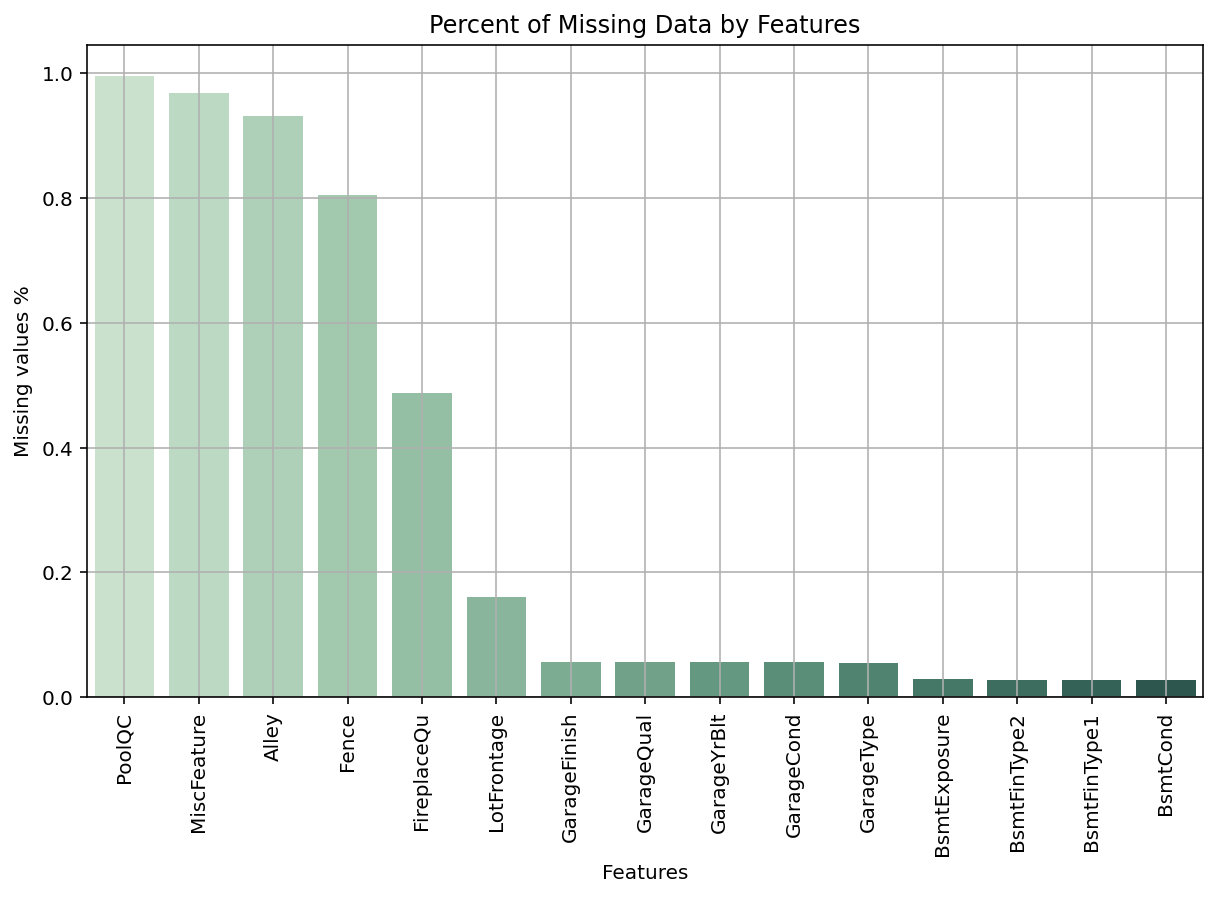

In [10]:
# Visualising missing data
f, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.head(15).index, y=missing_data.head(15)['Percent'], palette="ch:2.5,-.2,dark=.3")
plt.xlabel('Features')
plt.ylabel('Missing values %')
plt.title('Percent of Missing Data by Features')
plt.grid()
plt.show()

## Visualizing Relationships between Categorical Features and Sale Price


In [11]:
train_data.YearBuilt.describe()

count    2051.000000
mean     1971.708922
std        30.177889
min      1872.000000
25%      1953.500000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64

Oldest house built in 1872. Newest house built in 2010.


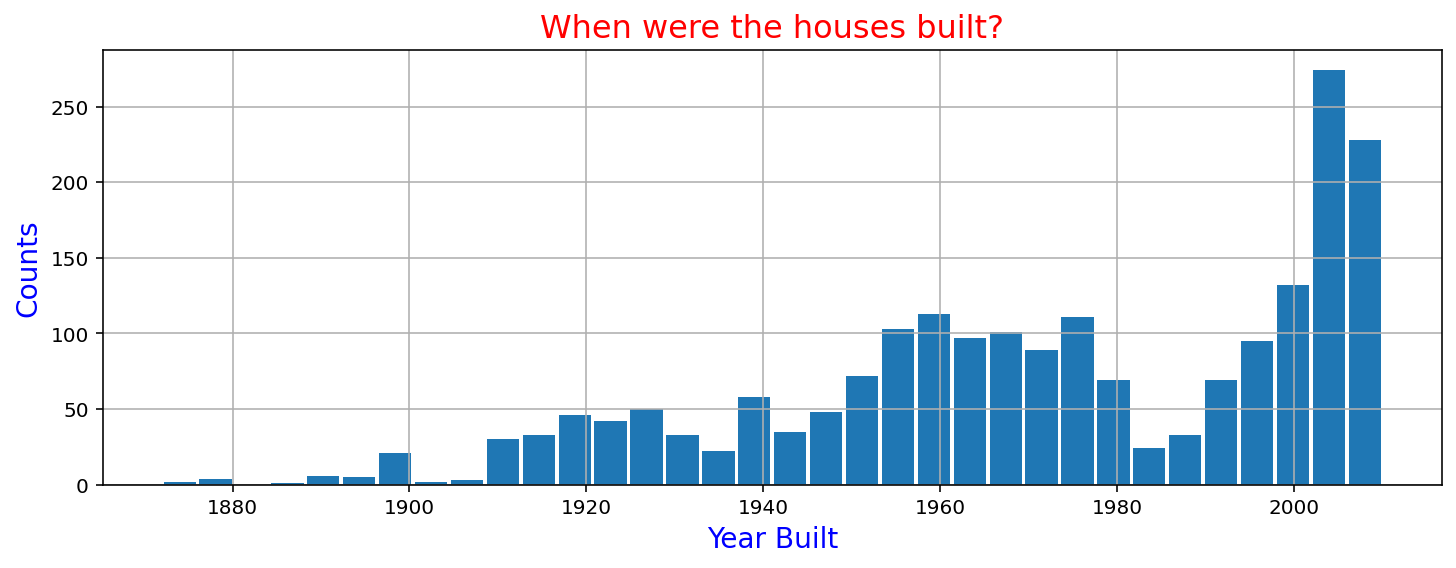

In [12]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    train_data.YearBuilt.min(), train_data.YearBuilt.max()))
train_data.YearBuilt.hist(bins=34, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?', color='red', size=16)
plt.xlabel('Year Built', size=14, color='blue')
plt.ylabel('Counts', size=14, color='blue')
plt.savefig('./images/age_of_Homes.png')
plt.show()

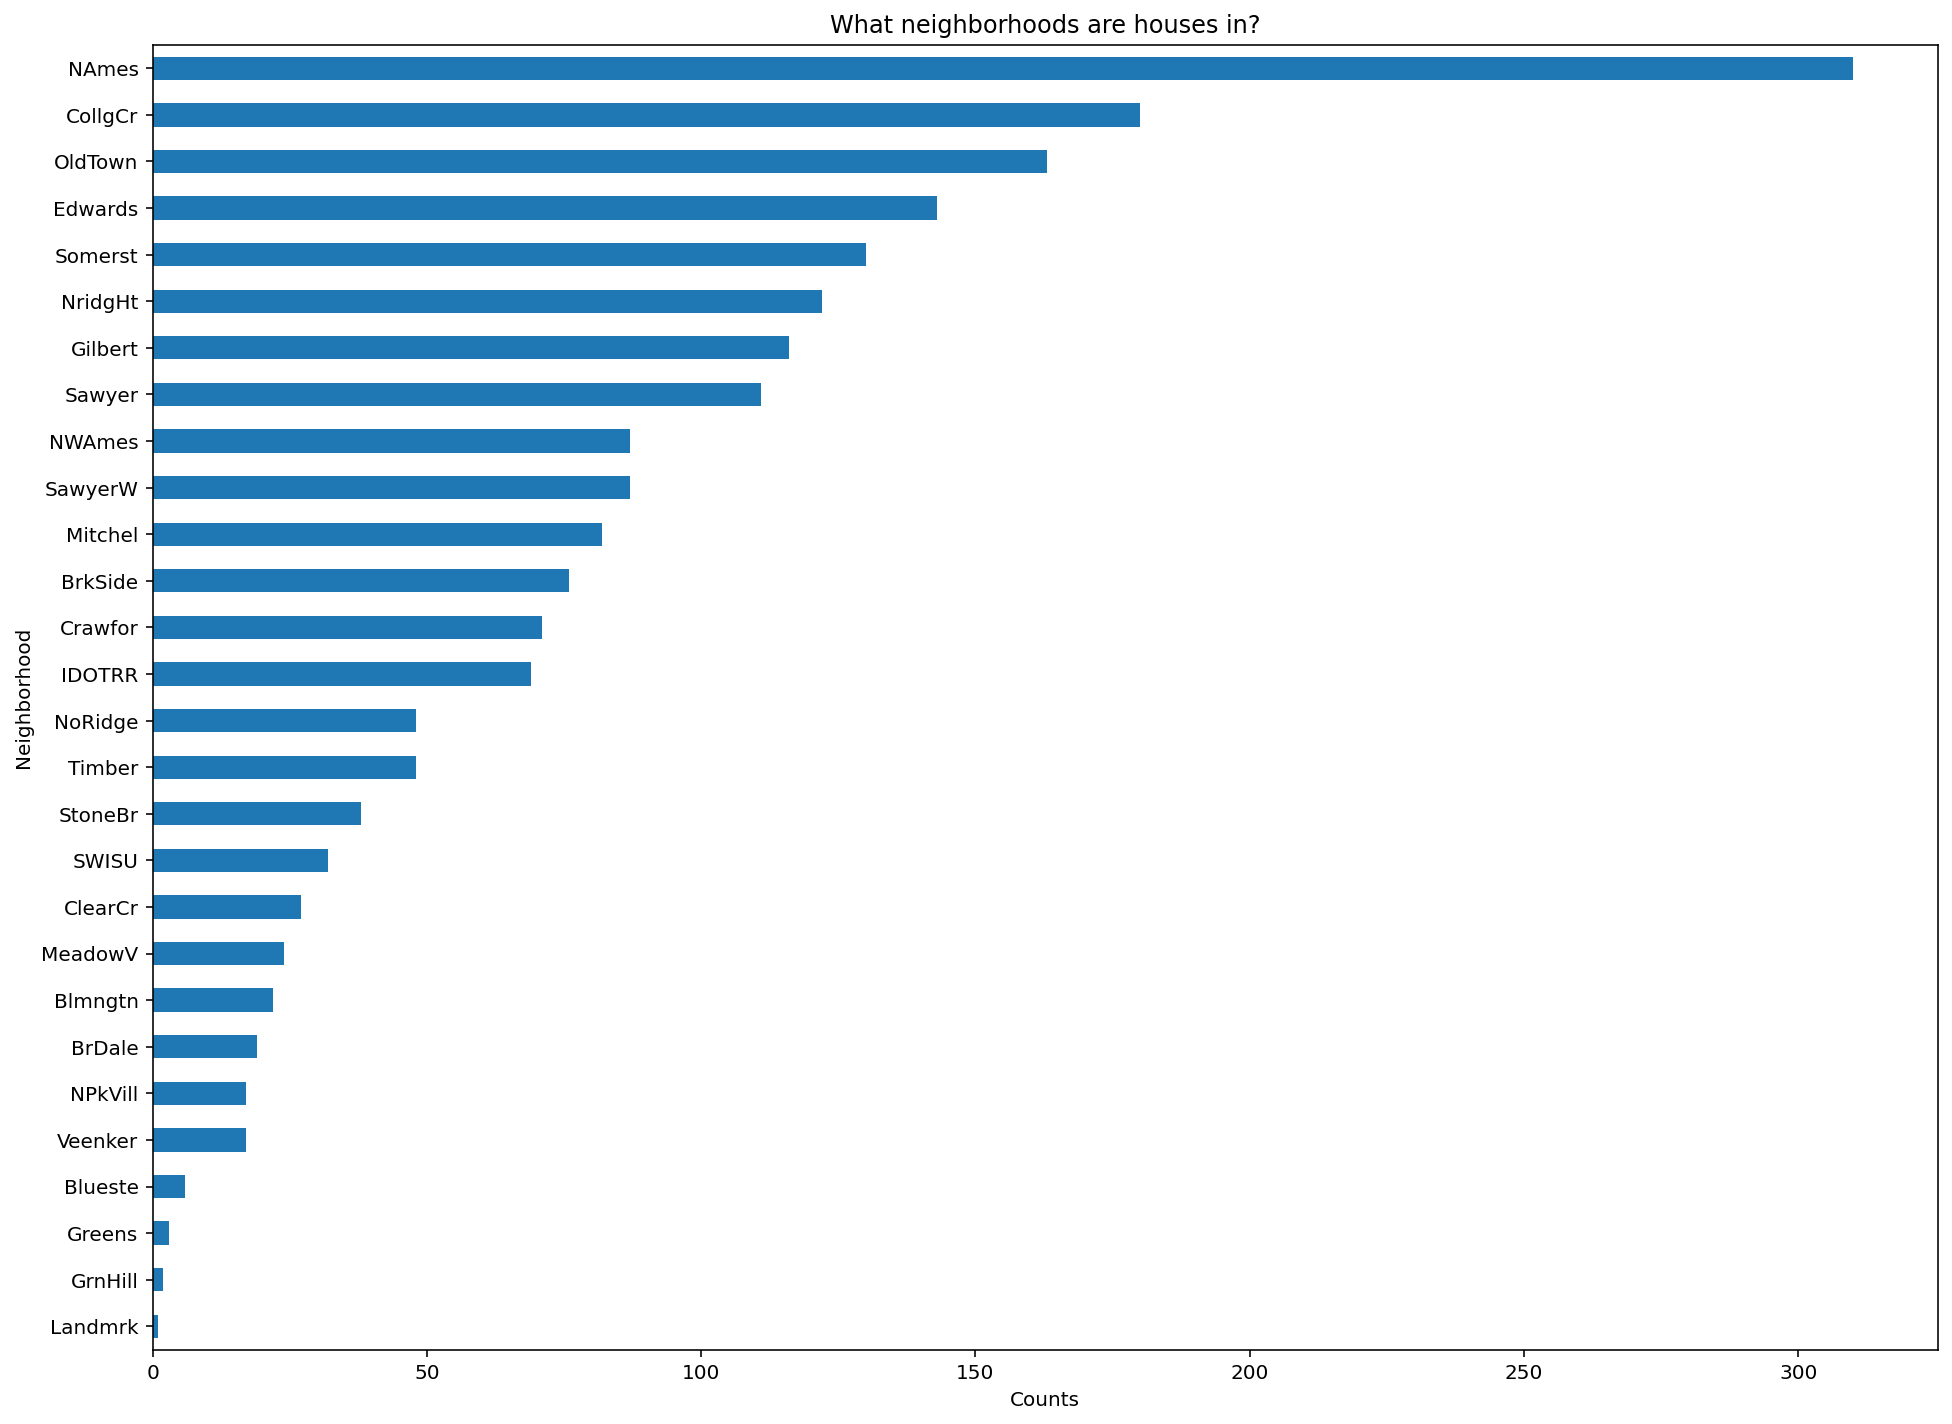

In [13]:
# Where are the houses?
train_data.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='barh', figsize=(16,12))
plt.title('What neighborhoods are houses in?')
plt.xlabel('Counts')

plt.show()

* Looks like a good chunk of houses are in North Ames, Collect Creek, and Old Town, with few houses in Bluestem, Northpark Villa and Veenker.

* We might also assume, at leat for now, that neighborhood correlates with salePrice; we will see later

In [14]:
train_data.groupby(['YrSold', 'SalePrice']).describe()

Id                                                      \
                 count    mean std     min     25%     50%     75%     max   
YrSold SalePrice                                                             
2006   35000       1.0  2844.0 NaN  2844.0  2844.0  2844.0  2844.0  2844.0   
       35311       1.0  2881.0 NaN  2881.0  2881.0  2881.0  2881.0  2881.0   
       51689       1.0  2880.0 NaN  2880.0  2880.0  2880.0  2880.0  2880.0   
       52500       1.0  2690.0 NaN  2690.0  2690.0  2690.0  2690.0  2690.0   
       61500       1.0  2654.0 NaN  2654.0  2654.0  2654.0  2654.0  2654.0   
...                ...     ...  ..     ...     ...     ...     ...     ...   
2010   376162      1.0    37.0 NaN    37.0    37.0    37.0    37.0    37.0   
       410000      1.0    66.0 NaN    66.0    66.0    66.0    66.0    66.0   
       500000      1.0    47.0 NaN    47.0    47.0    47.0    47.0    47.0   
       538000      1.0    16.0 NaN    16.0    16.0    16.0    16.0    16.0   
       611657      1.0    45.0 NaN    45.0    45.0    45.0    45.0    45.0   

                   PID                                             \
                 count         mean std          min          25%   
YrSold SalePrice                                                    
2006   35000       1.0  909101330.0 NaN  909101330.0  909101330.0   
       35311       1.0  911175430.0 NaN  911175430.0  911175430.0   
       51689       1.0  911175410.0 NaN  911175410.0  911175410.0   
       52500       1.0  903430130.0 NaN  903430130.0  903430130.0   
       61500       1.0  902206020.0 NaN  902206020.0  902206020.0   
...                ...          ...  ..          ...          ...   
2010   376162      1.0  528108120.0 NaN  528108120.0  528108120.0   
       410000      1.0  528386040.0 NaN  528386040.0  528386040.0   
       500000      1.0  528176010.0 NaN  528176010.0  528176010.0   
       538000      1.0  527216070.0 NaN  527216070.0  527216070.0   
       611657      1.0  528150070.0 NaN  528150070.0  528150070.0   

                                                        MSSubClass            \
                          50%          75%          max      count  mean std   
YrSold SalePrice                                                               
2006   35000      909101330.0  909101330.0  909101330.0        1.0  30.0 NaN   
       35311      911175430.0  911175430.0  911175430.0        1.0  20.0 NaN   
       51689      911175410.0  911175410.0  911175410.0        1.0  30.0 NaN   
       52500      903430130.0  903430130.0  903430130.0        1.0  30.0 NaN   
       61500      902206020.0  902206020.0  902206020.0        1.0  30.0 NaN   
...                       ...          ...          ...        ...   ...  ..   
2010   376162     528108120.0  528108120.0  528108120.0        1.0  60.0 NaN   
       410000     528386040.0  528386040.0  528386040.0        1.0  50.0 NaN   
       500000     528176010.0  528176010.0  528176010.0        1.0  20.0 NaN   
       538000     527216070.0  527216070.0  527216070.0        1.0  60.0 NaN   
       611657     528150070.0  528150070.0  528150070.0        1.0  20.0 NaN   

                                               LotFrontage                    \
                   min   25%   50%   75%   max       count   mean std    min   
YrSold SalePrice                                                               
2006   35000      30.0  30.0  30.0  30.0  30.0         1.0   60.0 NaN   60.0   
       35311      20.0  20.0  20.0  20.0  20.0         1.0   50.0 NaN   50.0   
       51689      30.0  30.0  30.0  30.0  30.0         1.0   69.0 NaN   69.0   
       52500      30.0  30.0  30.0  30.0  30.0         1.0  153.0 NaN  153.0   
       61500      30.0  30.0  30.0  30.0  30.0         1.0   52.0 NaN   52.0   
...                ...   ...   ...   ...   ...         ...    ...  ..    ...   
2010   376162     60.0  60.0  60.0  60.0  60.0         1.0  102.0 NaN  102.0   
       410000     50.0  50.0  50.0  50.

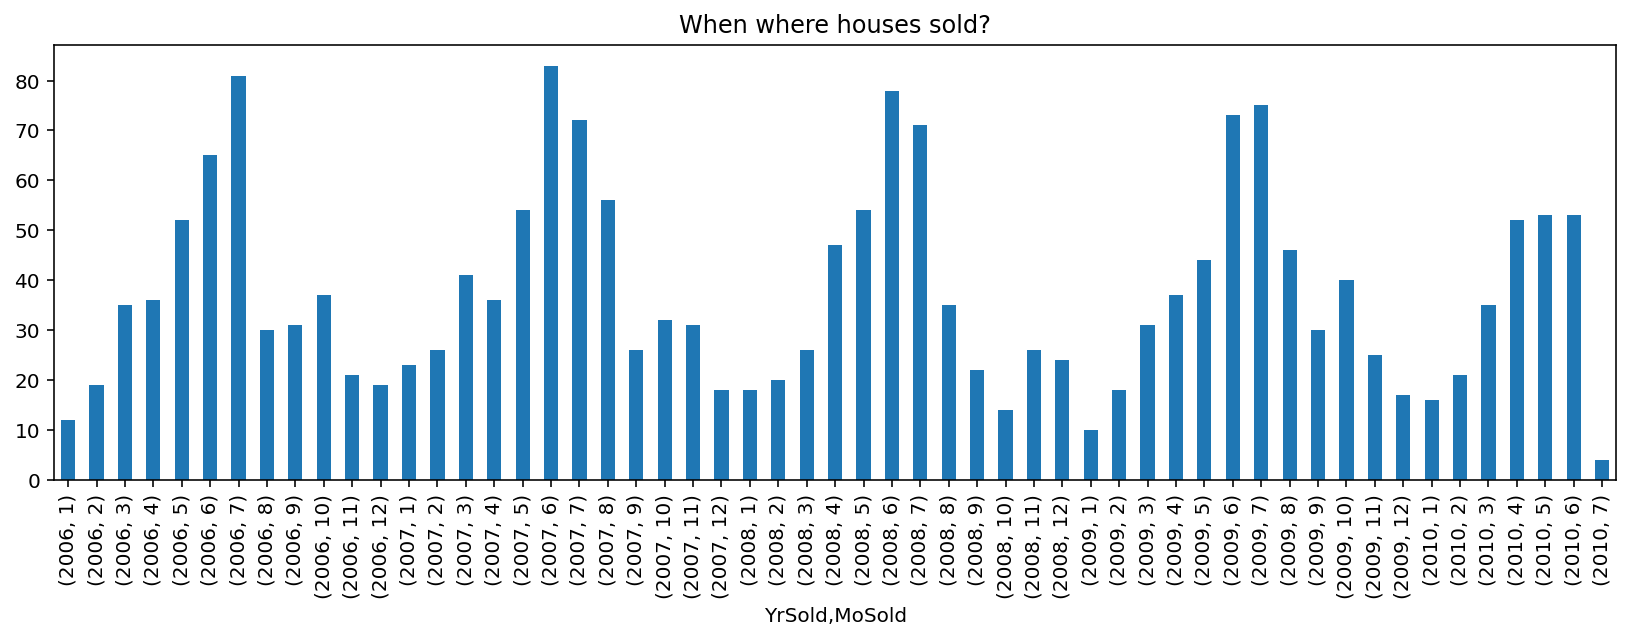

In [15]:
# When where houses sold?
train_data.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When where houses sold?')
plt.show()


* We notice that there is a strong seasonal pattern where house sales are at peak during June and July especially after the year 2006.


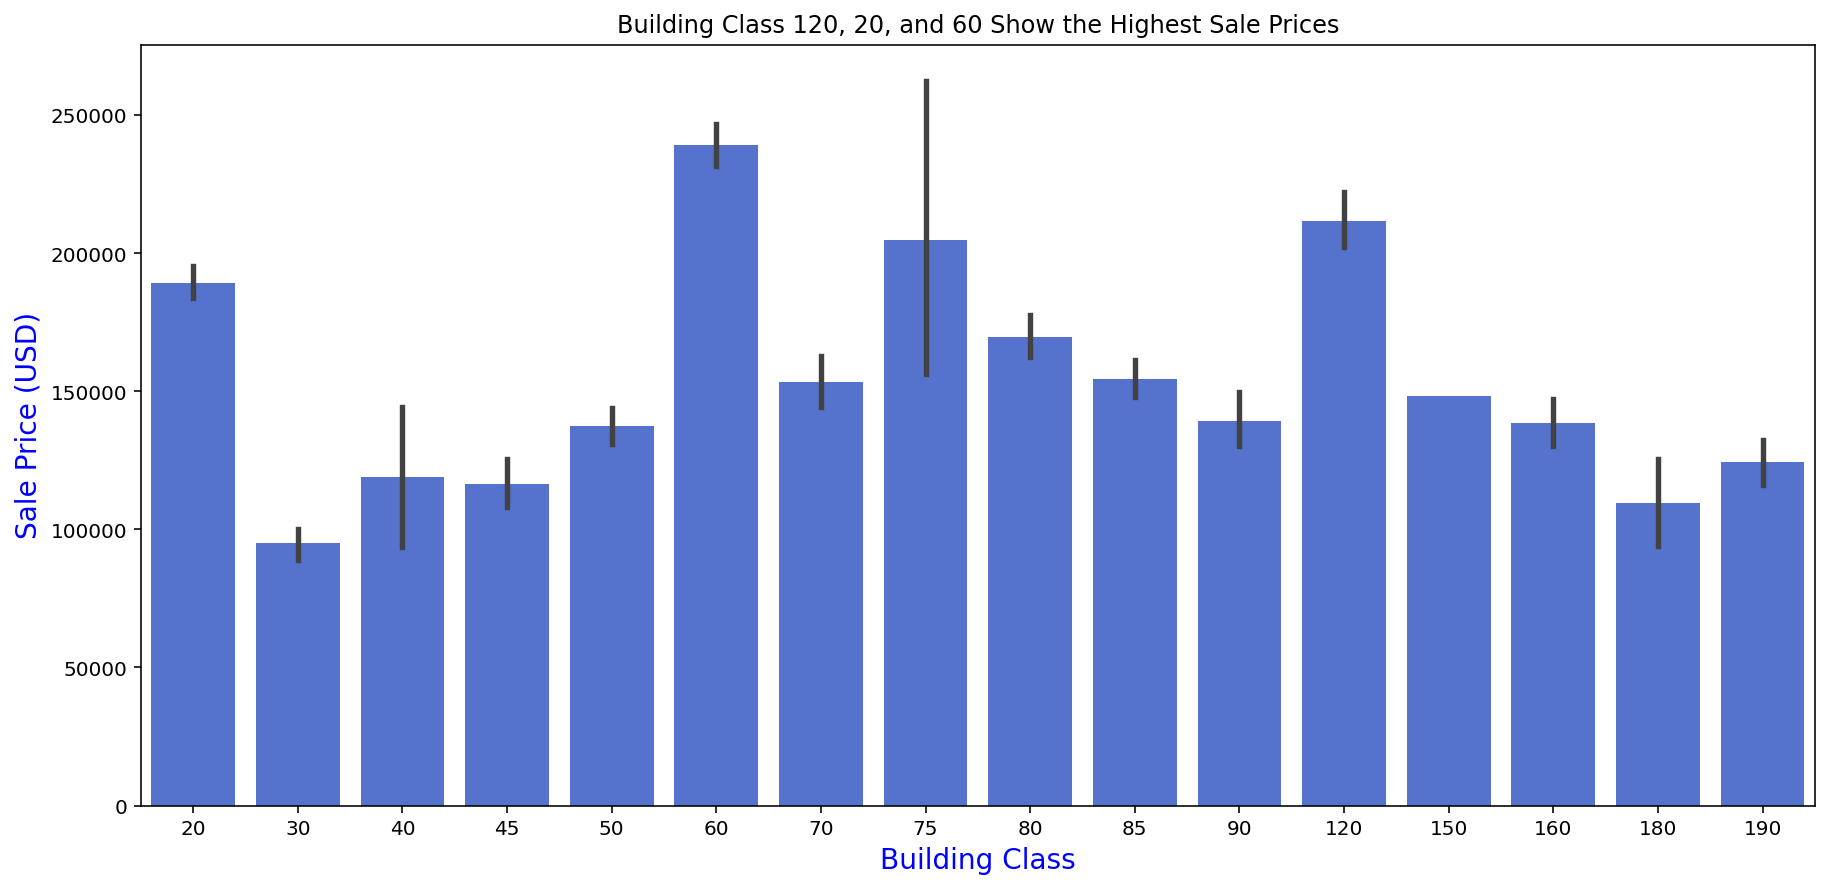

In [16]:

# Closer look at Building class feature

plt.figure(figsize= (15,7))

sns.barplot(x=train_data['MSSubClass'], y=train_data['SalePrice'], color='royalblue')
plt.title('Building Class 120, 20, and 60 Show the Highest Sale Prices')
plt.xlabel('Building Class', size=14, color='blue')
plt.ylabel('Sale Price (USD)', size=14, color='blue')
plt.show();

In the above graph, we can see that Building Classes 120 (1-Story Planned Development Unit), 20 (1-Story 1946 and newer), and 60 (2-Story 1946 & Newer) result in significantly increased sale prices. These building classes might be important features for predicting the price of a building in Ames, Iowa.

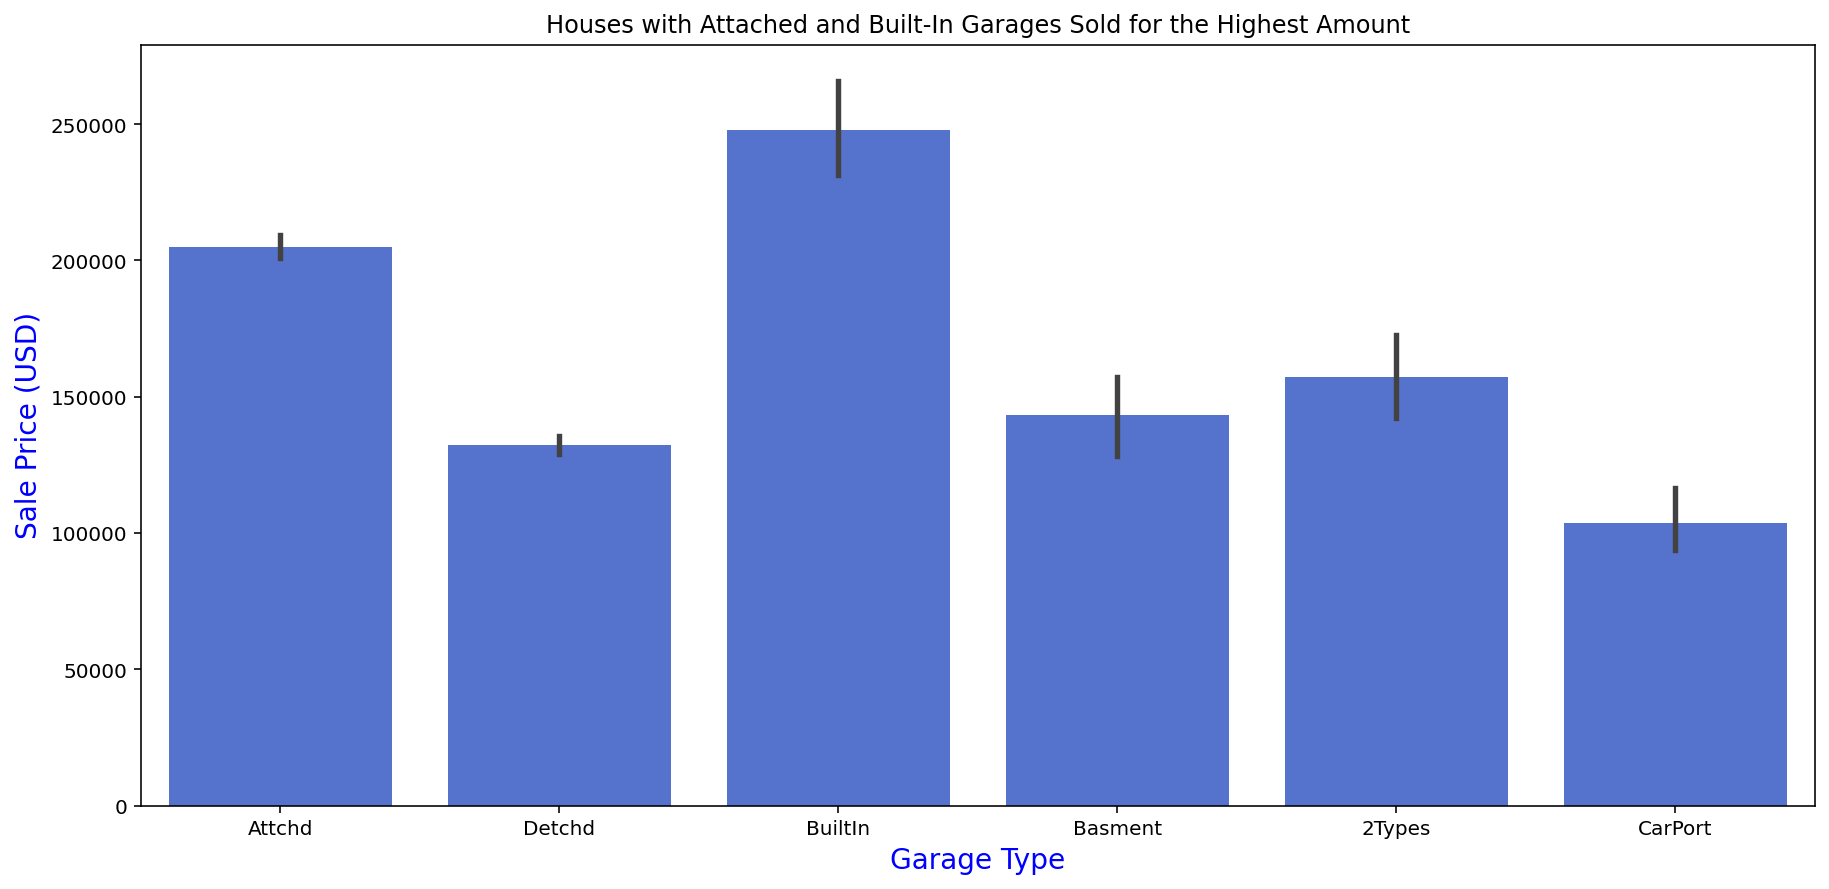

In [17]:
# Closer look at garage type feature

plt.figure(figsize= (15,7))

sns.barplot(x=train_data['GarageType'], y=train_data['SalePrice'], color='royalblue')
plt.title('Houses with Attached and Built-In Garages Sold for the Highest Amount')
plt.xlabel('Garage Type', size=14, color='blue')
plt.ylabel('Sale Price (USD)', size=14, color='blue')
plt.show();

Houses with built-in garages had the highest sale prices. Built-in garages also have living space above them, so in addition to adding value through a garage, they can also add value through more liveable space.

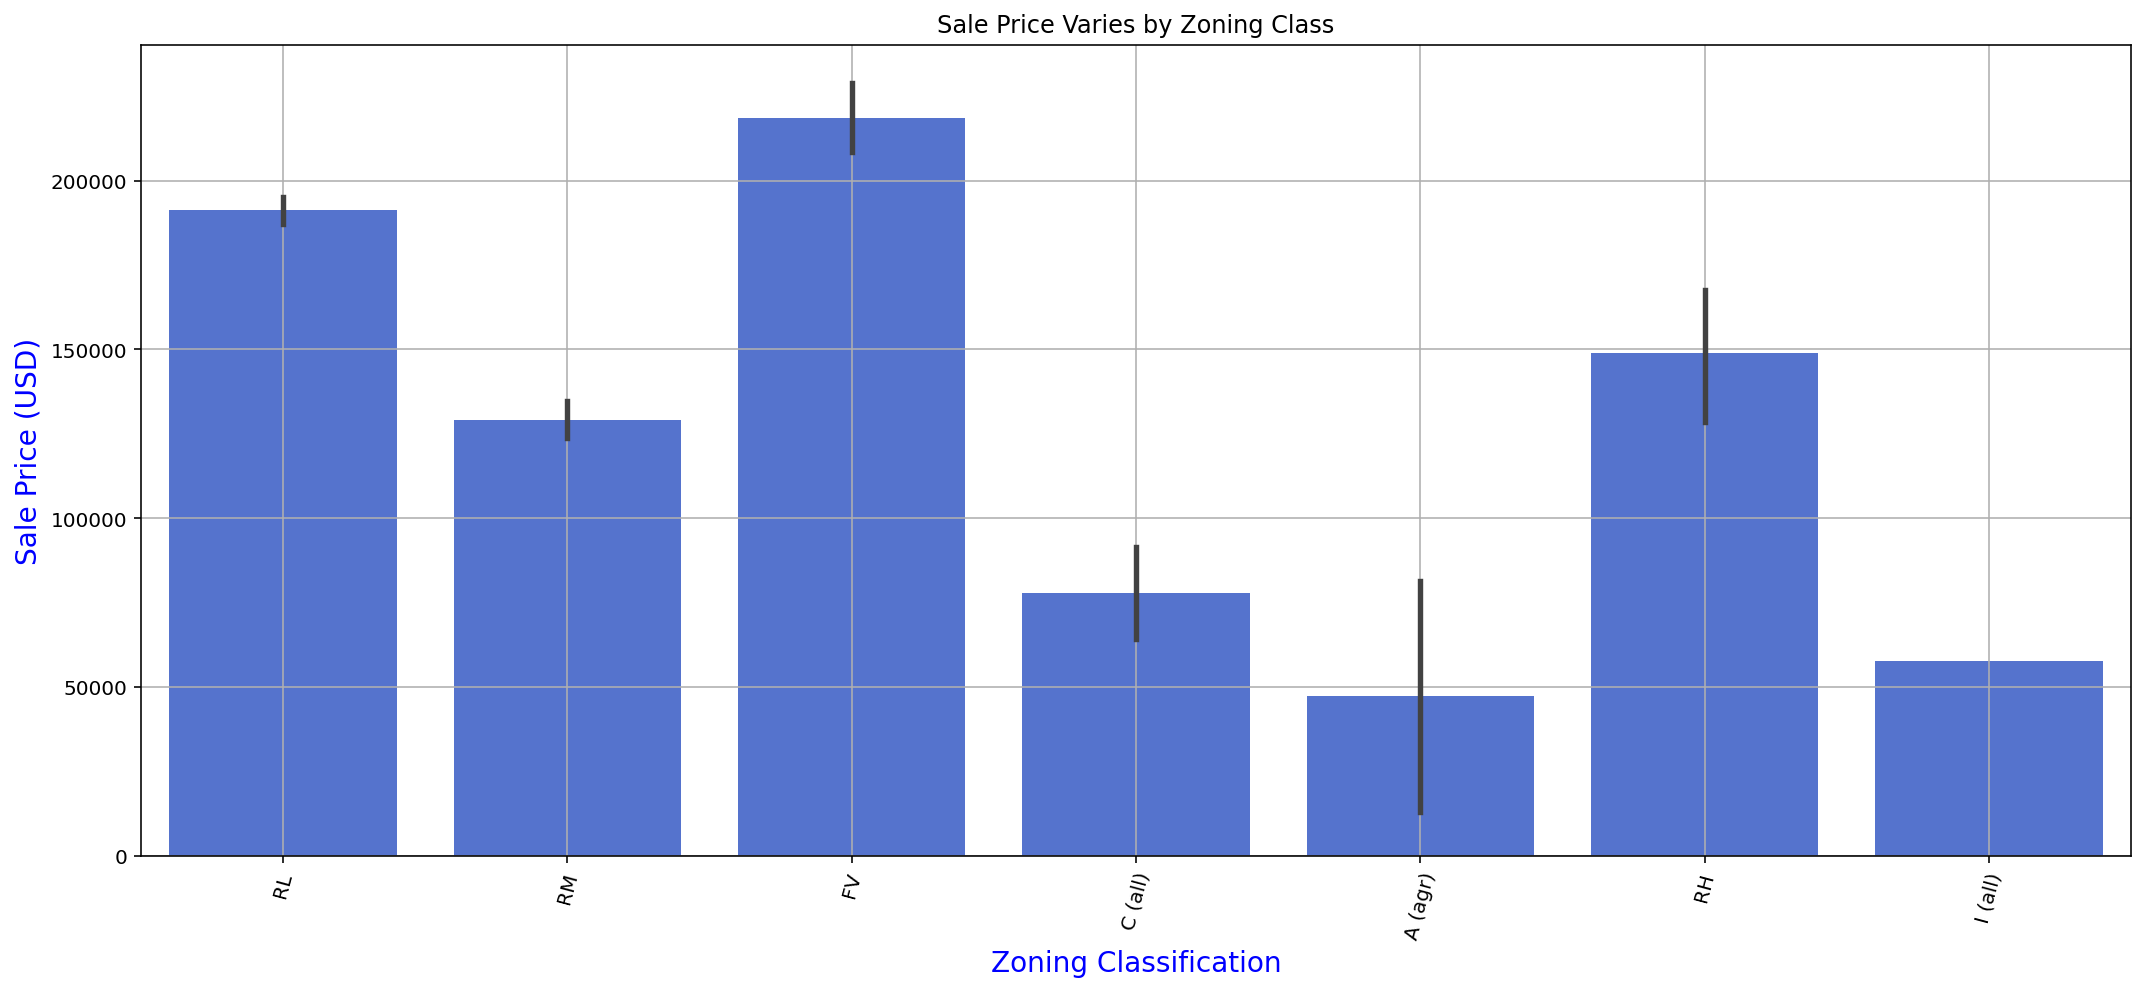

In [18]:
# Closer look at zoning class feature

plt.figure(figsize= (15,7))

sns.barplot(x=train_data['MSZoning'], y=train_data['SalePrice'], color='royalblue')
plt.title('Sale Price Varies by Zoning Class')
plt.xlabel('Zoning Classification', size=14, color='blue')
plt.xticks(rotation = 75)
plt.ylabel('Sale Price (USD)', size=14, color='blue')
plt.tight_layout()
plt.grid()
plt.show();

**With notations:**

* RL='Res. Low Density', 
* RM = 'Res. Med. Density', 
* FV = 'Floating Village', 
* C(all) = 'Commercial', 
* A(agr) = 'Agriculture', 
* RH = 'Res. High Dens', and 
* I(all) = 'Industrial';

From this figure, we can see that Zoning Classification appears to result in vastly different sale prices. 

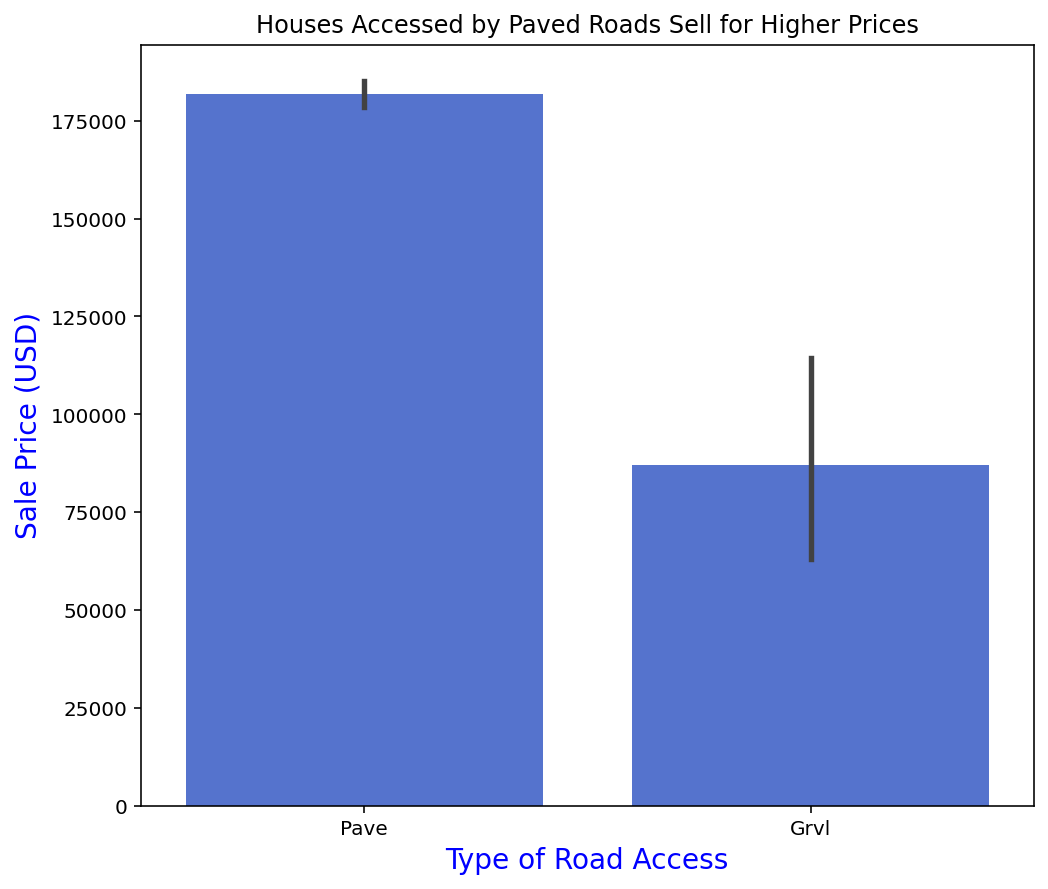

In [19]:
# Closer look at road type feature

plt.figure(figsize= (8,7))

sns.barplot(x=train_data['Street'], y=train_data['SalePrice'], color='royalblue')
plt.title('Houses Accessed by Paved Roads Sell for Higher Prices')
plt.xlabel('Type of Road Access', size=14, color='blue')
plt.ylabel('Sale Price (USD)', size=14, color='blue')
plt.show();

From this figure, it appears that having access to the property via a paved road results in the house selling for a higher price than accessing the property via a gravel road (Grvl).

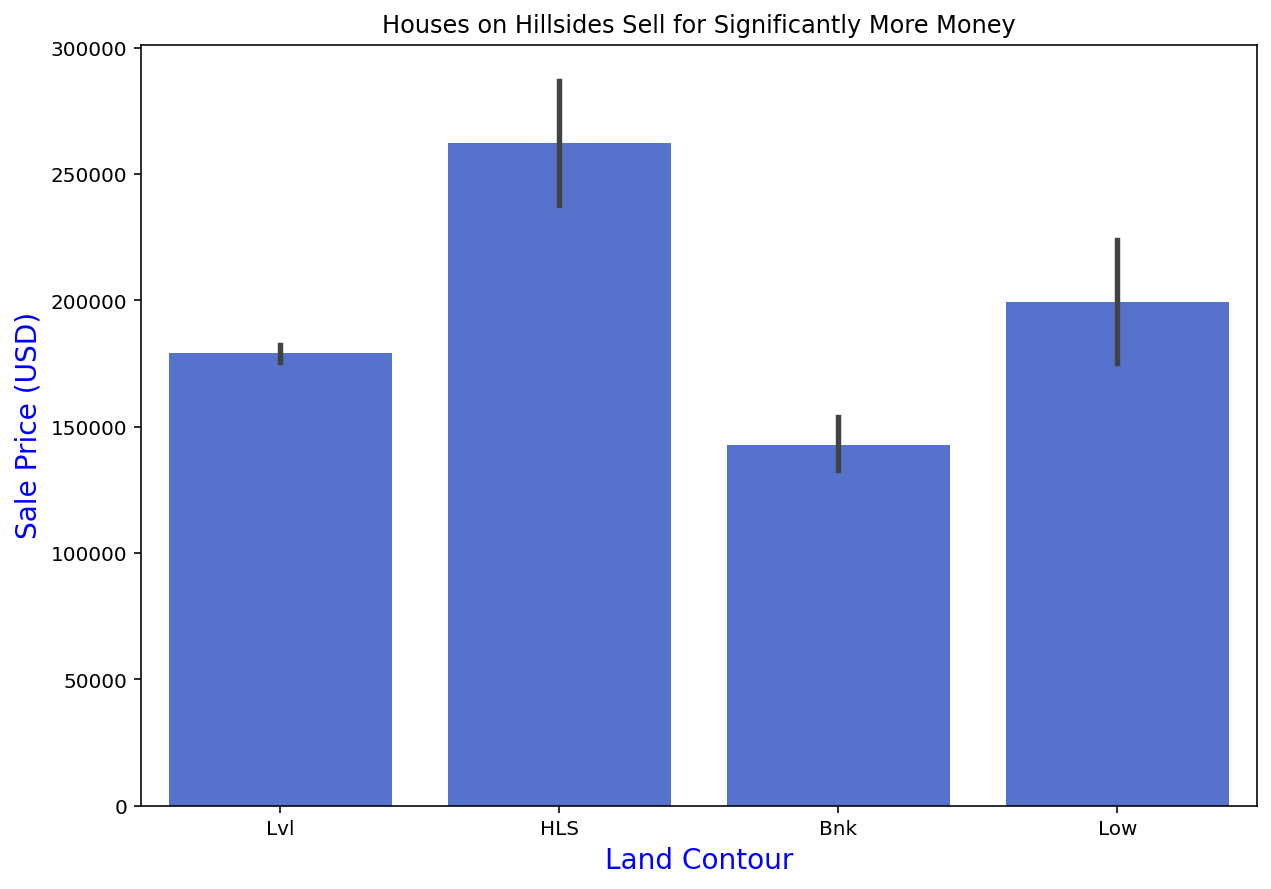

In [20]:
# Closer look at land contour feature

plt.figure(figsize= (10,7))

sns.barplot(x=train_data['LandContour'], y=train_data['SalePrice'], color='royalblue')
plt.title('Houses on Hillsides Sell for Significantly More Money')
plt.xlabel('Land Contour', size=14, color='blue')
plt.ylabel('Sale Price (USD)', size=14, color='blue')
plt.show();

With notations:

* lvl = level,
* HLS = Hilside,
* Bnk = Banked, and
* Low = Low Depression, and 

**by Contour** of a property to mean an outline of a mass of land, or imaginary lines that join points of equal elevation on the surface of the land above or below mean sea level ([source](https://www.skyhinews.com/news/land-navigation-basics-contour-lines/)). From the above figure, we can see that houses on the hillside sell for the most money, while houses that are banked (steep rise from the street to the building) sell or the least amount of money.

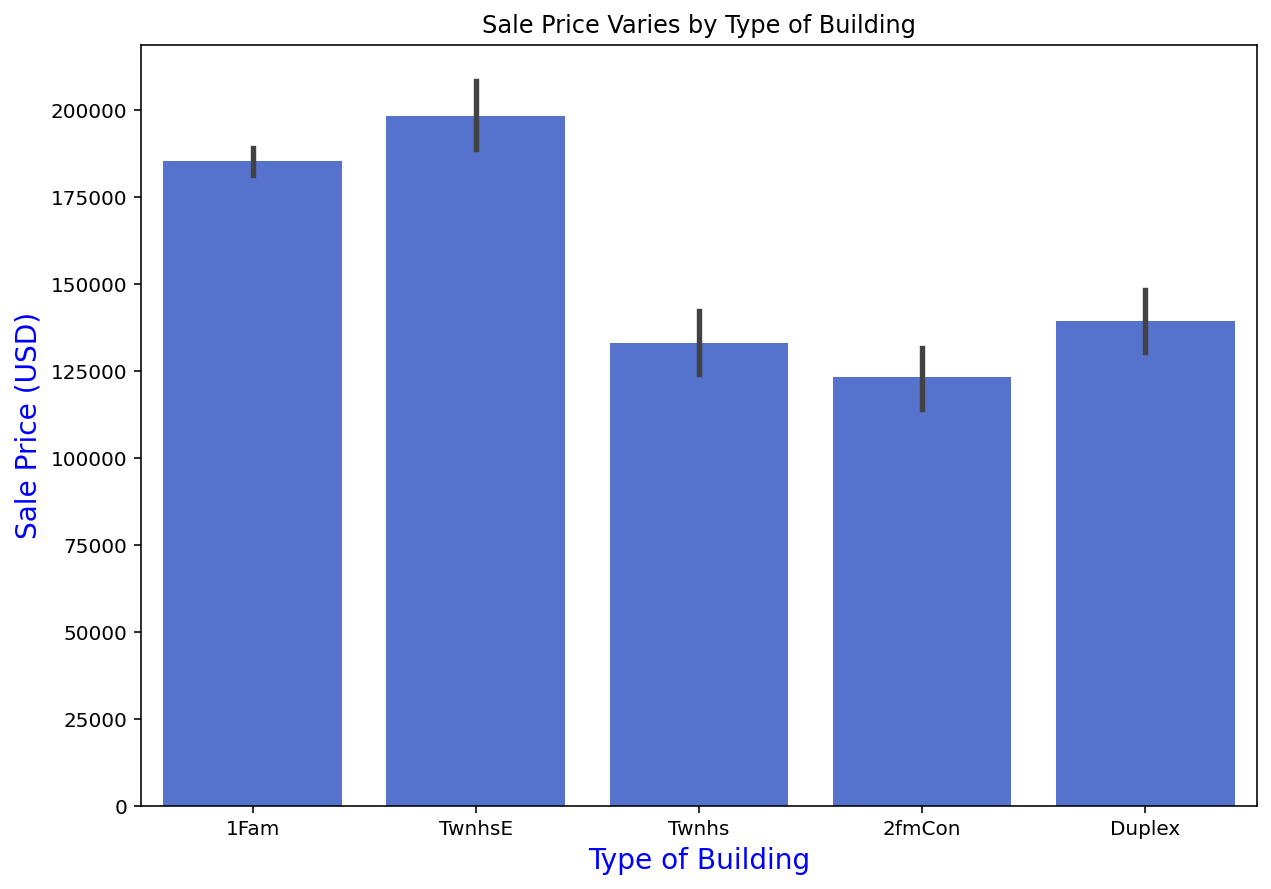

In [21]:
# Closer look at building type feature

plt.figure(figsize= (10,7))

sns.barplot(x=train_data['BldgType'], y=train_data['SalePrice'], color='royalblue')
plt.title('Sale Price Varies by Type of Building')
plt.xlabel('Type of Building', size=14, color='blue')
plt.ylabel('Sale Price (USD)', size=14, color='blue')
plt.show();

Again with notations:
* 1Fam - Single Family
* TwnhsE - Townhouse (End Unit)
* Twnhs - Townhouse (Inside Unit)
* 2fmCon - Two Family Conversion
* Duplex - Duplex

From this figure, we can see that single family homes and townhouses that are end units sell for the most money.

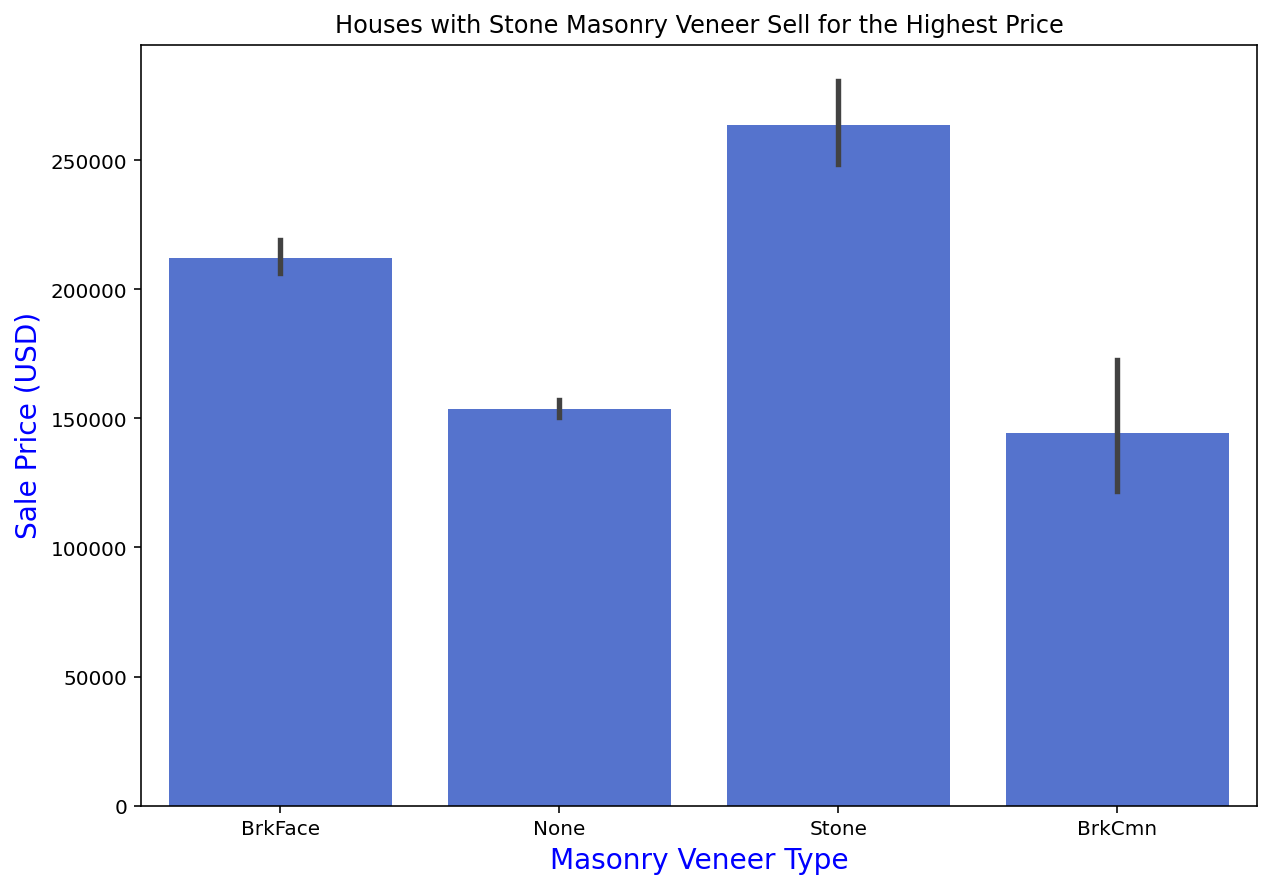

In [22]:
# Closer look at Masonry Veneer type feature

plt.figure(figsize= (10,7))

sns.barplot(x=train_data['MasVnrType'], y=train_data['SalePrice'], color='royalblue')
plt.title('Houses with Stone Masonry Veneer Sell for the Highest Price')
plt.xlabel('Masonry Veneer Type', size=14, color='blue')
plt.ylabel('Sale Price (USD)', size=14, color='blue')
plt.show();

With 
* BrkFace - Brick-Face
* None 
* Stone 
* BrkCmn - Brick-Common

From this figure, it appears that houses with stone veneers sell for substantially more.



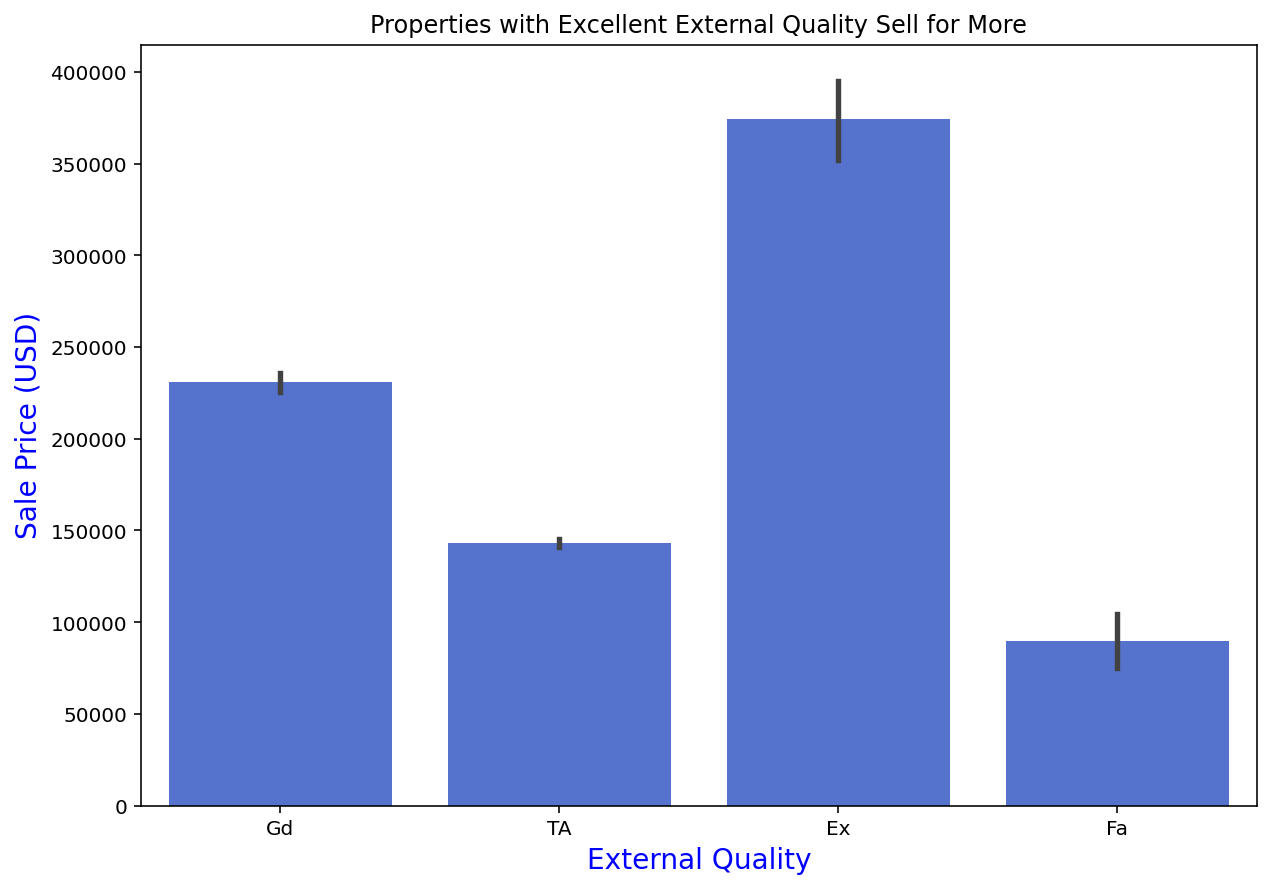

In [23]:
# Closer look at external quality type feature

plt.figure(figsize= (10,7))

sns.barplot(x=train_data['ExterQual'], y=train_data['SalePrice'], color='royalblue')
plt.title('Properties with Excellent External Quality Sell for More')
plt.xlabel('External Quality', size=14, color='blue')
plt.ylabel('Sale Price (USD)', size=14, color='blue')
plt.show();

Notation:
   * Gd - Good
   * TA - Average
   * Ex - Excellent
   * Fa - Fair
   
   From this figure, it appears that the quality of the materials on the exterior of the house impacts price. Houses with excellent quality sell for substantially more.



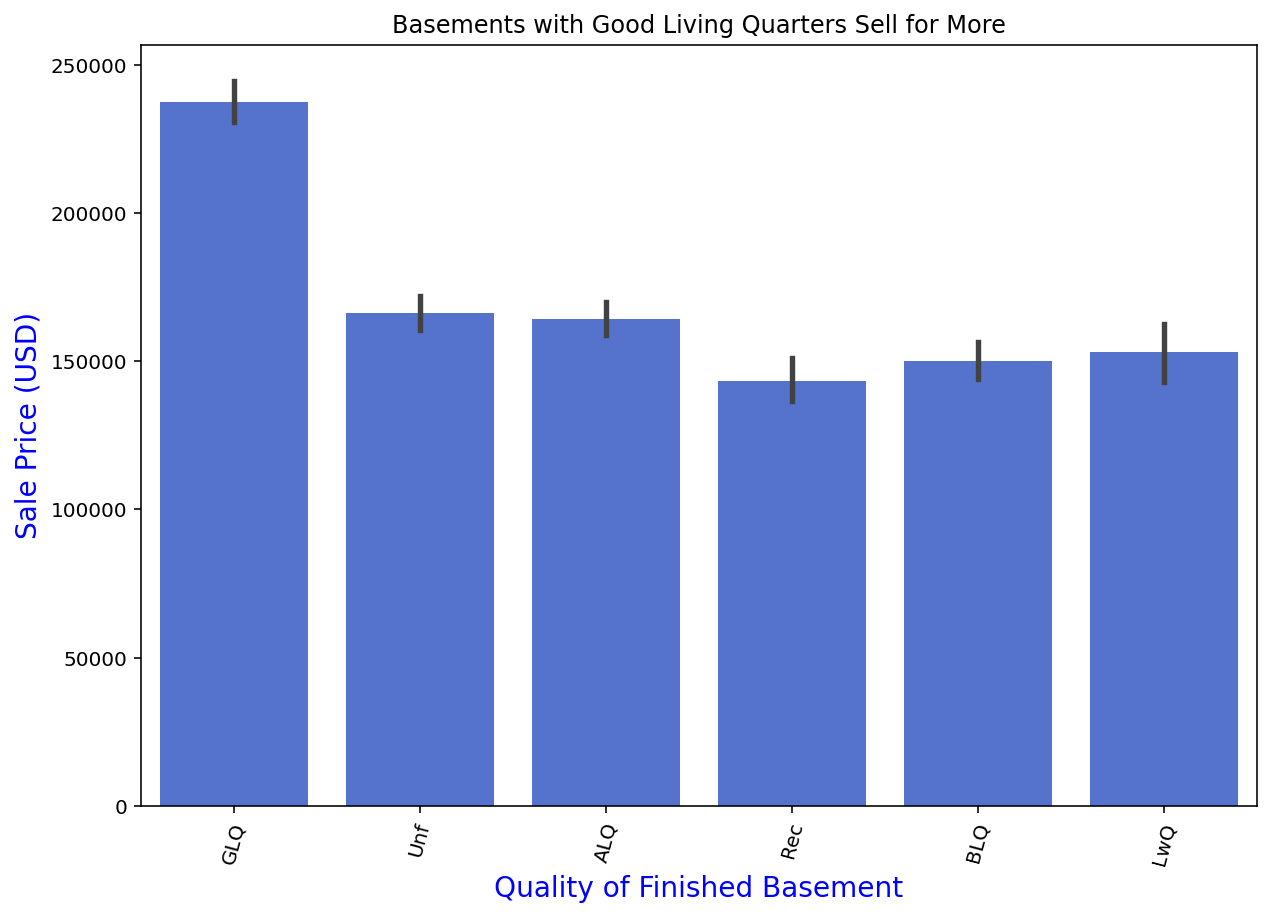

In [24]:
# Closer look at basement type feature

plt.figure(figsize= (10,7))

#x_tick_labels = ['Good Living Quarters', 'Unfinished', 'Average Living Quarters', 'Average Rec Room', 'No Basement', 'Below Average Living Quarters', 'Low Quality']
sns.barplot(x=train_data['BsmtFinType1'], y=train_data['SalePrice'], color='royalblue')
plt.title('Basements with Good Living Quarters Sell for More')
plt.xlabel('Quality of Finished Basement', size=14, color='blue')
plt.ylabel('Sale Price (USD)', size=14, color='blue')
plt.xticks(rotation=75)
plt.show();

Notation:-
* GLQ - Good Living Quarters
* Unf - Unfinished
* ALQ - Average Living Quarters
* Rec - Average Reception Room
* BLQ - Below Average Living Quarters
* LwQ - Low Quality

In this figure, we see that houses with basements with good living quarters sell for the highest price, while variation is smallerr between the other qualities.

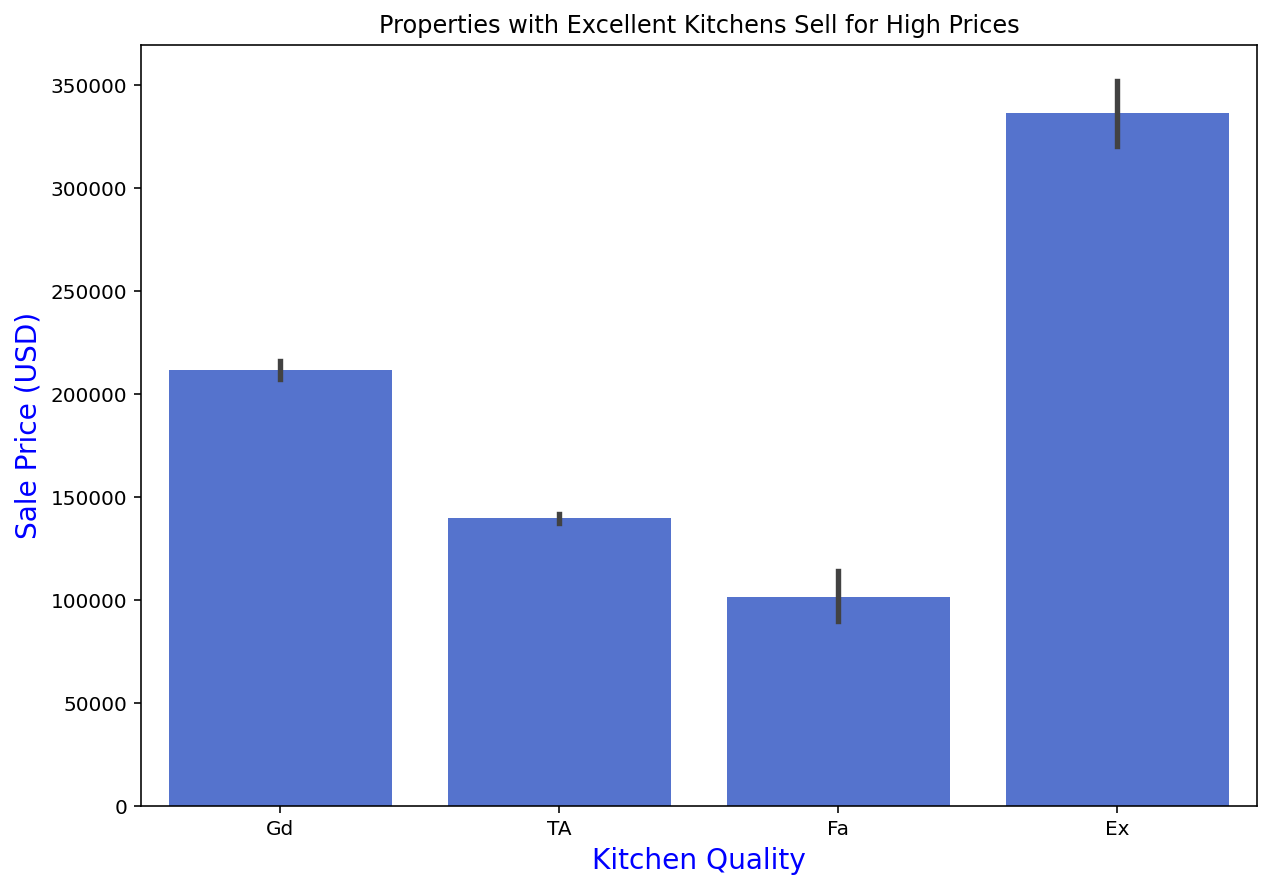

In [25]:
# Closer look at kitchen quality type feature

plt.figure(figsize= (10,7))

sns.barplot(x=train_data['KitchenQual'], y=train_data['SalePrice'], color='royalblue')
plt.title('Properties with Excellent Kitchens Sell for High Prices')
plt.xlabel('Kitchen Quality', size=14, color='blue')
plt.ylabel('Sale Price (USD)', size=14, color='blue')
plt.show();

Notation:
   * Gd - Good
   * TA - Average
   * Fa - Fair
   * Ex - Excellent
   
 In this figure, we see that houses with excellent quality kitchens sell for more.

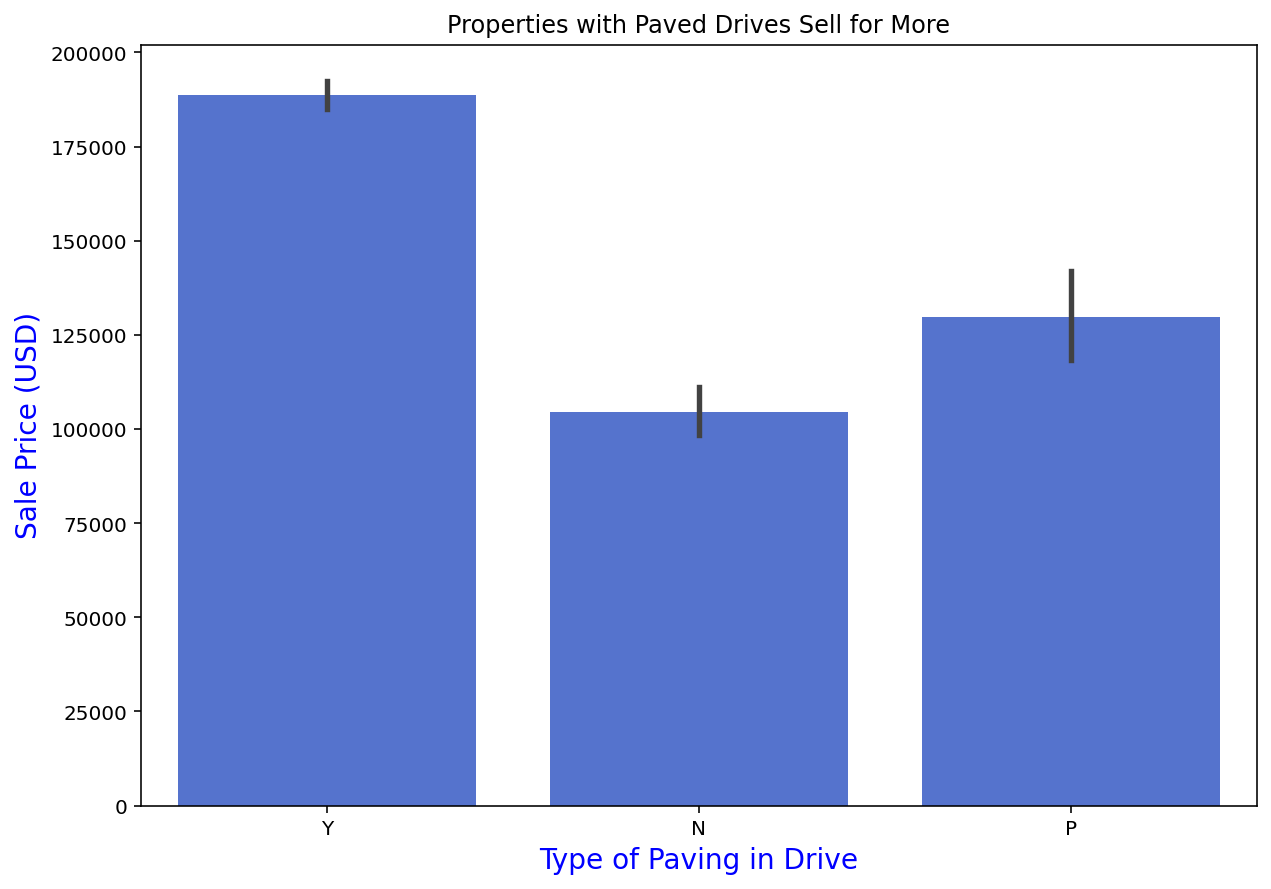

In [26]:
# Closer look at driveway type feature

plt.figure(figsize= (10,7))

sns.barplot(x=train_data['PavedDrive'], y=train_data['SalePrice'], color='royalblue')
plt.title('Properties with Paved Drives Sell for More')
plt.xlabel('Type of Paving in Drive', size=14, color='blue')
plt.ylabel('Sale Price (USD)', size=14, color='blue')
plt.show();

Notation:
   * Y - Paved
   * N - Dirt/Gravel
   * P - Partially Paved
   
Properties with paved access sell for substantially more.

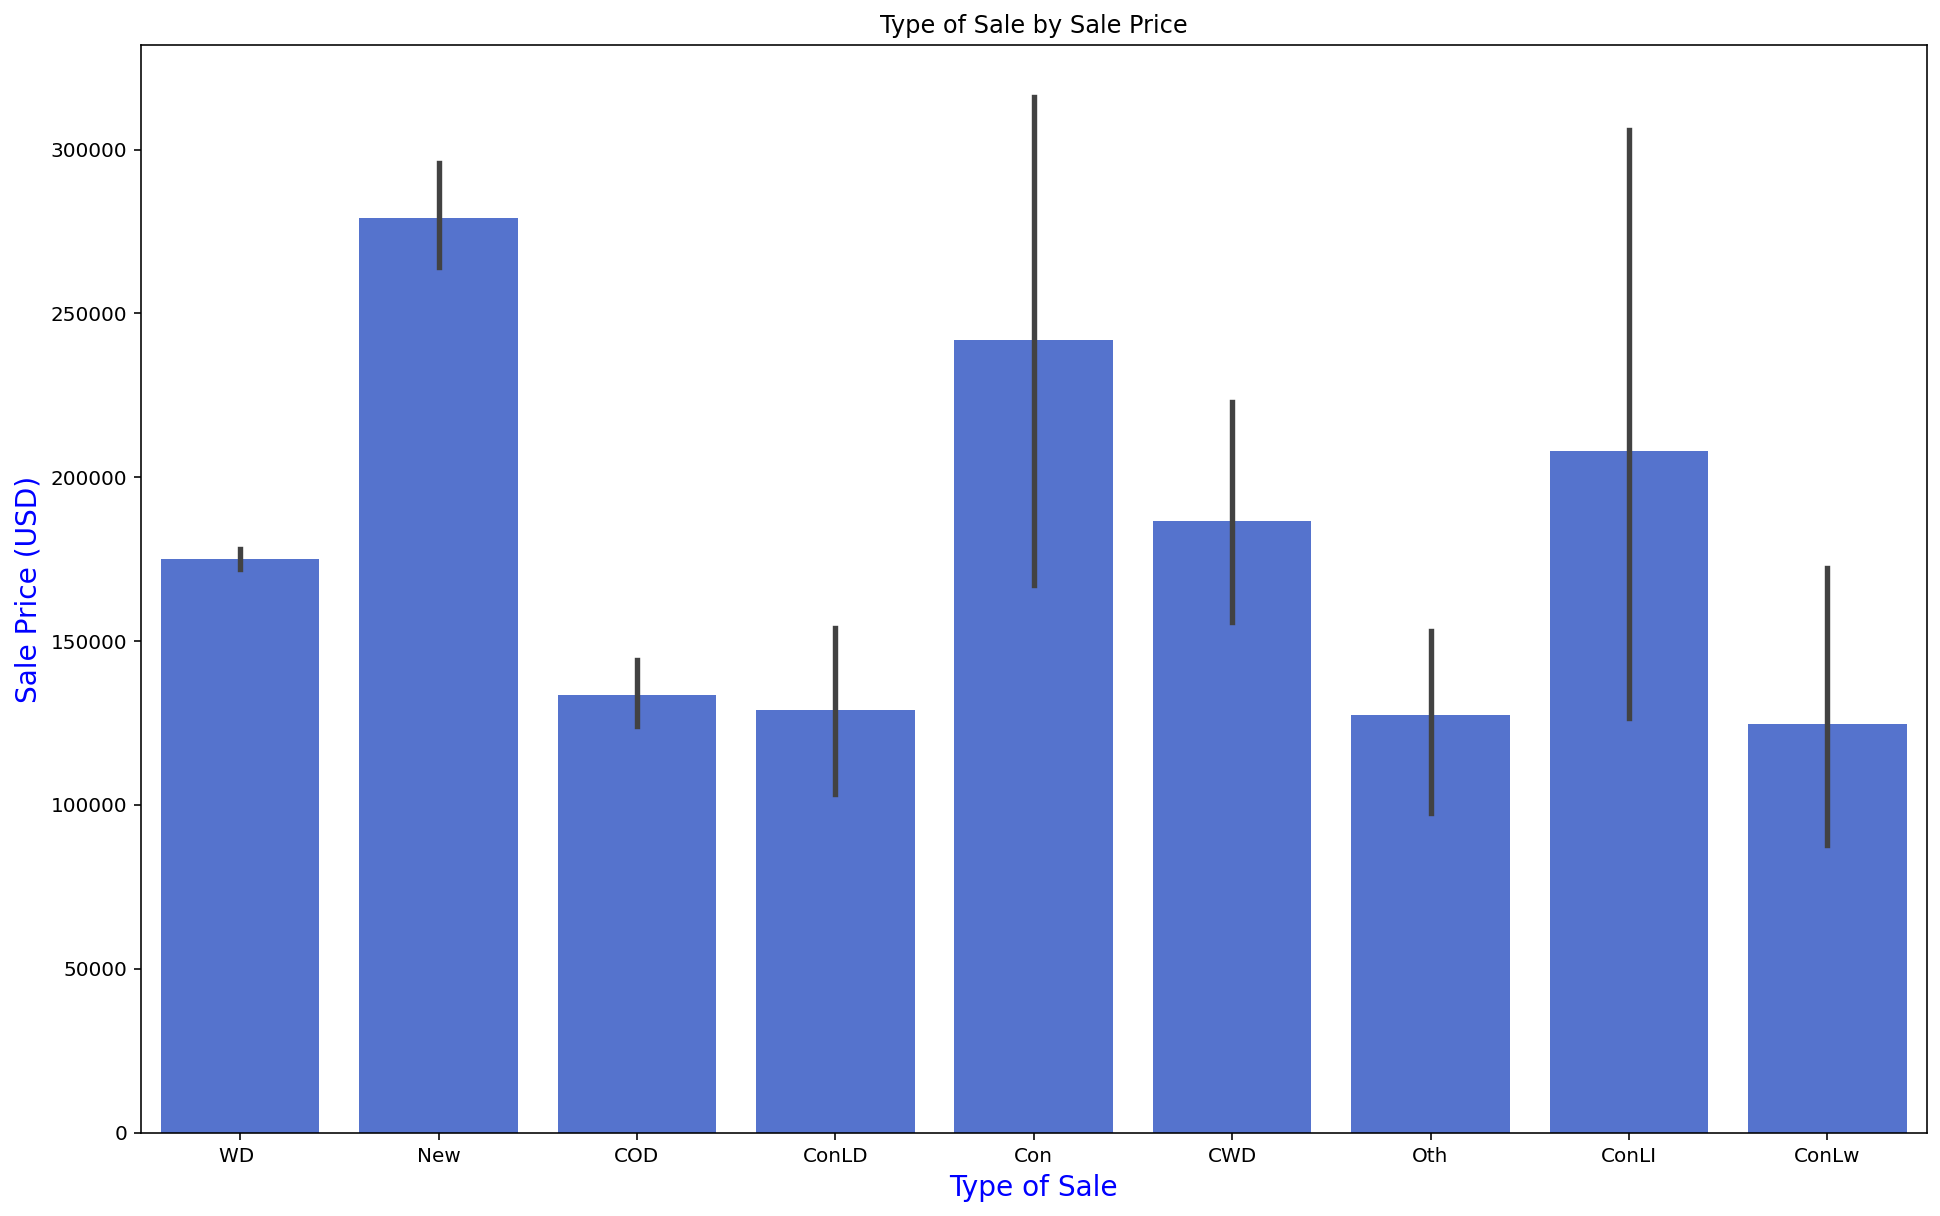

In [27]:
# Closer look at sale type feature

plt.figure(figsize= (16,10))

sns.barplot(x=train_data['SaleType'], y=train_data['SalePrice'], color='royalblue')
plt.title('Type of Sale by Sale Price')
plt.xlabel('Type of Sale', size=14, color='blue')
plt.ylabel('Sale Price (USD)', size=14, color='blue')
plt.show();

Notation:
   * WD :- Waranty Deed
   * New :- New Home
   * CoD :- Court Officer Deed/Estate
   * ConLD :- Contract - Low Down and Low Interest
   * Con :- Contract - 15% Down
   * CWD :- Cash
   * Oth :- Other
   * ConLI :- Contract - Low Down and Low Interest
   * ConLw :- Contract - Low Down
   
From this figure, we can see that New Homes sell for the most.

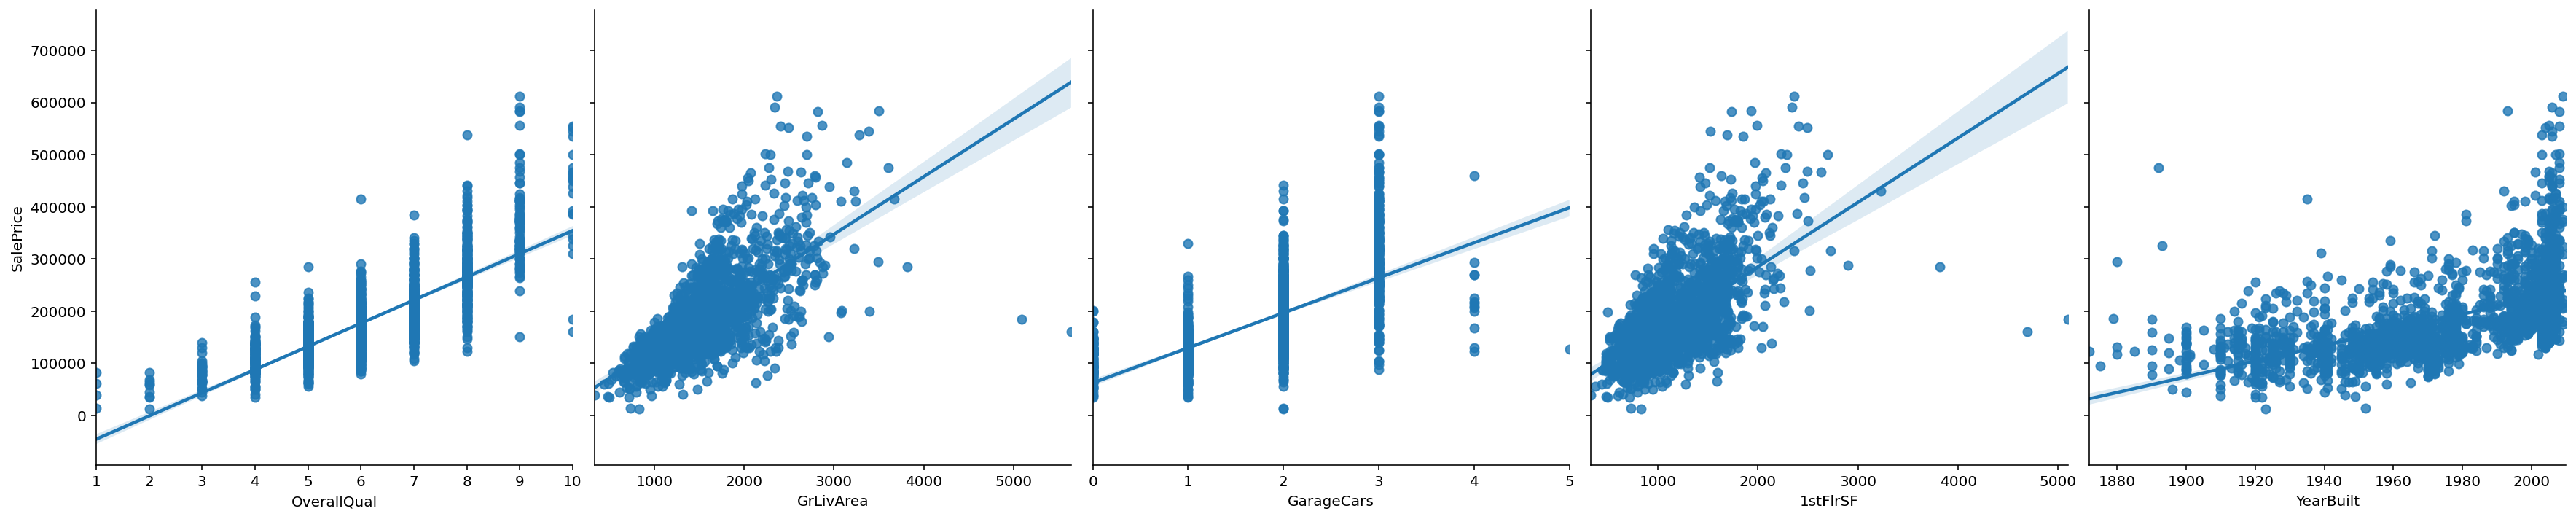

In [28]:
#Creating a pairplot with regression line for more visual aid
sns.pairplot(train_data, 
             x_vars=['OverallQual',
                            'GrLivArea', 
                            'GarageCars', 
                            '1stFlrSF', 
                            'YearBuilt'],
             y_vars=['SalePrice'],
             kind='reg',
             height=5,
             aspect=1);

In [29]:
# Code adopted from SEITHATI NTUMELANG et al kaggle's project 
#Creating a new column in case I want to use the original neighborhood column later on
train_data['Neighborhood_dummies'] = train_data['Neighborhood']

In [30]:
#One-hot encode all nominal variables with no null values
train_data = pd.get_dummies(train_data, columns=['MSSubClass',
                                     'MSZoning',
                                     'Street',
                                     'LandContour',
                                     'Condition1',
                                     'Condition2',
                                     'HouseStyle',
                                     'LotConfig',
                                     'BldgType',
                                     'Neighborhood_dummies',
                                     'RoofStyle',
                                     'RoofMatl',
                                     'Exterior1st',
                                     'Exterior2nd', 
                                     'Foundation', 
                                     'Heating', 
                                     'CentralAir',
                                     'SaleType'], 
                      drop_first=True)

In [31]:
train_data.shape

(2051, 202)

Next I'll look at ordinal variables. 

Most discrete and continuous variables appear good to use as they are, provided they have no null values. For ordinal variables, 'Overall Cond' and 'Overall Qual' are ints with no null values that are good to use as they are.

These are the variables that will require further examination, for one reason or another:

**Continuous:**

* LotFrontage 1721 non-null float64
* BsmtFinSF1 2050 non-null float64
* BsmtFinSF2 2050 non-null float64
* BsmtUnfSF 2050 non-null float64
* TotalBsmtSF 2050 non-null float64
* GarageArea 2050 non-null float64

**Discrete:**

* BsmtFullBath 2049 non-null float64
* BsmtHalfBath 2049 non-null
* GarageYrBlt 1937 non-null float64
* GarageCars 2050 non-null float64
* MoSold 2051 non-null int64

**Ordinal:**

* LotShape 2051 non-null object
* Utilities 2051 non-null object
* LandSlope 2051 non-null object
* ExterQual 2051 non-null object
* ExterCond 2051 non-null object
* BsmtQual 1996 non-null object
* BsmtCond 1996 non-null object
* BsmtExposure 1993 non-null object
* BsmtFinType 1 1996 non-null object
* BsmtFinType 2 1995 non-null object
* HeatingQC 2051 non-null object
* Electrical 2051 non-null object
* KitchenQual 2051 non-null object
* Functional 2051 non-null object
* FireplaceQu 1051 non-null object
* GarageFinish 1937 non-null object
* GarageQual 1937 non-null object
* GarageCond 1937 non-null object
* PavedDrive 2051 non-null object
* PoolQC 9 non-null object
* Fence 400 non-null object

**Nominal:**

* Alley 140 non-null object
* HouseStyle 2051 non-null object
* MasVnrType 2029 non-null object
* MasVnr Area 2029 non-null float64
* GarageType 1938 non-null object
* MiscFeature 65 non-null object

### Continuous Variables Editing

In [32]:
train_data[train_data['BsmtFinSF1'].isnull()==True]


Id        PID  LotFrontage  LotArea Alley LotShape Utilities  \
1327  1342  903230120         99.0     5940   NaN      IR1    AllPub   

     LandSlope Neighborhood  OverallQual  OverallCond  YearBuilt  \
1327       Gtl      BrkSide            4            7       1946   

      YearRemod/Add MasVnrType  MasVnrArea ExterQual ExterCond BsmtQual  \
1327           1950       None         0.0        TA        TA      NaN   

     BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1327      NaN          NaN          NaN         NaN          NaN         NaN   

      BsmtUnfSF  TotalBsmtSF HeatingQC Electrical  1stFlrSF  2ndFlrSF  \
1327        NaN          NaN        TA      FuseA       896         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1327             0        896           NaN           NaN         1         0   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  ...  \
1327             2             1          TA             4        Typ  ...   

      Exterior1st_HdBoard Exterior1st_ImStucc Exterior1st_MetalSd  \
1327                    0                   0                   1   

      Exterior1st_Plywood Exterior1st_Stone  Exterior1st_Stucco  \
1327                    0                 0                   0   

      Exterior1st_VinylSd Exterior1st_Wd Sdng Exterior1st_WdShing  \
1327                    0                   0                   0   

     Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  \
1327                   0                    0                    0   

      Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_HdBoard  \
1327                   1                    0                    0   

      Exterior2nd_ImStucc Exterior2nd_MetalSd Exterior2nd_Plywood  \
1327                    0                   0                   0   

     Exterior2nd_Stone  Exterior2nd_Stucco  Exterior2nd_VinylSd  \
1327                 0                   0                    0   

      Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  Foundation_CBlock  \
1327                    0                    0                  0   

      Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  \
1327                 1                0                 0                0   

      Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  CentralAir_Y  \
1327             0             0             0             0             1   

      SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
1327             0             0               1               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD   
1327               0             0             0             0  

[1 rows x 202 columns]

In [33]:
train_data[train_data['GarageArea'].isnull()==True]


Id        PID  LotFrontage  LotArea Alley LotShape Utilities  \
1712  2237  910201180         50.0     9060   NaN      Reg    AllPub   

     LandSlope Neighborhood  OverallQual  OverallCond  YearBuilt  \
1712       Gtl       IDOTRR            5            6       1923   

      YearRemod/Add MasVnrType  MasVnrArea ExterQual ExterCond BsmtQual  \
1712           1999       None         0.0        TA        TA       Gd   

     BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1712       TA           No          ALQ       548.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF HeatingQC Electrical  1stFlrSF  2ndFlrSF  \
1712      311.0        859.0        Ex      SBrkr       942       886   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1712             0       1828           0.0           0.0         2         0   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  ...  \
1712             3             1          Gd             6        Typ  ...   

      Exterior1st_HdBoard Exterior1st_ImStucc Exterior1st_MetalSd  \
1712                    0                   0                   0   

      Exterior1st_Plywood Exterior1st_Stone  Exterior1st_Stucco  \
1712                    0                 0                   0   

      Exterior1st_VinylSd Exterior1st_Wd Sdng Exterior1st_WdShing  \
1712                    0                   1                   0   

     Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  \
1712                   0                    0                    0   

      Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_HdBoard  \
1712                   0                    0                    0   

      Exterior2nd_ImStucc Exterior2nd_MetalSd Exterior2nd_Plywood  \
1712                    0                   0                   1   

     Exterior2nd_Stone  Exterior2nd_Stucco  Exterior2nd_VinylSd  \
1712                 0                   0                    0   

      Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  Foundation_CBlock  \
1712                    0                    0                  0   

      Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  \
1712                 0                0                 0                0   

      Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  CentralAir_Y  \
1712             0             0             0             0             1   

      SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
1712             0             0               0               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD   
1712               0             0             0             1  

[1 rows x 202 columns]

In [34]:
#Removes the one row with null value in 'Garage Area'
for i in train_data[train_data['GarageArea'].isnull()==True].loc[:,'Id']:
    train_data = train_data[train_data['Id']!=i]


### Discrete Variables Editing

In [35]:
train_data[train_data['BsmtFullBath'].isnull()==True]

Id        PID  LotFrontage  LotArea Alley LotShape Utilities  \
616   1498  908154080        123.0    47007   NaN      IR1    AllPub   
1327  1342  903230120         99.0     5940   NaN      IR1    AllPub   

     LandSlope Neighborhood  OverallQual  OverallCond  YearBuilt  \
616        Gtl      Edwards            5            7       1959   
1327       Gtl      BrkSide            4            7       1946   

      YearRemod/Add MasVnrType  MasVnrArea ExterQual ExterCond BsmtQual  \
616            1996       None         0.0        TA        TA      NaN   
1327           1950       None         0.0        TA        TA      NaN   

     BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
616       NaN          NaN          NaN         0.0          NaN         0.0   
1327      NaN          NaN          NaN         NaN          NaN         NaN   

      BsmtUnfSF  TotalBsmtSF HeatingQC Electrical  1stFlrSF  2ndFlrSF  \
616         0.0          0.0        TA      SBrkr      3820         0   
1327        NaN          NaN        TA      FuseA       896         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
616              0       3820           NaN           NaN         3         1   
1327             0        896           NaN           NaN         1         0   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  ...  \
616              5             1          Ex            11        Typ  ...   
1327             2             1          TA             4        Typ  ...   

      Exterior1st_HdBoard Exterior1st_ImStucc Exterior1st_MetalSd  \
616                     0                   0                   0   
1327                    0                   0                   1   

      Exterior1st_Plywood Exterior1st_Stone  Exterior1st_Stucco  \
616                     1                 0                   0   
1327                    0                 0                   0   

      Exterior1st_VinylSd Exterior1st_Wd Sdng Exterior1st_WdShing  \
616                     0                   0                   0   
1327                    0                   0                   0   

     Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  \
616                    0                    0                    0   
1327                   0                    0                    0   

      Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_HdBoard  \
616                    0                    0                    0   
1327                   1                    0                    0   

      Exterior2nd_ImStucc Exterior2nd_MetalSd Exterior2nd_Plywood  \
616                     0                   0                   1   
1327                    0                   0                   0   

     Exterior2nd_Stone  Exterior2nd_Stucco  Exterior2nd_VinylSd  \
616                  0                   0                    0   
1327                 0                   0                    0   

      Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  Foundation_CBlock  \
616                     0                    0                  0   
1327                    0                    0                  0   

      Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  \
616                  0                1                 0                0   
1327                 1                0                 0                0   

      Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  CentralAir_Y  \
616              0             0             0             0             1   
1327             0             0             0             0             1   

      SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
616              0             0               0               0   
1327             0             0               1               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD   
616                0  

In [36]:
#We have already removed one of the rows that is missing 'Bsmt Full Bath' and 'Bsmt Half Bath'
#Removes this row as well, which is missing both of these, to resolve both those vars.
for i in train_data[train_data['BsmtFullBath'].isnull()==True].loc[:,'Id']:
    train_data = train_data[train_data['Id']!=i]

In [37]:
#We have already removed the row that was causing an issue with 'Garage Cars':
train_data[train_data['GarageCars'].isnull()==True]

Empty DataFrame
Columns: [Id, PID, LotFrontage, LotArea, Alley, LotShape, Utilities, LandSlope, Neighborhood, OverallQual, OverallCond, YearBuilt, YearRemod/Add, MasVnrType, MasVnrArea, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SalePrice, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_150, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_C (all), MSZoning_FV, MSZoning_I (all), MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LandContour_HLS, LandContour_Low, LandContour_Lvl, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]
Index: []

[0 rows x 202 columns]

The month sold variable is essentially categorical. I am going to create a 'Season' variable, and then also get dummies for the individual months.

In [38]:
#Creates variable for season of sale from month of sale variable
seasons = {
    'Spring':[3,4,5],
    'Summer':[6,7,8],
    'Fall':[9,10,11],
    'Winter':[12,1,2]
}

train_data['Season'] = train_data['MoSold'].map(lambda x: [i for i in seasons if x in seasons[i]][0])

In [39]:
#Gets dummies for month and season of sale
train_data = pd.get_dummies(train_data, columns=['Season'],drop_first=True)
train_data = pd.get_dummies(train_data, columns=['MoSold'], drop_first=True)

## Ordinal Variables Editing

First we will look at all ordinal variables that had no missing values.

In [40]:
#Lot Shape will be assigned numeric values according to irregularity (0,1,2,3)
train_data['LotShape'] = train_data['LotShape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})

In [41]:
train_data['Utilities'].value_counts()


AllPub    2046
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64

In [42]:
#This seems somewhat negligible, but it may as well be included
train_data['Utilities'] = train_data['Utilities'].map({'AllPub':0,'NoSewr':1,'NoSeWa':2,'ELO':3})

In [43]:
train_data['LandSlope'].value_counts()


Gtl    1950
Mod      88
Sev      10
Name: LandSlope, dtype: int64

In [44]:
#Gtl is basically the reference, there is no flat.  So we will call this 0,1,2.
train_data['LandSlope'] = train_data['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})

In [45]:
train_data['ExterQual'].value_counts()


TA    1244
Gd     697
Ex      81
Fa      26
Name: ExterQual, dtype: int64

In [46]:
train_data['ExterCond'].value_counts()


TA    1775
Gd     215
Fa      49
Ex       7
Po       2
Name: ExterCond, dtype: int64

In [47]:
train_data['HeatingQC'].value_counts()


Ex    1064
TA     595
Gd     319
Fa      67
Po       3
Name: HeatingQC, dtype: int64

In [48]:
train_data['KitchenQual'].value_counts()


TA    1046
Gd     805
Ex     150
Fa      47
Name: KitchenQual, dtype: int64

In [49]:
#These four variables follow the same scale.  Notice the average condition is the majority in most cases. 
#The appropriate match here to me is -4, -1, 0, 1, 4.  The idea is that Excellent or Poor have a larger than proportional impact.
for i in ['ExterQual','ExterCond','KitchenQual']:
    train_data[i] = train_data[i].map({'Ex':4,'Gd':1,'TA':0,'Fa':-1,'Po':-4})

In [50]:
train_data['HeatingQC'] = train_data['HeatingQC'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-2,'Po':-4})


In [51]:
for i in ['ExterQual','ExterCond','KitchenQual']:
    train_data[i+' 2'] = train_data[i].map({4:2,1:1,0:0,-1:-1,-4:-2})

In [52]:
train_data['Electrical'].value_counts()


SBrkr    1866
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [53]:
train_data['Electrical'] = train_data['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2, 'FuseP':3, 'Mix':1.5})


In [54]:
# Checking the changes
train_data['Electrical'].value_counts()

0.0    1866
1.0     139
2.0      35
3.0       7
1.5       1
Name: Electrical, dtype: int64

In [55]:
train_data['Functional'].value_counts()


Typ     1912
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64

In [56]:
train_data['Functional'] = train_data['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})


In [57]:
train_data['PavedDrive'].value_counts()


Y    1858
N     151
P      39
Name: PavedDrive, dtype: int64

In [58]:
train_data['PavedDrive'] = train_data['PavedDrive'].map({'N':0,'P':1,'Y':2})


In [59]:
train_data['PavedDrive'].value_counts()

2    1858
0     151
1      39
Name: PavedDrive, dtype: int64

## Garage Data Imputation¶


In [60]:
'''
Next we will deal with Garage Finish, Garage Qual and Garage Cond by looking at them together.  
We will also deal with the discrete variable 'Garage Year Blt' and the nominal variable 'Garage Type'
All of these show 1937 non-null objects out of the original 2051 rows.
'''

missing_garage_data = train_data[train_data['GarageFinish'].isnull()==True]
missing_garage_data[['GarageArea','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageQual','GarageCond']].head(10)

GarageArea GarageType  GarageYrBlt GarageFinish  GarageCars GarageQual  \
28          0.0        NaN          NaN          NaN         0.0        NaN   
53          0.0        NaN          NaN          NaN         0.0        NaN   
65          0.0        NaN          NaN          NaN         0.0        NaN   
79          0.0        NaN          NaN          NaN         0.0        NaN   
101         0.0        NaN          NaN          NaN         0.0        NaN   
103         0.0        NaN          NaN          NaN         0.0        NaN   
114         0.0        NaN          NaN          NaN         0.0        NaN   
120         0.0        NaN          NaN          NaN         0.0        NaN   
134         0.0        NaN          NaN          NaN         0.0        NaN   
136         0.0        NaN          NaN          NaN         0.0        NaN   

    GarageCond  
28         NaN  
53         NaN  
65         NaN  
79         NaN  
101        NaN  
103        NaN  
114        NaN  
120        NaN  
134        NaN  
136        NaN

* What we see here is that these **NaN**s just represent houses without garages. So we should be able to impute fairly easily.

In [61]:
train_data['GarageType'] = train_data['GarageType'].fillna('None')
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('None')
train_data['GarageQual'] = train_data['GarageQual'].fillna('None')
train_data['GarageCond'] = train_data['GarageCond'].fillna('None')

#Nominal variable 'Garage Type' goes to dummies
train_data = pd.get_dummies(train_data, columns=['GarageType'], drop_first=True)

train_data['GarageFinish'] = train_data['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})

train_data['GarageQual'] = train_data['GarageQual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
train_data['GarageCond'] = train_data['GarageCond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})

#Here I will impute the year house built for year garage built NaNs:
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['YearBuilt'])

## Basement Data Imputation

In [62]:
#Now we look at the subgroup of Basement related variables with approximately 1995 non-nulls
missing_bsmt_data = train_data[train_data['BsmtExposure'].isnull()==True]
missing_bsmt_data[['BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtFinSF1']].head(10)

BsmtExposure BsmtQual BsmtCond BsmtFinType1 BsmtFinType2  BsmtFinSF1
12           NaN      NaN      NaN          NaN          NaN         0.0
93           NaN      NaN      NaN          NaN          NaN         0.0
114          NaN      NaN      NaN          NaN          NaN         0.0
146          NaN      NaN      NaN          NaN          NaN         0.0
183          NaN      NaN      NaN          NaN          NaN         0.0
240          NaN      NaN      NaN          NaN          NaN         0.0
249          NaN      NaN      NaN          NaN          NaN         0.0
256          NaN      NaN      NaN          NaN          NaN         0.0
390          NaN      NaN      NaN          NaN          NaN         0.0
437          NaN      NaN      NaN          NaN          NaN         0.0

* Again we can see that these are just non-basement homes. Same type of thing should apply as with garages.

In [63]:
for i in ['BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2']:
    train_data[i] = train_data[i].fillna('None')

#Bsmt Qual and Bsmt Cond mimic the early variables on this scale.  I've weighted this and the garage version differently due to perceived impact.
#A basement or garage is considered an extra amenity relative to 0.  A functional heating system is regarded as state 0.
train_data['BsmtQual'] = train_data['BsmtQual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
train_data['BsmtCond'] = train_data['BsmtCond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})

train_data['BsmtFinType1'] = train_data['BsmtFinType1'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})

train_data['BsmtExposure'] = train_data['BsmtExposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})

## Fireplaces, Pools, Fences

In [64]:
#Looking at Fireplace, Pool and Fence quality next:
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('None')
train_data['FireplaceQu'] = train_data['FireplaceQu'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})

train_data['PoolQC'] = train_data['PoolQC'].fillna('None')
train_data['PoolQC'] = train_data['PoolQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'None':0})

train_data['Fence'] = train_data['Fence'].fillna('None')
train_data['Fence'] = train_data['Fence'].map({'GdPrv':3,'GdWo':2,'MnPrv':1,'MnWw':1,'None':0})

## Nominal Variables, Editing

In [65]:
#Convert existing Alley column into a dummy for Yes/No on Alley, and dummies for gravel alley and paved alley
train_data['Alley'] = train_data['Alley'].fillna(0)
train_data['AlleyGrvl'] = train_data['Alley'].map(lambda x: 1 if x=='Grvl' else 0)
train_data['AlleyPave'] = train_data['Alley'].map(lambda x: 1 if x=='Pave' else 0)
train_data['Alley'] = train_data['Alley'].map(lambda x: 1 if x!=0 else 0)

#Miscellaneous dummy creation/imputation for nominal variables:
train_data = pd.get_dummies(train_data, columns=['MiscFeature'])

train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')
train_data = pd.get_dummies(train_data, columns=['MasVnrType'])
train_data.drop('MasVnrType_None',axis=1,inplace=True)

train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)

## Lot Frontage Imputation

In [66]:
'''
For Lot Frontage, there are a large number of null values, and 0 is a senseless value for this.
One approach would be to map in the average overall lot frontage mean for all the nans.
However, a more accurate approach may be to map in the mean lot frontage for the neighborhood of each house.

'''

neighborhood_means = train_data.groupby('Neighborhood')['LotFrontage'].mean()

In [67]:
neighborhood_means = neighborhood_means.fillna(np.mean(neighborhood_means))


In [68]:
neighborhood_means.head()


Neighborhood
Blmngtn    47.250000
Blueste    27.666667
BrDale     21.315789
BrkSide    55.739130
ClearCr    92.500000
Name: LotFrontage, dtype: float64

In [69]:
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['Neighborhood'])


In [70]:
train_data['LotFrontage'] = train_data['LotFrontage'].map(lambda x: neighborhood_means[x] if type(x)==str else x)


In [71]:
#dropping neighborhood because no longer needed
train_data.drop('Neighborhood',axis=1,inplace=True)

In [72]:
#finally confirm no more missing values
train_data.isnull().sum().sum()

0

In [73]:
#Info on our target variable
train_data.SalePrice.describe()

count      2048.000000
mean     181484.252441
std       79248.657891
min       12789.000000
25%      129837.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [74]:
#Drop all features that have no predictive value because they do not apply to any houses in the training set
train_data.drop(['MSSubClass_150',
           'MSZoning_C (all)',
           'Condition2_Feedr',
           'Condition2_RRAe',
           'Condition2_RRAn',
           'Condition2_RRNn',
           'Neighborhood_dummies_GrnHill',   
           'Neighborhood_dummies_Landmrk',
           'Exterior1st_CBlock',
           'Exterior1st_ImStucc',
           'Exterior1st_Stone',
           'Exterior2nd_Stone',
           'Heating_Wall',
           'MiscFeature_TenC',
           'MiscFeature_Elev',
           'RoofMatl_CompShg',
           'RoofMatl_Membran'],
           axis=1,inplace=True)

In [75]:
#Set viewing limit to allow viewing of all variables
pd.set_option('max_columns',250)

In [76]:
#215 Variables after this stage.  2048 of the original 2051 houses have been retained.
train_data.shape

(2048, 213)

In [77]:
train_data.head()

Id        PID  LotFrontage  LotArea  Alley  LotShape  Utilities  \
0  109  533352170    72.774648    13517      0         1          0   
1  544  531379050    43.000000    11492      0         1          0   
2  153  535304180    68.000000     7922      0         0          0   
3  318  916386060    73.000000     9802      0         0          0   
4  255  906425045    82.000000    14235      0         1          0   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemod/Add  MasVnrArea  \
0          0            6            8       1976           2005       289.0   
1          0            7            5       1996           1997       132.0   
2          0            5            7       1953           2007         0.0   
3          0            5            5       2006           2007         0.0   
4          0            6            8       1900           1993         0.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          1          0       2.5       2.5             0           4.0   
1          1          0       3.0       2.5             0           4.0   
2          0          1       2.5       2.5             0           4.0   
3          0          0       3.0       2.5             0           1.5   
4          0          0       2.0       3.0             0           1.5   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0       533.0           1.5         0.0      192.0        725.0          2   
1       637.0           1.5         0.0      276.0        913.0          2   
2       731.0           1.5         0.0      326.0       1057.0          0   
3         0.0           1.5         0.0      384.0        384.0          1   
4         0.0           1.5         0.0      676.0        676.0          0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         0.0       725       754             0       1479           0.0   
1         0.0       913      1209             0       2122           1.0   
2         0.0      1057         0             0       1057           1.0   
3         0.0       744       700             0       1444           0.0   
4         0.0       831       614             0       1445           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         2         1             3             1            1   
1           0.0         2         1             4             1            1   
2           0.0         1         0             3             1            1   
3           0.0         2         1             3             1            0   
4           0.0         2         0             3             1            0   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageYrBlt  \
0             6           0           0          0.0       1976.0   
1             8           0           1          2.5       1997.0   
2             5           0           0          0.0       1953.0   
3             7           0           0          0.0       2007.0   
4             6           0           0          0.0       1957.0   

   GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  \
0             2         2.0       475.0         2.5         2.5           2   
1             2         2.0       559.0         2.5         2.5           2   
2             1         1.0       246.0         2.5         2.5           2   
3             3         2.0       400.0         2.5         2.5           2   
4             1         2.0       484.0         2.5         2.5           0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           44              0          0            0         0   
1           0           74              0          0            0         0   
2           0           52              0          0            0         0   
3         100            0      

In [78]:
train_data['SalePrice'].describe()

count      2048.000000
mean     181484.252441
std       79248.657891
min       12789.000000
25%      129837.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

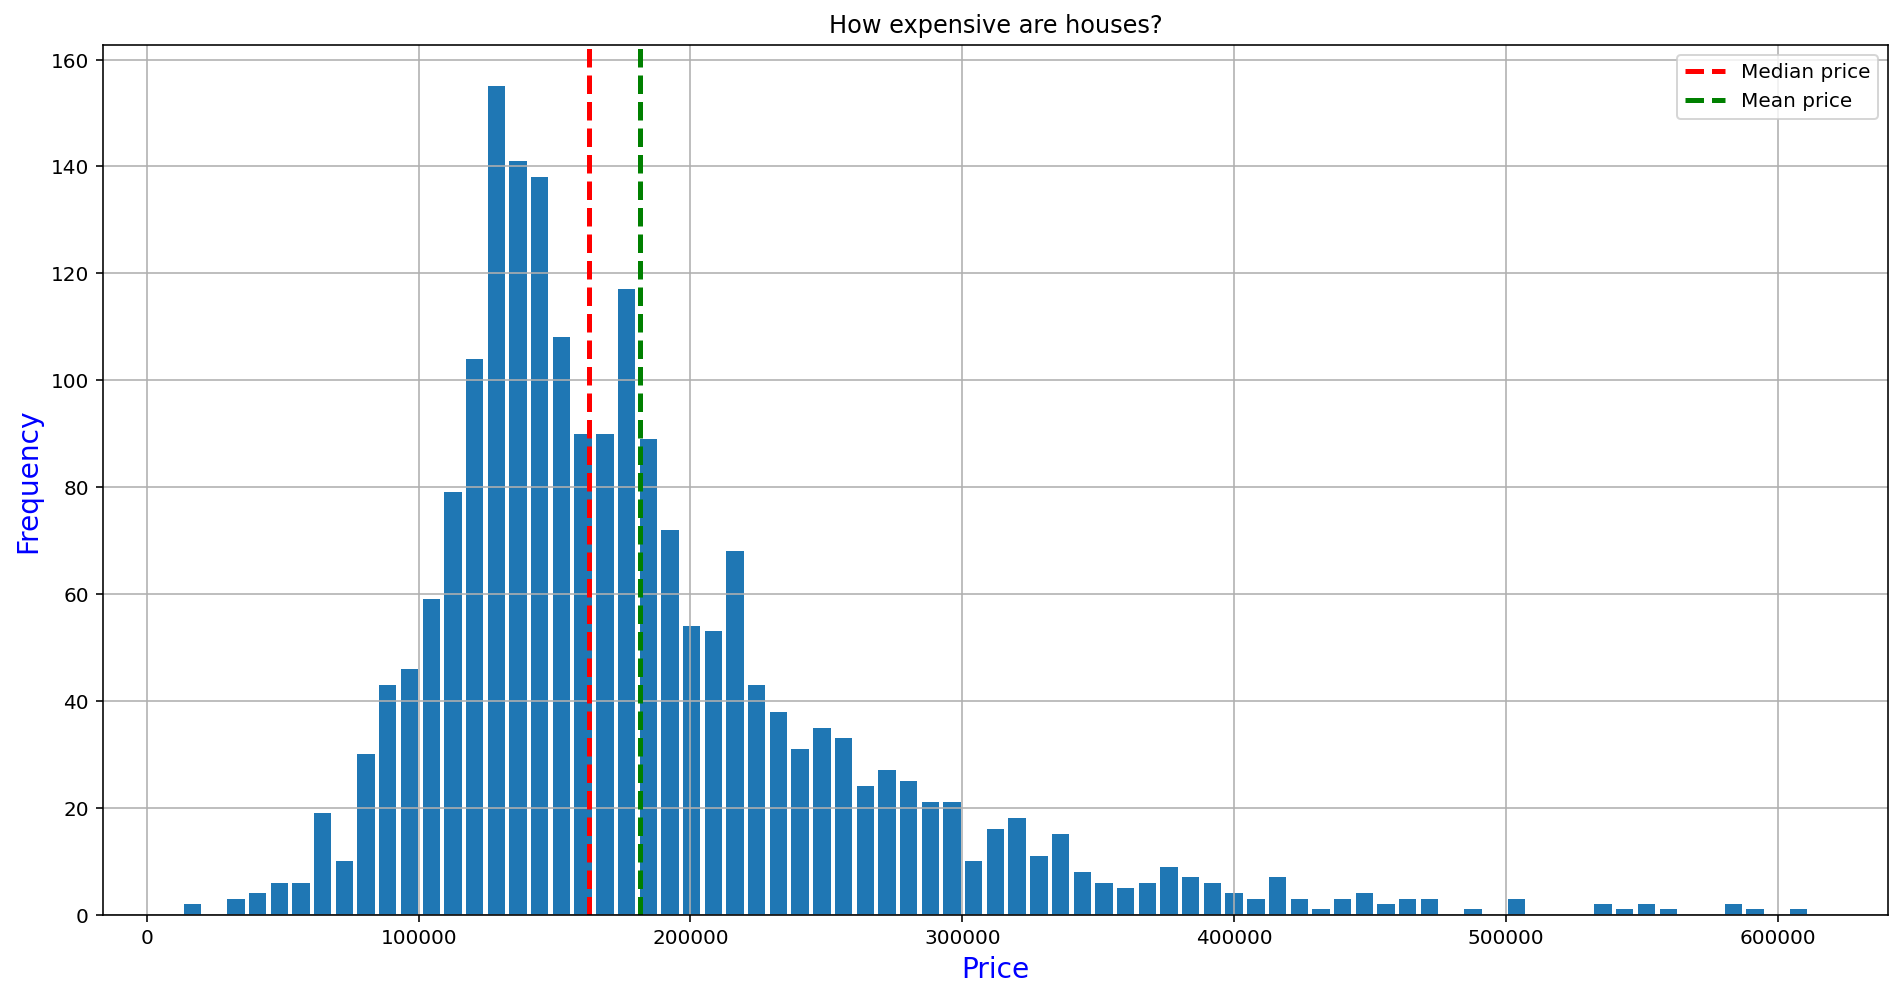

In [79]:

train_data.SalePrice.hist(bins=75, rwidth=.8, figsize=(16,8))
plt.axvline(x=train_data['SalePrice'].median(), linewidth=2.5, linestyle='dashed', color='r', label='Median price')
plt.axvline(x=train_data['SalePrice'].mean(), linewidth=2.5, linestyle='dashed', color='g', label='Mean price')

plt.title('How expensive are houses?')
plt.xlabel('Price', size=14, color='blue')
plt.ylabel('Frequency', size=14, color='blue')
plt.legend()
plt.show()

* We can see that the majority (<= 75%) of house price is between $\$130, 000\  to \ $\$214,000 
* The chepeast price is $\$12,789$, while the most expensive one is $\$611657

- The average price is around $\$180K$ and the median value is around $162K



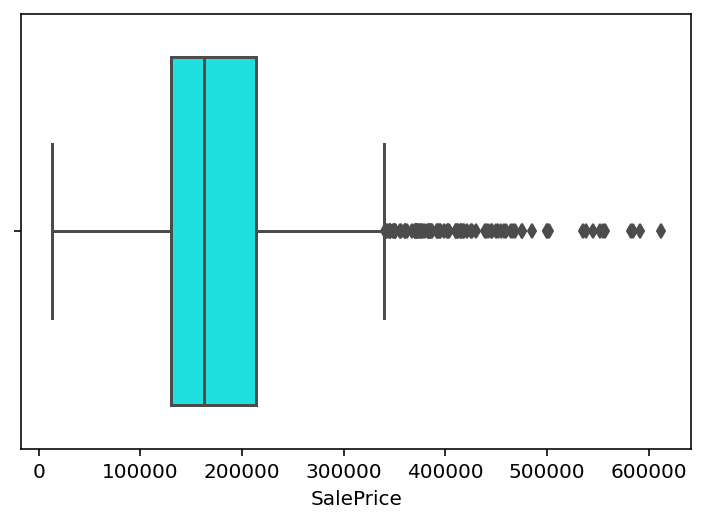

In [80]:
# Creating a boxplot for the target variable to get an idea of the distribution
sns.boxplot(data = train_data,
            x = 'SalePrice', 
            color='cyan'
           )
plt.show();

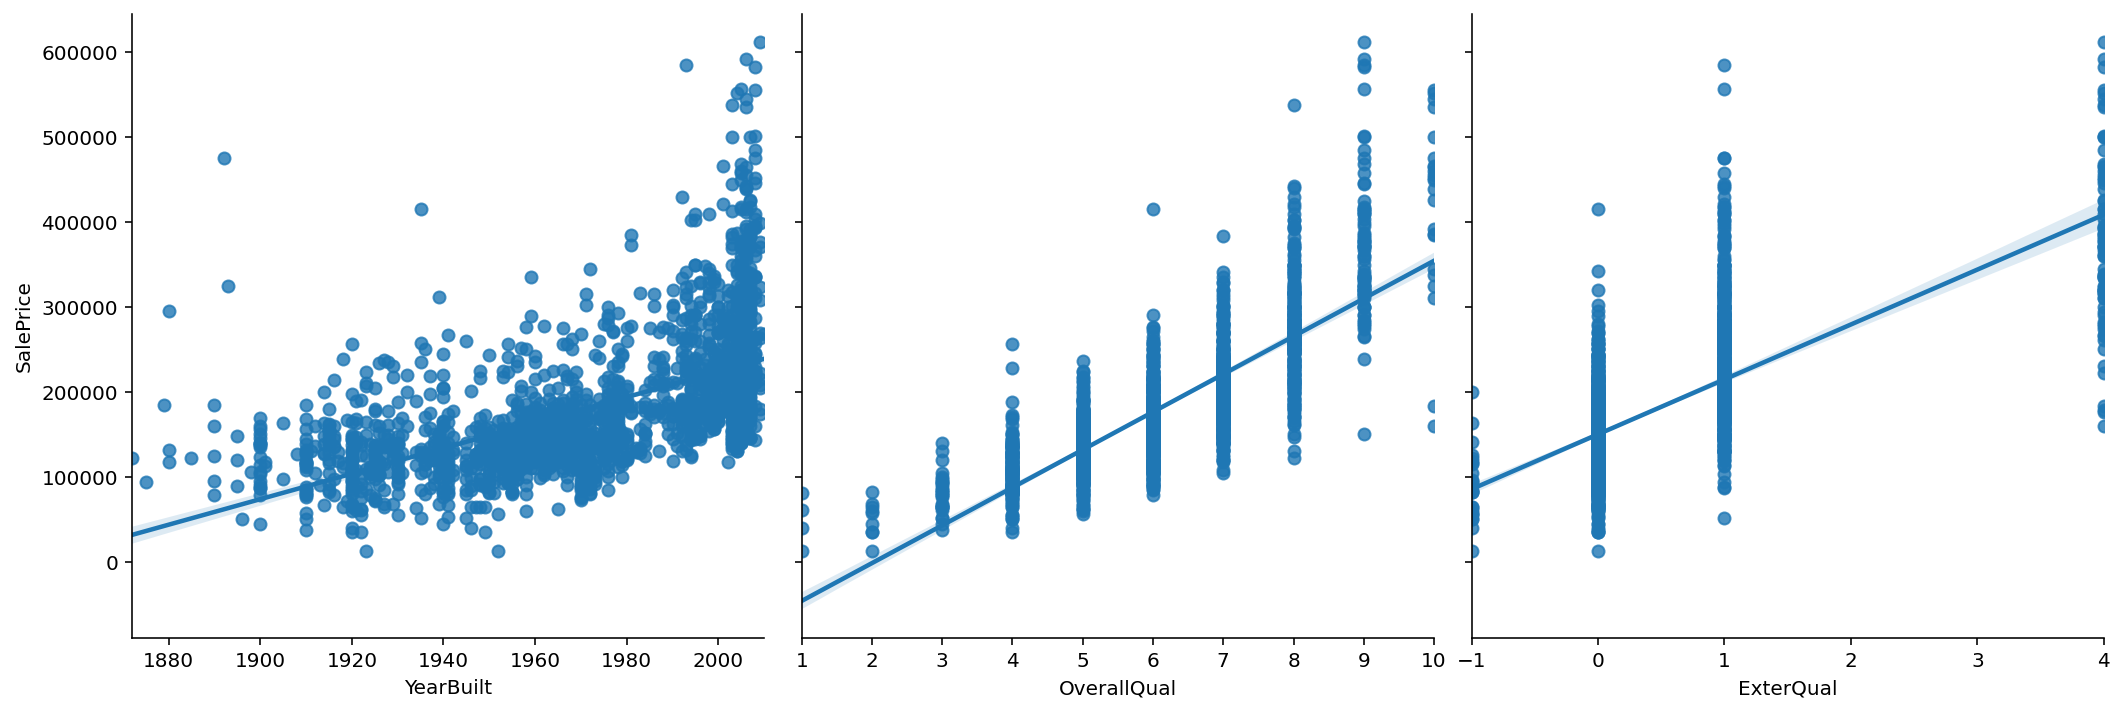

In [81]:
#Creating a pairplot with regression line for more visual aid
sns.pairplot(train_data, 
             x_vars=['YearBuilt', 'OverallQual', 'ExterQual'],
             y_vars=['SalePrice'],
             kind='reg',
             height=5,
             aspect=1);

## Correlation all numeric featuure with the target variable

In [82]:
#Finding the correlations of in numeric features
corr = train_data.corr()
print (corr['SalePrice'].sort_values(ascending=False))


SalePrice            1.000000
OverallQual          0.800975
ExterQual 2          0.712880
ExterQual            0.706620
GrLivArea            0.698046
                       ...   
RoofStyle_Gable     -0.249497
PID                 -0.255293
MSZoning_RM         -0.280768
Foundation_CBlock   -0.356187
GarageType_Detchd   -0.369449
Name: SalePrice, Length: 213, dtype: float64


In [83]:
# For more readability while visualizing using heatmap
heatMap_data = train_data.copy()

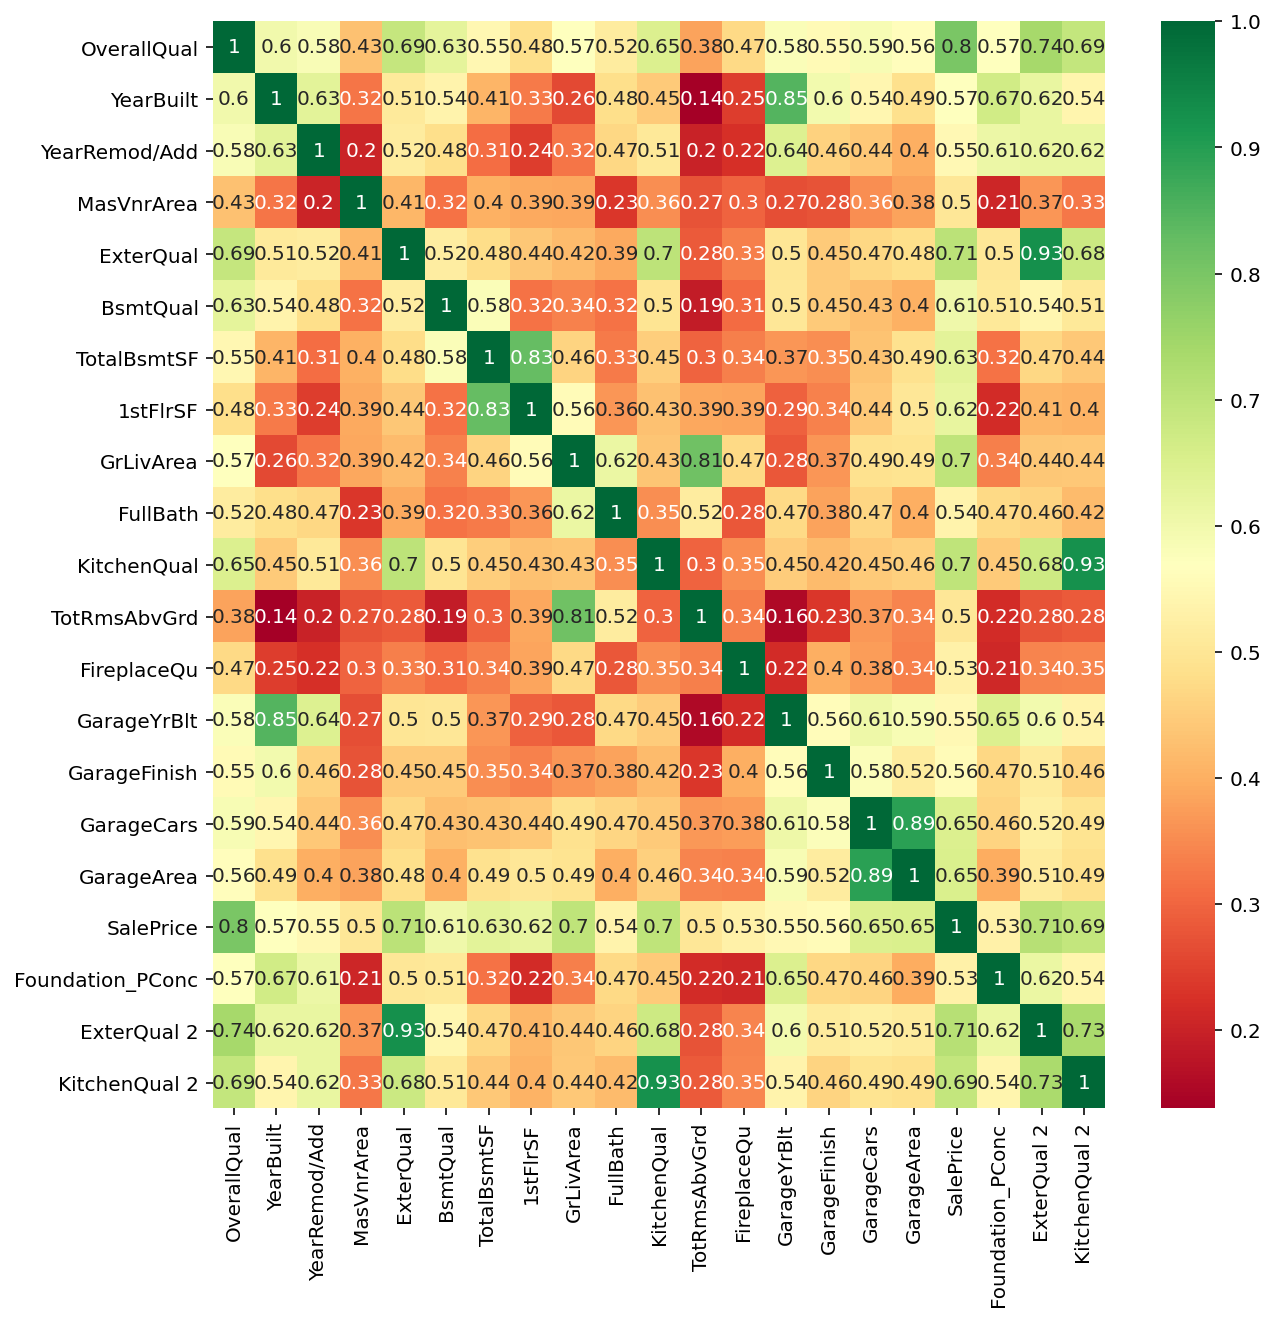

In [84]:
# Most correlated variables to clean outliers
corrmat = heatMap_data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(heatMap_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [85]:
# Rename columns to be more readable for heatmap
heatMap_data.rename(columns = {
    'MSSubClass':'Building Class',
    'MSZoning': 'Zoning Class',
    'Street' : 'Street Type',
    'LotConfig':'Lot Configuration',
    'Condition1': 'Proximity to Main Road or Railroad 1',
    'Condition2' : 'Proximity to Main Road or Railroad 2',
    'BldgType':'Building Type',
    'OverallQual': 'Overall Quality',
    'OverallCond': 'Overall Condition',
    'YearRemod/Add': 'Remodel Date',
    'RoofMatl': 'Roof Material',
    'Exterior1st':'Exterior Covering 1',
    'Exterior2nd': 'Exterior Covering 2',
    'MasVnrType': 'Masonry Veneer Type',
    'MasVnrArea': 'Masonry Veneer Area',
    'ExterQual': 'Exterior Material Quality',
    'ExterCond': 'Exterior Condition Quality',
    'BsmtQual':'Basement Quality',
    'BsmtCond': 'Basement Condition', 
    'BasmtExposure': 'Basement Exposure',
    'BsmtFinType1': 'Quality of Finished Basement 1',
    'BsmtFinType2': 'Quality of Finished Basement 2',
    'BsmtFinSF1': 'Square Feet of Finished Basement 1',
    'BsmtFinSF2': 'Square Feet of Finished Basement 2',
    'BsmtUnfSF': 'Square Feet of Unfinished Basement',
    'TotalBsmtSF': 'Total Basement Square Feet',
    'Heating': 'Heating Type',
    'HeatingQC': 'Heating Quality and Condition',
    '1stFlrSF': '1st Floor Square Feet',
    '2ndFlrSF': '2nd Floor Square Feet',
    'LowQualFinSF':'Low Quality Finished Square Feet',
    'GrLivArea': 'Above-Grade Living Area',
    'BsmtFullBath': 'Basement Full Bathrooms',
    'BsmtHalfBath': 'Basement Half Bathrooms',
    'FullBath': 'Full Bathrooms',
    'HalfBath': 'Half Bathrooms',
    'Bedroom': 'Bedrooms',
    'Kitchen':'Kitchens',
    'KitchenQual': 'Kitchen Quality', 
    'TotRmsAbvGrd': 'Total Rooms Above Grade',
    'Functional':'Functionality',
    'FireplaceQu': 'Fireplace Quality',
    'GarageYrBlt': "Year Garage Built",
    'GarageFinish': 'Interior Finish of Garage',
    'GarageCars': 'Size of Garage (Cars)',
    'GarageArea': 'Size of Garage (Square Feet)',
    'GarageQual':'Garage Quality',
    'GarageCond': 'Garage Condition',
    'PavedDrive': 'Extent of Driveway Pavement', 
    'WoodDeckSF': 'Wood Deck Square Feet',
    'OpenPorchSF': 'Open Porch Square Feet',
    'EnclosedPorch': 'Enclosed Porch Square Feet',
    '3SsnPorch': '3 Season Porch Square Feet', 
    'ScreenPorch': 'Screen Porch Square Feet',
    'PoolArea': 'Pool Area (Square Feet)',
    'PoolQC': 'Pool Quality',
    'Fence':'Fence Quality',
    'MiscFeature':'Miscellaneous Feature',
    'MiscVal': 'Value of Miscellaneous Feature',
    'MoSold': 'Month Sold',
    'YrSold': 'Year Sold',
    'SalePrice': 'Sale Price'
}, inplace = True);

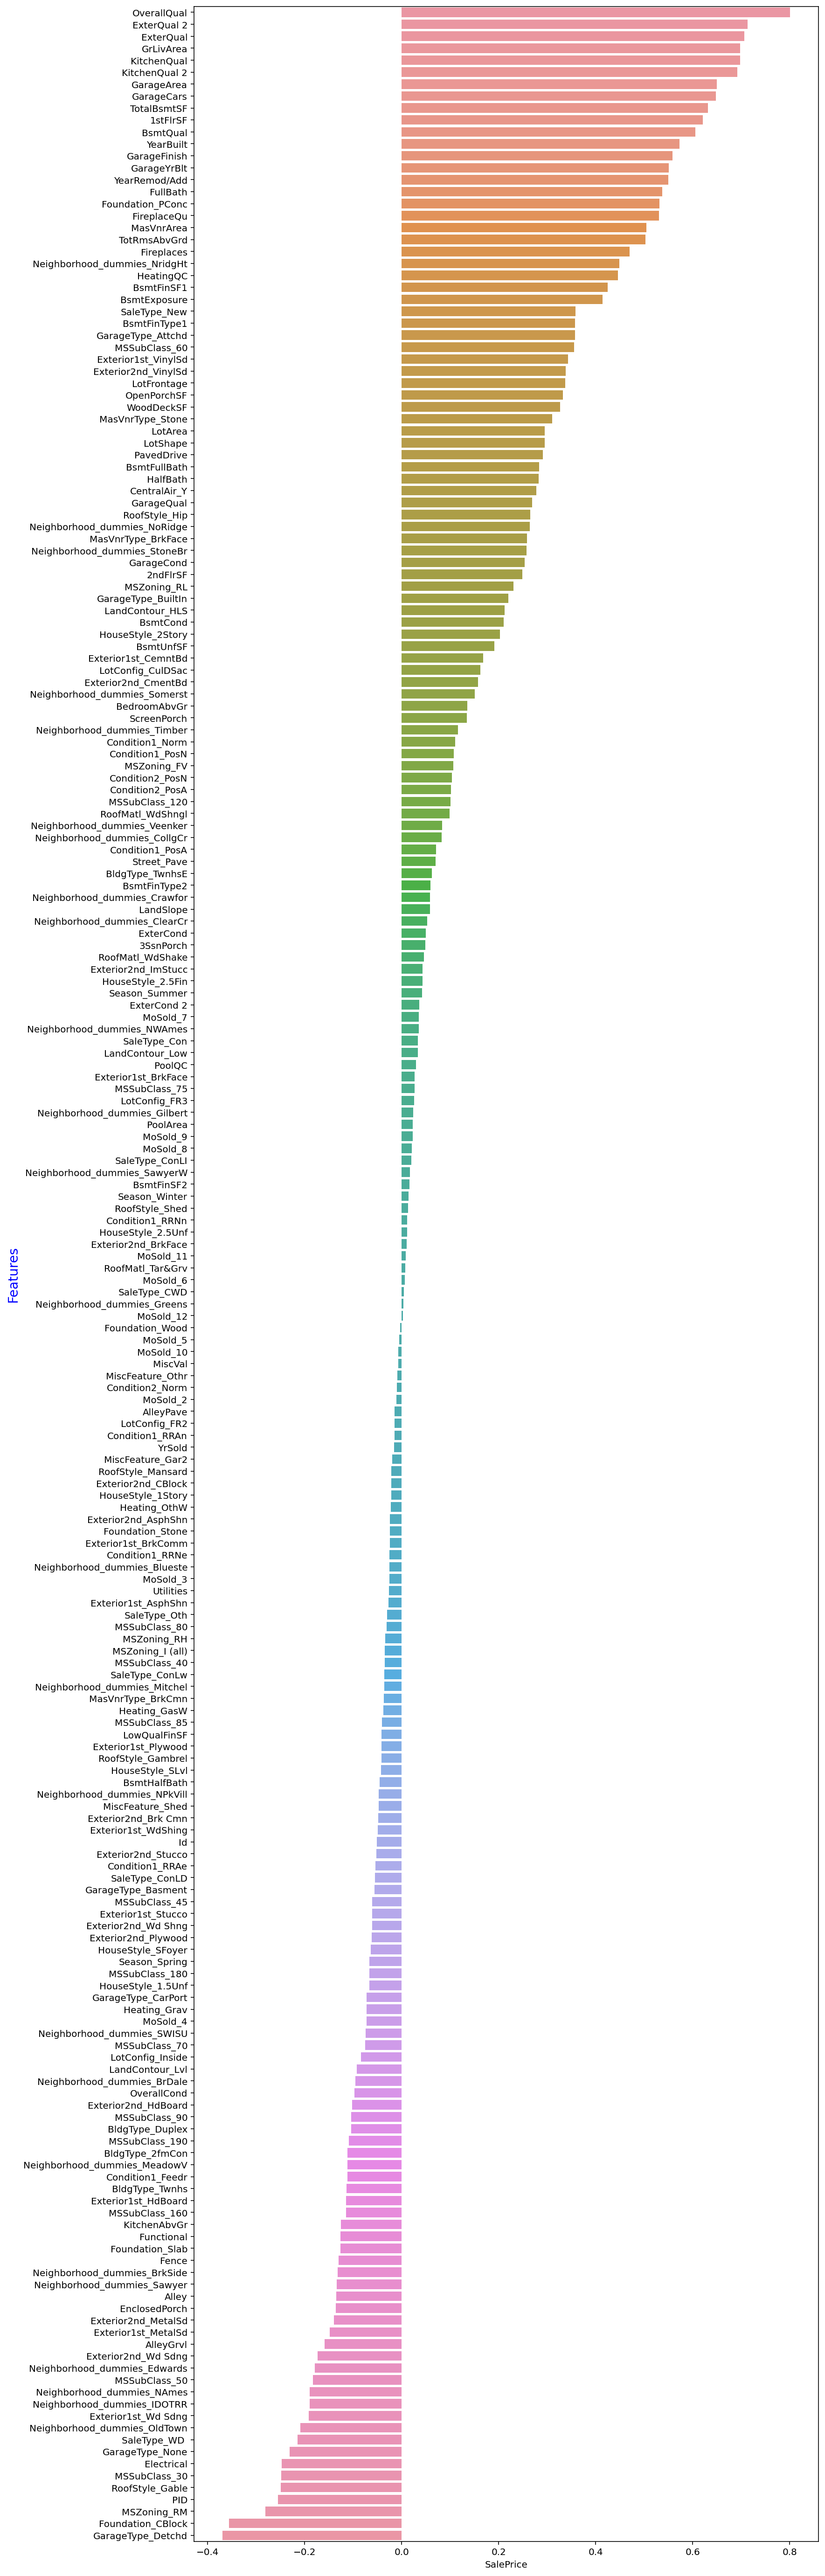

In [86]:
# Feature sorted by correlation to SalePrice, from positive to negative
figure = plt.figure(figsize=(12,50))

corr = corrmat.sort_values('SalePrice', ascending=False)
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.ylabel('Features', size=14, color='blue')
#plt.savefig('./images/SalePriceCorrelationPreview.png')
plt.show();

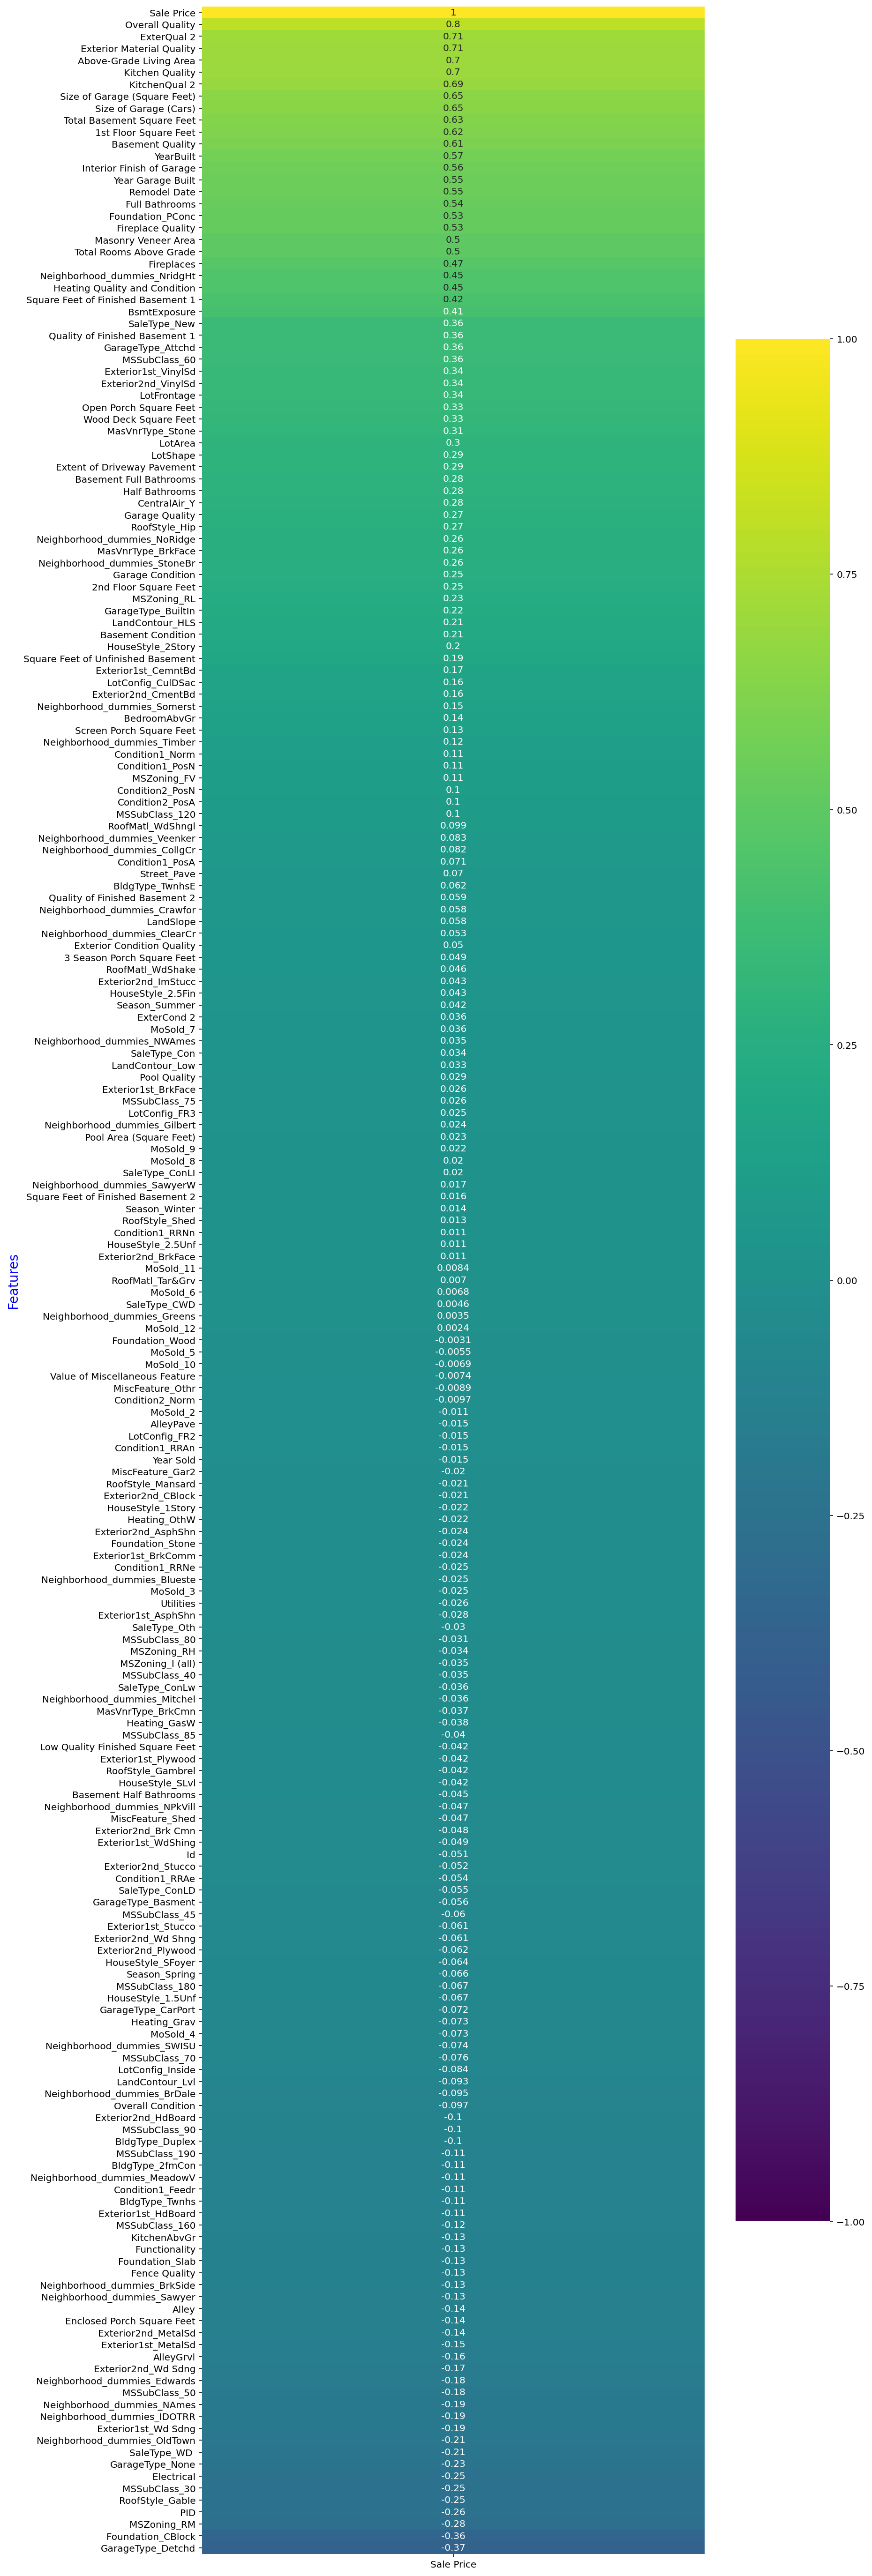

In [87]:
# Heatmap and Correlations for Target
figure = plt.figure(figsize=(12,50))
sns.heatmap(heatMap_data.corr()[['Sale Price']].sort_values('Sale Price',ascending=False),annot=True, vmin = -1, vmax = 1, cmap='viridis', center=0)
plt.ylabel('Features', size=14, color='blue')
plt.savefig('./images/AllFeature_SalePrice_Correlation.png')
plt.show();

* We now can clearly see that the features top most corrolated with **SalePrice** are, respectively: OverallQual,ExterQual 2, ExterQual, and GrLivArea, ... etc 

In [88]:
# Correlation of Garage Area with Sale Price (Training Data Only)
train_data.corr()['GarageArea']['SalePrice']

0.6500003061735466

In [89]:
# Correlation of Garage Cars with Sale Price (Training Data Only)
train_data.corr()['GarageCars']['SalePrice']

0.6481029335350884

In [90]:
# Correlation between Garage Area and Garage Cars
train_data.corr()['GarageArea']['GarageCars']

0.8931608528285983

In [91]:
#Saves processed training data
train_data.to_csv('./CleanData/train_data_final.csv', index=False)

Because the area of the garage and the number of cars that a garage can fit are highly correlated, I will create an interaction feature to account for this relationship.

In [92]:
train_data['garage_area_car_int'] = train_data['GarageArea'] * train_data['GarageCars']

Because the interaction feature is more highly correlated than either of the other features, we will also add this feature to our full dataset.

### Applying Changes to Test Data
Any processing changes that we make to training data need to be mirrored on test data before generating predictions. The code below accomplishes that.

In [93]:
test_data.shape

(878, 80)

In [94]:
test_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [95]:
#This code defines a function that can be edited as necessary, 
#that applies all data processing changes to new test data.

def changes_to_dataframe(data):
    data['Neighborhood_dummies'] = data['Neighborhood']
    
    data = pd.get_dummies(data, columns=['MS SubClass',
                                     'MS Zoning',
                                     'Street',
                                     'Land Contour',
                                     'Condition 1',
                                     'Condition 2',
                                     'House Style',
                                     'Lot Config',
                                     'Bldg Type',
                                     'Neighborhood_dummies',
                                     'Roof Style',
                                     'Roof Matl',
                                     'Exterior 1st',
                                     'Exterior 2nd', 
                                     'Foundation', 
                                     'Heating', 
                                     'Central Air',
                                     'Sale Type'], 
                      drop_first=True)
    
    for i in data[data['BsmtFin SF 1'].isnull()==True].loc[:,'Id']:
        data = data[data['Id']!=i]
    for i in data[data['Garage Area'].isnull()==True].loc[:,'Id']:
        data = data[data['Id']!=i]
    for i in data[data['Bsmt Full Bath'].isnull()==True].loc[:,'Id']:
        data = data[data['Id']!=i]
       
    seasons = {'Spring':[3,4,5],'Summer':[6,7,8],'Fall':[9,10,11],'Winter':[12,1,2]}
    data['Season'] = data['Mo Sold'].map(lambda x: [i for i in seasons if x in seasons[i]][0])
    data = pd.get_dummies(data, columns=['Season'],drop_first=True)
    data = pd.get_dummies(data, columns=['Mo Sold'], drop_first=True)
    data['Lot Shape'] = data['Lot Shape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
    data['Utilities'] = data['Utilities'].map({'AllPub':0,'NoSewr':1,'NoSeWa':2,'ELO':3})
    data['Land Slope'] = data['Land Slope'].map({'Gtl':0,'Mod':1,'Sev':2})
    for i in ['Exter Qual','Exter Cond','Kitchen Qual']:
        data[i] = data[i].map({'Ex':4,'Gd':1,'TA':0,'Fa':-1,'Po':-4})
    data['Heating QC'] = data['Heating QC'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-2,'Po':-4})
    for i in ['Exter Qual','Exter Cond','Kitchen Qual']:
        data[i+' 2'] = data[i].map({4:2,1:1,0:0,-1:-1,-4:-2})
    data['Electrical'] = data['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2, 'FuseP':3, 'Mix':1.5})
    data['Functional'] = data['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})
    data['Paved Drive'] = data['Paved Drive'].map({'N':0,'P':1,'Y':2})
    data['Garage Type'] = data['Garage Type'].fillna('None')
    data['Garage Finish'] = data['Garage Finish'].fillna('None')
    data['Garage Qual'] = data['Garage Qual'].fillna('None')
    data['Garage Cond'] = data['Garage Cond'].fillna('None')
    data = pd.get_dummies(data, columns=['Garage Type'], drop_first=True)
    data['Garage Finish'] = data['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
    data['Garage Qual'] = data['Garage Qual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
    data['Garage Cond'] = data['Garage Cond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
    data['Garage Yr Blt'] = data['Garage Yr Blt'].fillna(data['Year Built'])
    for i in ['Bsmt Exposure','Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2']:
        data[i] = data[i].fillna('None')
    data['Bsmt Qual'] = data['Bsmt Qual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
    data['Bsmt Cond'] = data['Bsmt Cond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
    data['BsmtFin Type 1'] = data['BsmtFin Type 1'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})
    data['BsmtFin Type 2'] = data['BsmtFin Type 2'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})
    data['Bsmt Exposure'] = data['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
    data['Fireplace Qu'] = data['Fireplace Qu'].fillna('None')
    data['Fireplace Qu'] = data['Fireplace Qu'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
    data['Pool QC'] = data['Pool QC'].fillna('None')
    data['Pool QC'] = data['Pool QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'None':0})
    data['Fence'] = data['Fence'].fillna('None')
    data['Fence'] = data['Fence'].map({'GdPrv':3,'GdWo':2,'MnPrv':1,'MnWw':1,'None':0})
    data['Alley'] = data['Alley'].fillna(0)
    data['Alley Grvl'] = data['Alley'].map(lambda x: 1 if x=='Grvl' else 0)
    data['Alley Pave'] = data['Alley'].map(lambda x: 1 if x=='Pave' else 0)
    data['Alley'] = data['Alley'].map(lambda x: 1 if x!=0 else 0)
    data = pd.get_dummies(data, columns=['Misc Feature'])
    data['Mas Vnr Type'] = data['Mas Vnr Type'].fillna('None')
    data = pd.get_dummies(data, columns=['Mas Vnr Type'])
    data.drop('Mas Vnr Type_None',axis=1,inplace=True)
    data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(0)
    
    neighborhood_means = data.groupby('Neighborhood')['Lot Frontage'].mean()
    neighborhood_means = neighborhood_means.fillna(np.mean(neighborhood_means))
    data['Lot Frontage'] = data['Lot Frontage'].fillna(data['Neighborhood'])
    data['Lot Frontage'] = data['Lot Frontage'].map(lambda x: neighborhood_means[x] if type(x)==str else x)
    data.drop('Neighborhood',axis=1,inplace=True)  
    
    data.drop('Exterior 1st_PreCast',axis=1,inplace=True)
    data.drop('Exterior 2nd_Other',axis=1,inplace=True)
    data.drop('Exterior 2nd_PreCast',axis=1,inplace=True)
    data.drop('Sale Type_VWD',axis=1,inplace=True)
    data.drop('Mas Vnr Type_CBlock',axis=1,inplace=True)
    
    data['Electrical'] = data['Electrical'].fillna(0)

    return data

In [96]:
#Applies changes to test set
test_data = changes_to_dataframe(test_data)
#Checks for null values
test_data.isnull().sum().sum()

0

In [97]:
test_data.columns

Index(['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Alley', 'Lot Shape',
       'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond',
       ...
       'Garage Type_Detchd', 'Garage Type_None', 'Alley Grvl', 'Alley Pave',
       'Misc Feature_Gar2', 'Misc Feature_Othr', 'Misc Feature_Shed',
       'Mas Vnr Type_BrkCmn', 'Mas Vnr Type_BrkFace', 'Mas Vnr Type_Stone'],
      dtype='object', length=213)

In [98]:
test_data.columns = test_data.columns.str.replace(' ', '')


In [99]:
test_data.columns

Index(['Id', 'PID', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond',
       ...
       'GarageType_Detchd', 'GarageType_None', 'AlleyGrvl', 'AlleyPave',
       'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_Stone'],
      dtype='object', length=213)

In [100]:
test_data.shape

(878, 213)

In [101]:
# In case if I need to submit the test dataset, too
#Saves processed training data
test_data.to_csv('./CleanData/test_data_final.csv', index=False)

## Visualization of the Strongly correlated variables



#### Let's review the destribution of our target variable

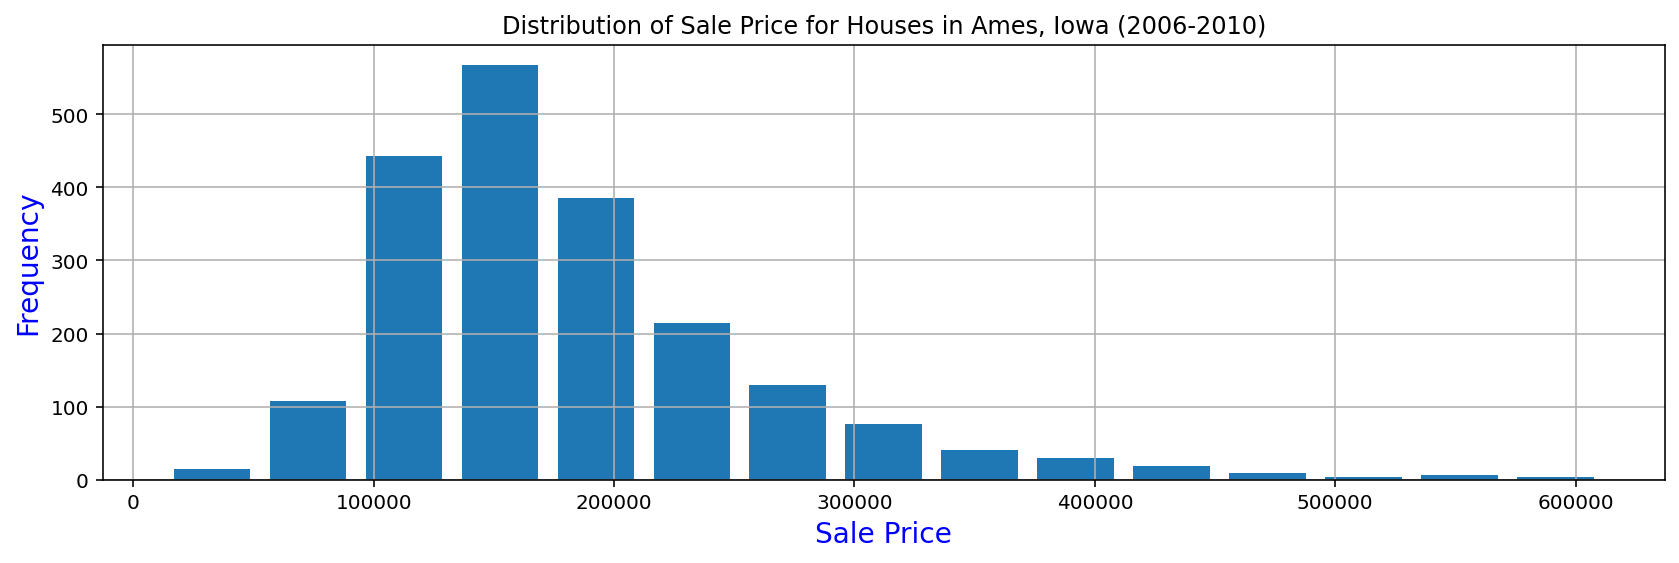

In [102]:
# target variable viz.

train_data.SalePrice.hist(bins=15, rwidth=.8, figsize=(14,4))
plt.title('Distribution of Sale Price for Houses in Ames, Iowa (2006-2010)')
plt.xlabel('Sale Price', size=14, color='blue')
plt.ylabel('Frequency', size=14, color='blue')
plt.show()

* The distribution for the target is not normally distributed. It has a right skew. When creating my linear regression model, I might want to consider logging y.



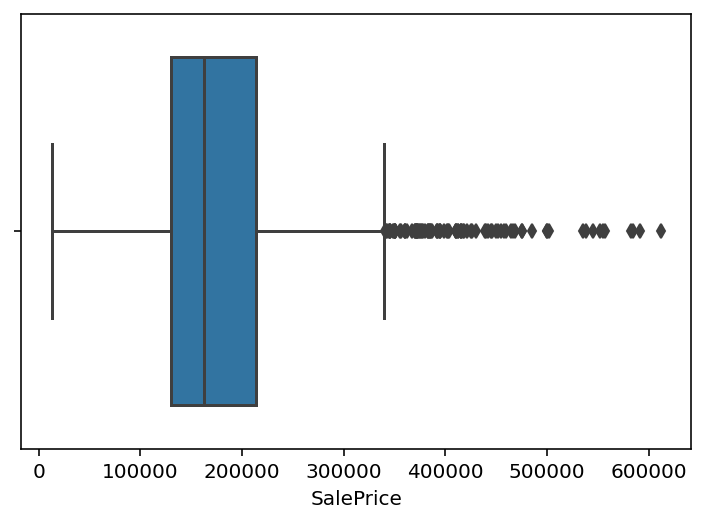

In [103]:
# Creating a boxplot for the target variable to get an idea of the distribution
sns.boxplot(train_data.SalePrice);

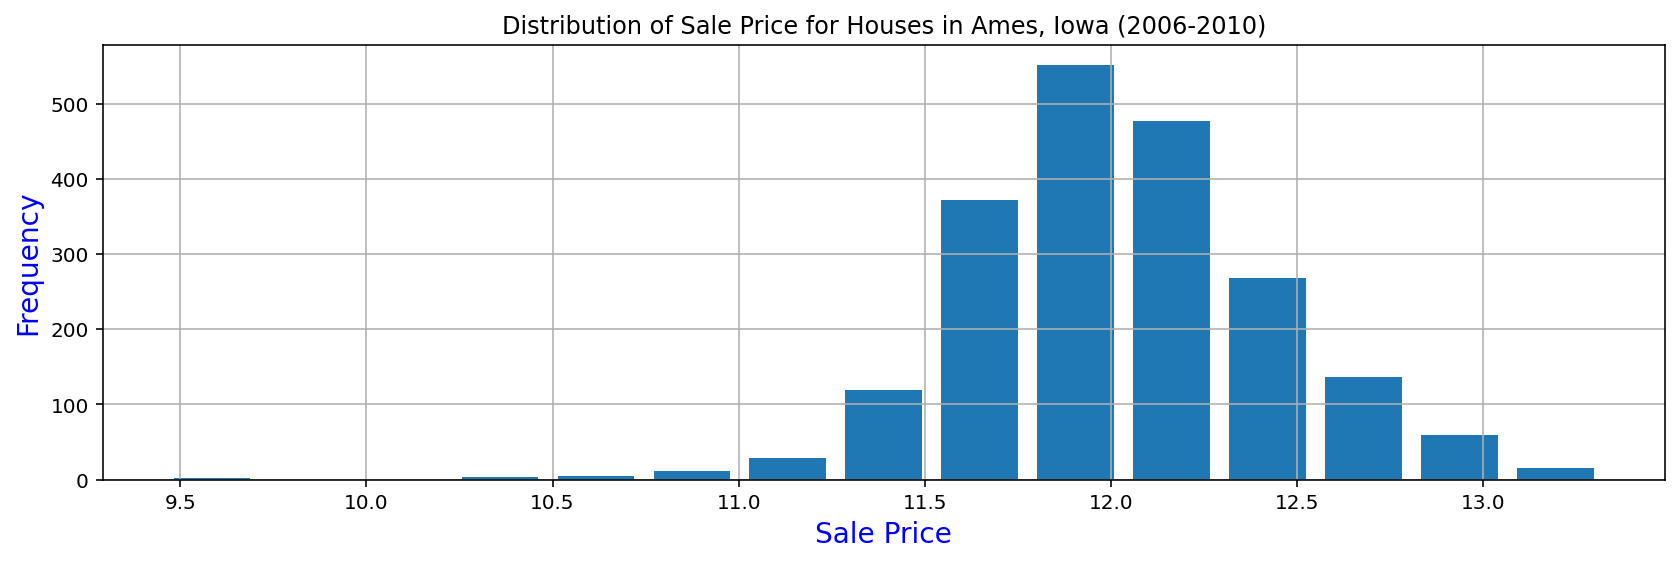

In [104]:
# log-transforming the target variable to make it better normally distributed

np.log(train_data['SalePrice']).hist(bins=15, rwidth=.8, figsize=(14,4))
plt.title('Distribution of Sale Price for Houses in Ames, Iowa (2006-2010)')
plt.xlabel('Sale Price', size=14, color='blue')
plt.ylabel('Frequency', size=14, color='blue')
plt.show()

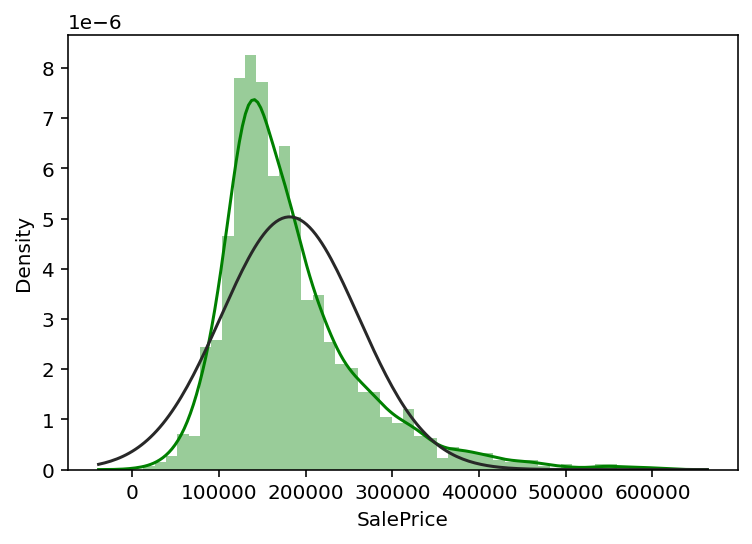

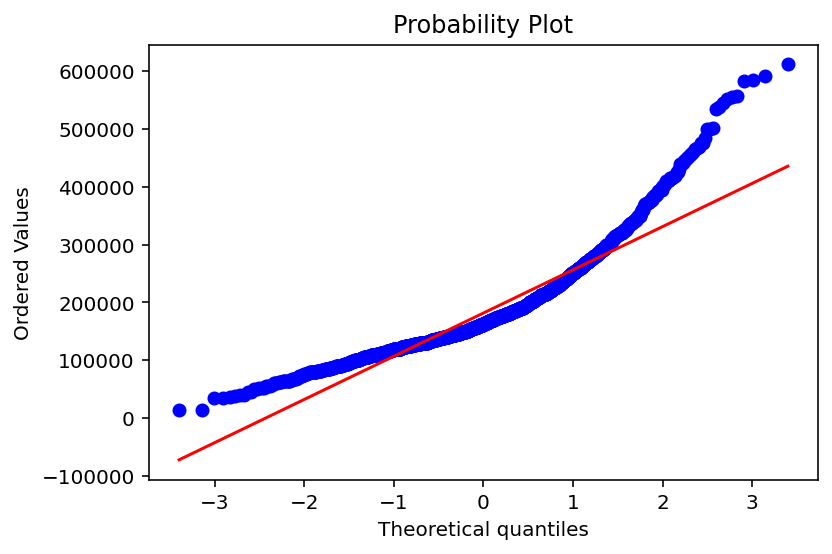

In [105]:
# Review for skewness

from scipy.stats import norm
sns.distplot(train_data['SalePrice'], fit = norm, color='green')
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'],plot = plt)


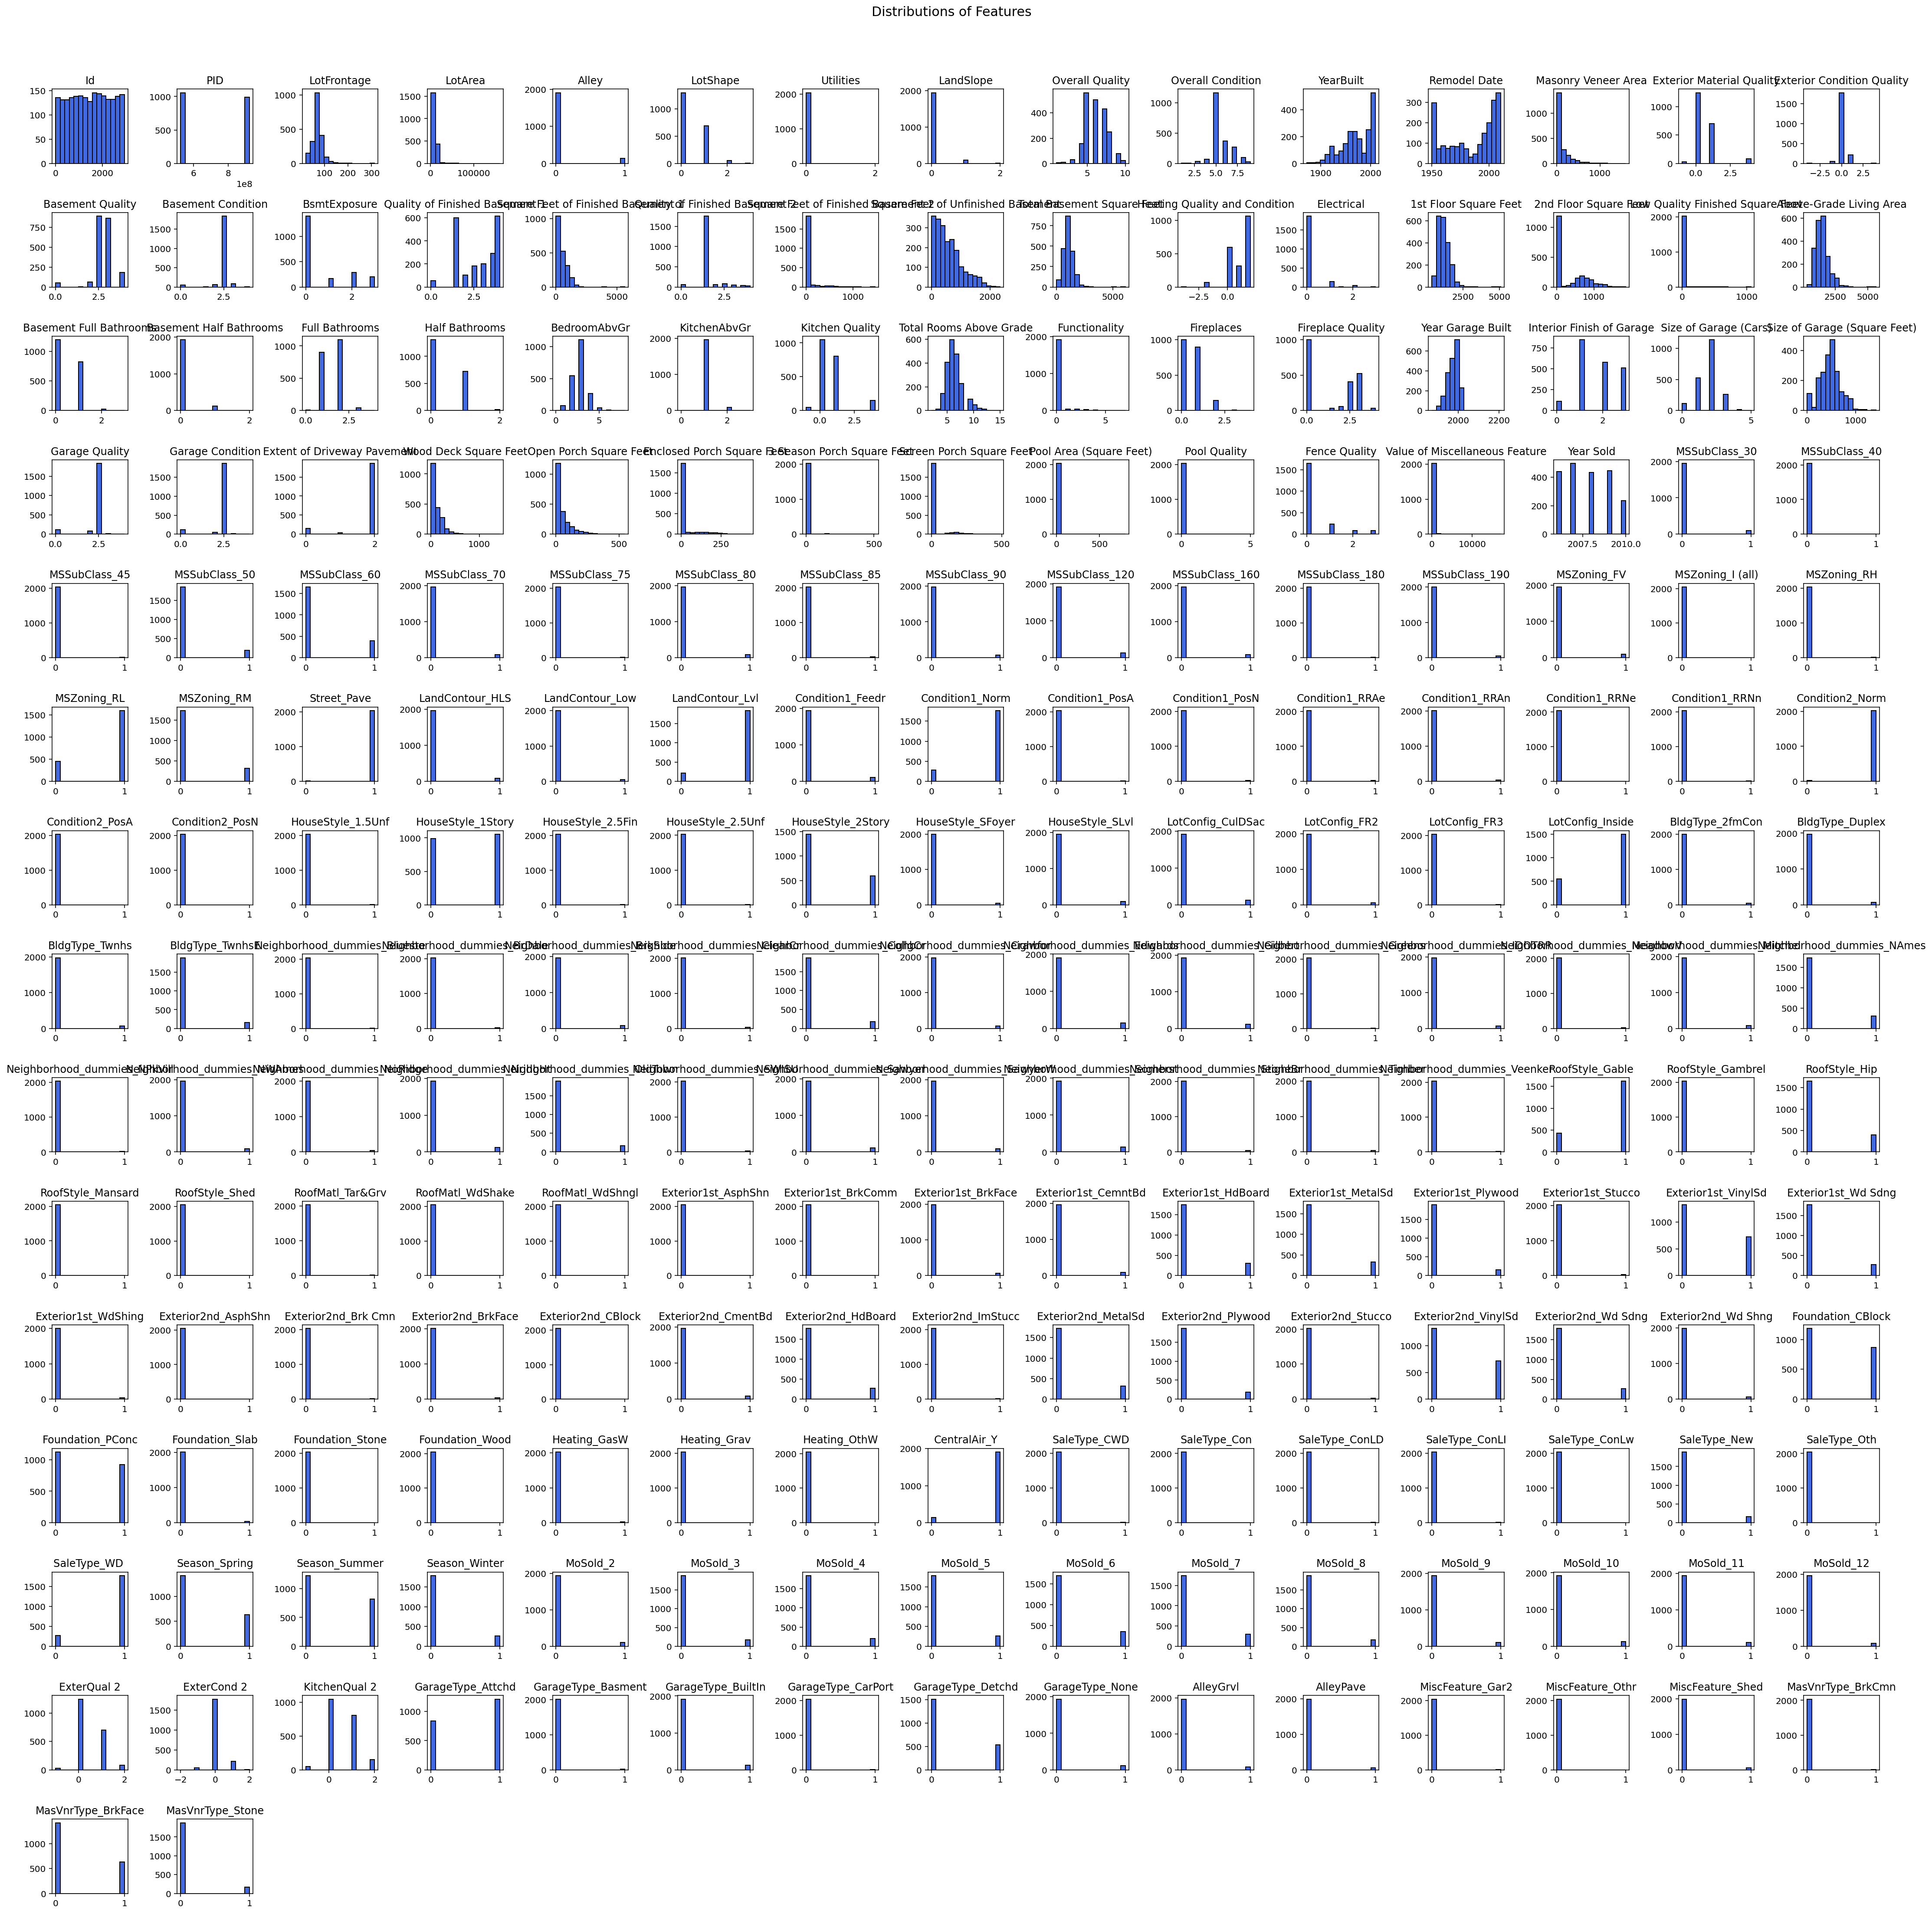

In [106]:
# Whole features of the train dataset visualization for top leve preview of distributions

heatMap_data.drop(columns='Sale Price').hist(figsize=(30, 30), bins = 15, edgecolor = 'black', grid = False, color = 'royalblue')
plt.suptitle('Distributions of Features', x = 0.5, y = 1.02, size = 15)
plt.tight_layout();



For more closer view, let's view **Overall Quality** variable

Overall Quality has the highest correlation with SalePrice among the numeric variables (0.8). It rates the overall material and finish of the house on a scale from 1 (very poor) to 10 (excellent).

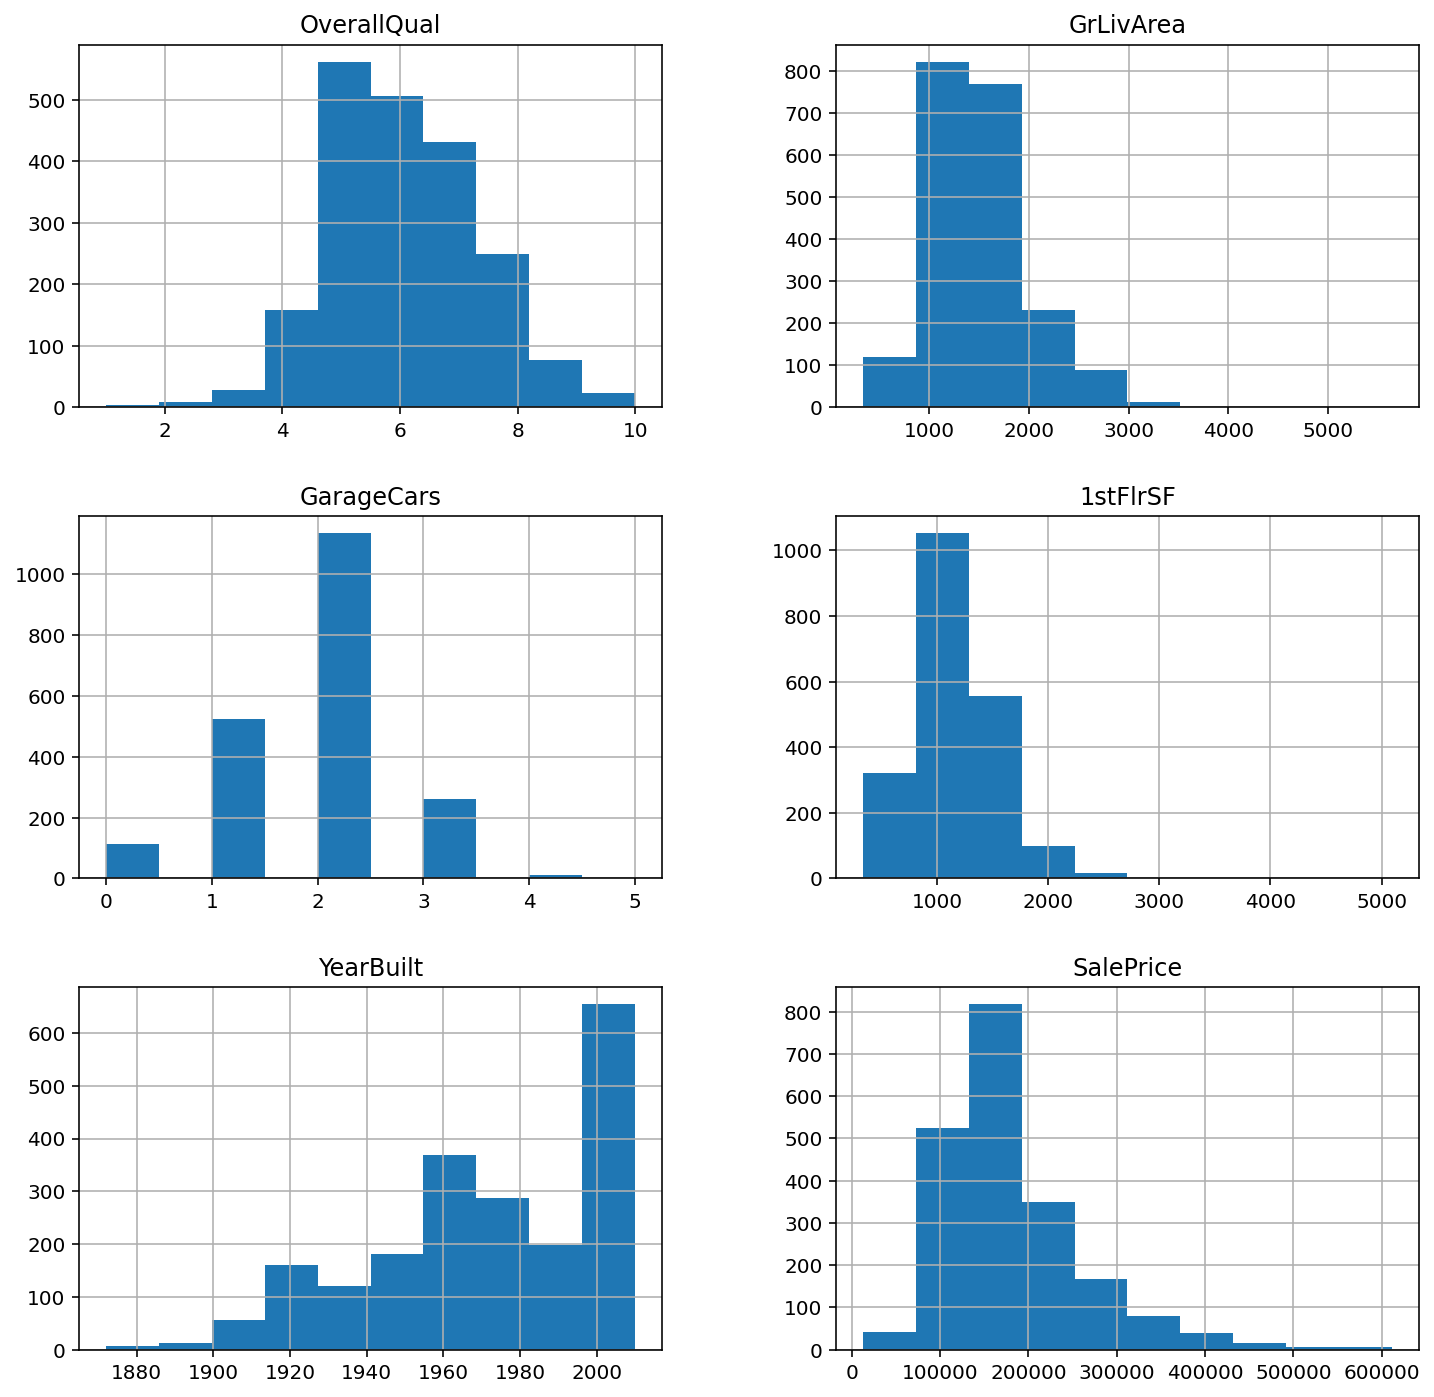

In [107]:
#Creating histograms for more visual aid
train_data.hist(figsize=(12, 12), column=['OverallQual',
                            'GrLivArea', 
                            'GarageCars', 
                            '1stFlrSF', 
                            'YearBuilt',
                            'SalePrice']);

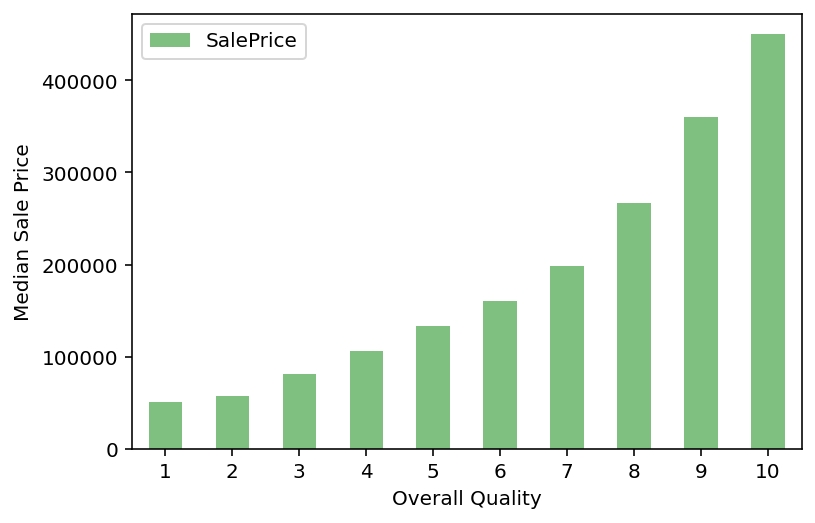

In [108]:
# Compare 'SalePrice' and Overall Quality
quality_pivot = train_data.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='green', alpha = 0.5)
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

- From the graph above the Median SalePrice increases uniformly increases as Overall Quality increases.




Below are some other interesting findings between our target variable and other independent variables

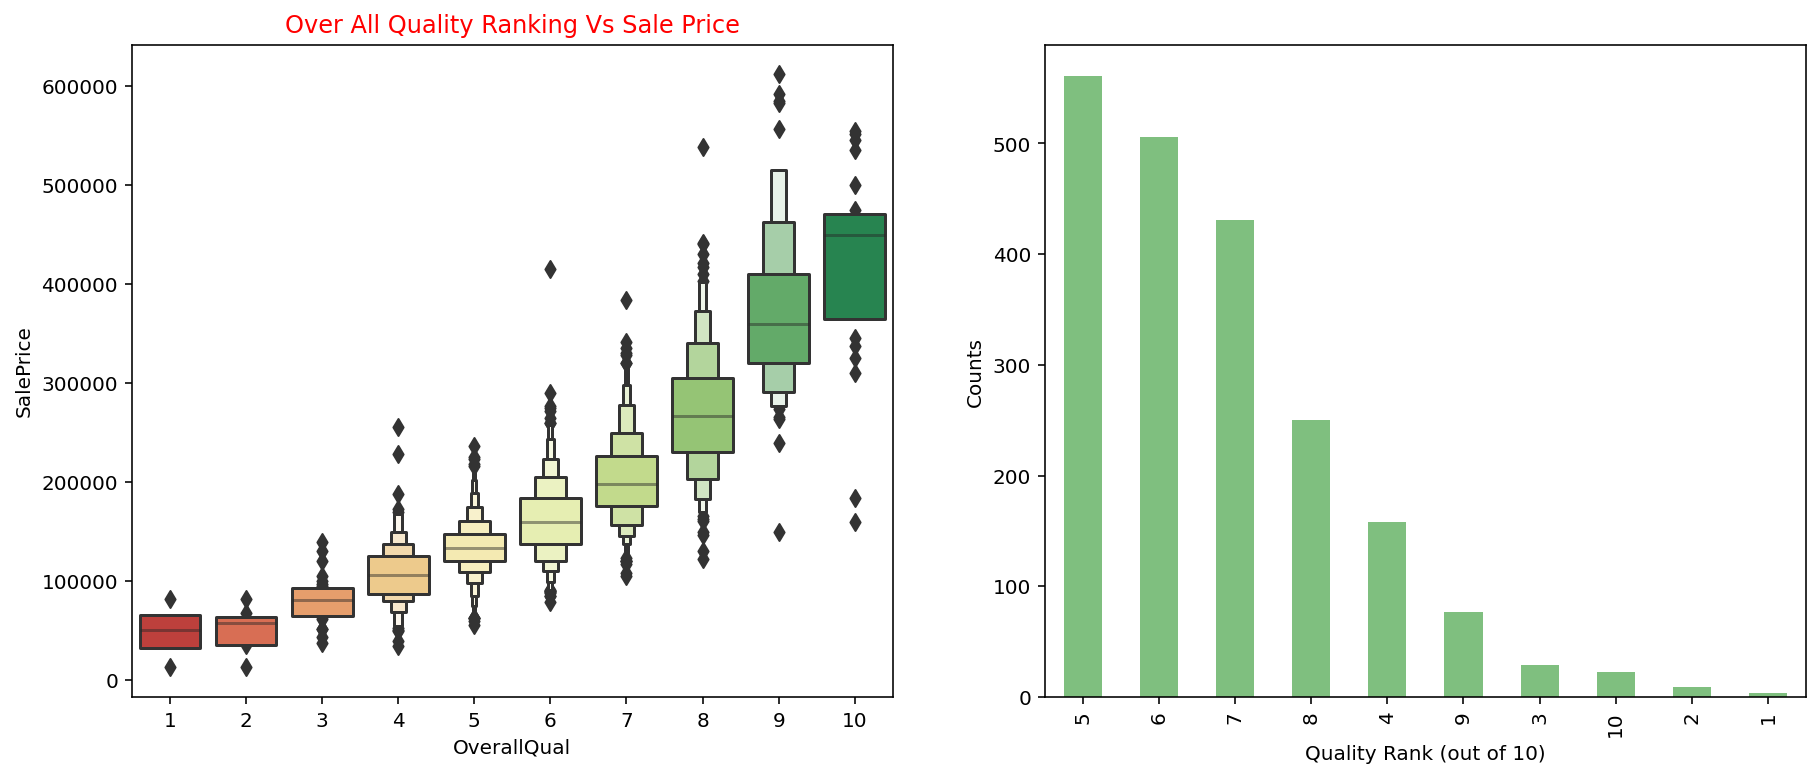

In [109]:
# SalePrice vs OverallQual - Graph on right shows most sought after houses are quality of 5
plt.figure(figsize= (15,6))
plt.subplot(121)
sns.boxenplot(train_data['OverallQual'], train_data['SalePrice'],palette="RdYlGn")
plt.title('Over All Quality Ranking Vs Sale Price', color='r')

plt.subplot(122)
train_data['OverallQual'].value_counts().plot(kind="bar",color = 'green', alpha = 0.5)
plt.xlabel('Quality Rank (out of 10)')
plt.ylabel('Counts');

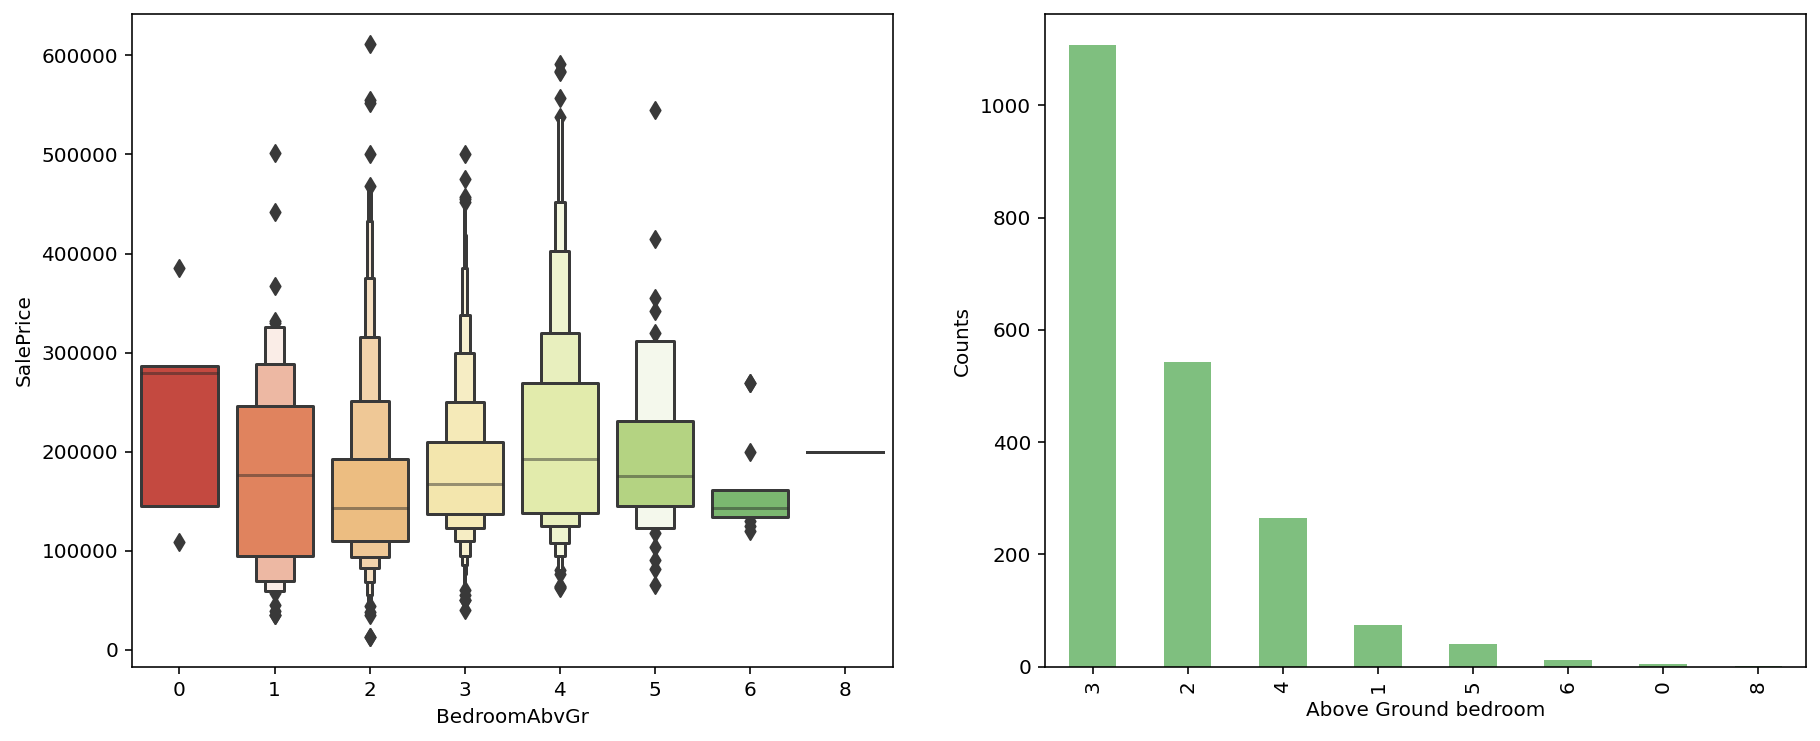

In [110]:
# Houses with 6 rooms above ground are most in demand - SalePrice is also competitive mostly cheaper than 5 rooms
plt.figure(figsize= (15,6))
plt.subplot(121)
sns.boxenplot(train_data['BedroomAbvGr'], train_data['SalePrice'], palette="RdYlGn")
plt.subplot(122)
train_data['BedroomAbvGr'].value_counts().plot(kind="bar",color = 'green', alpha = 0.5)
plt.xlabel('Above Ground bedroom')
plt.ylabel('Counts');

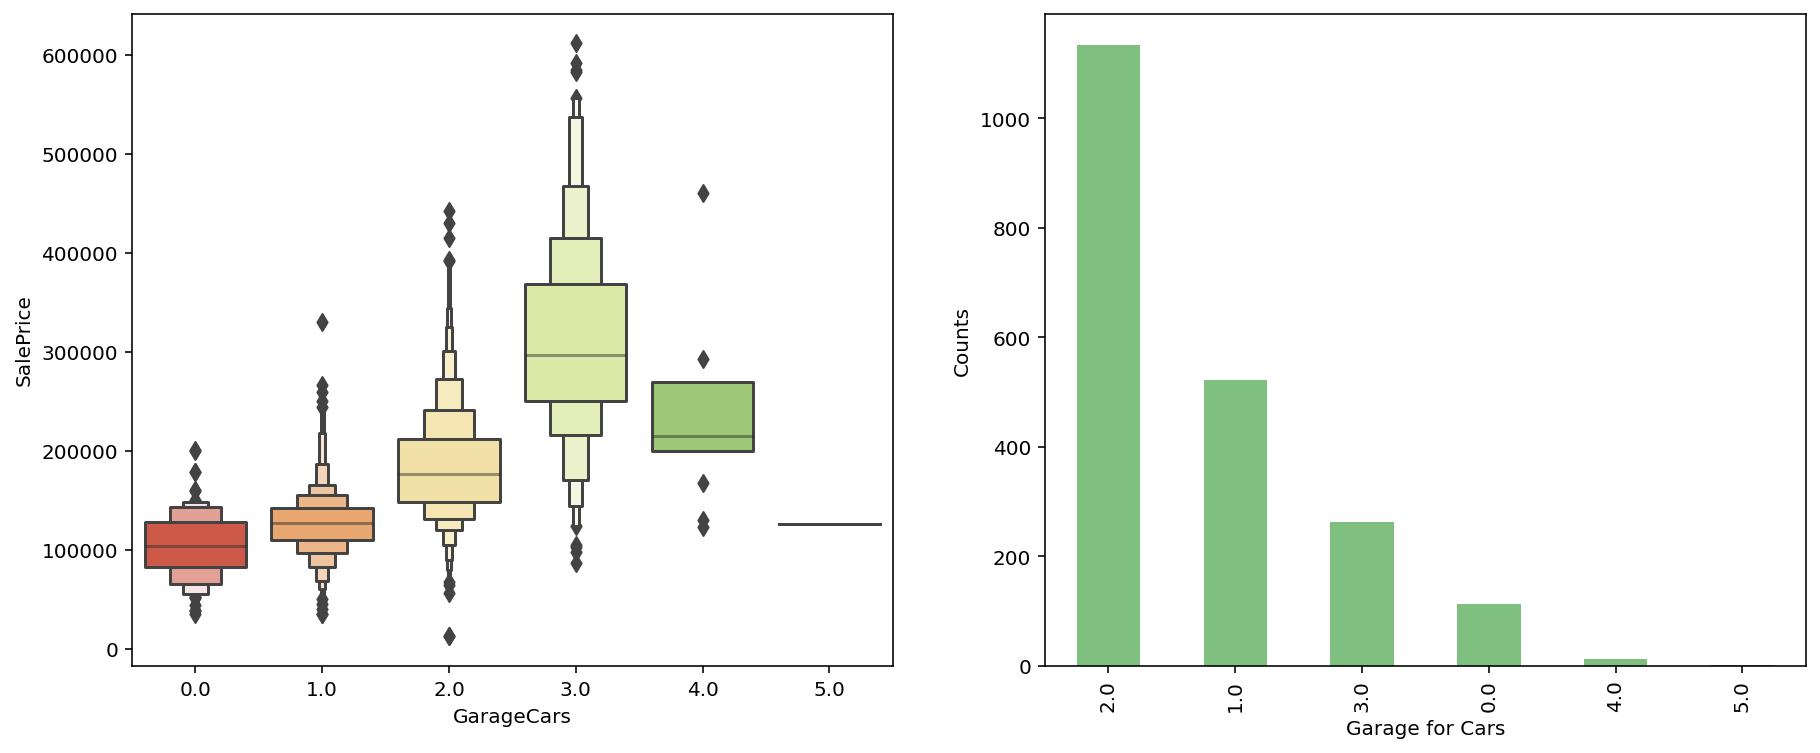

In [111]:
# Two garage houses are the most prevalent, interestingly four garages SalePrice drops considerably
plt.figure(figsize= (15,6))
plt.subplot(121)
sns.boxenplot(train_data['GarageCars'], train_data['SalePrice'],palette="RdYlGn")
plt.subplot(122)
train_data['GarageCars'].value_counts().plot(kind="bar",color = 'green', alpha = 0.5)
plt.xlabel('Garage for Cars')
plt.ylabel('Counts');

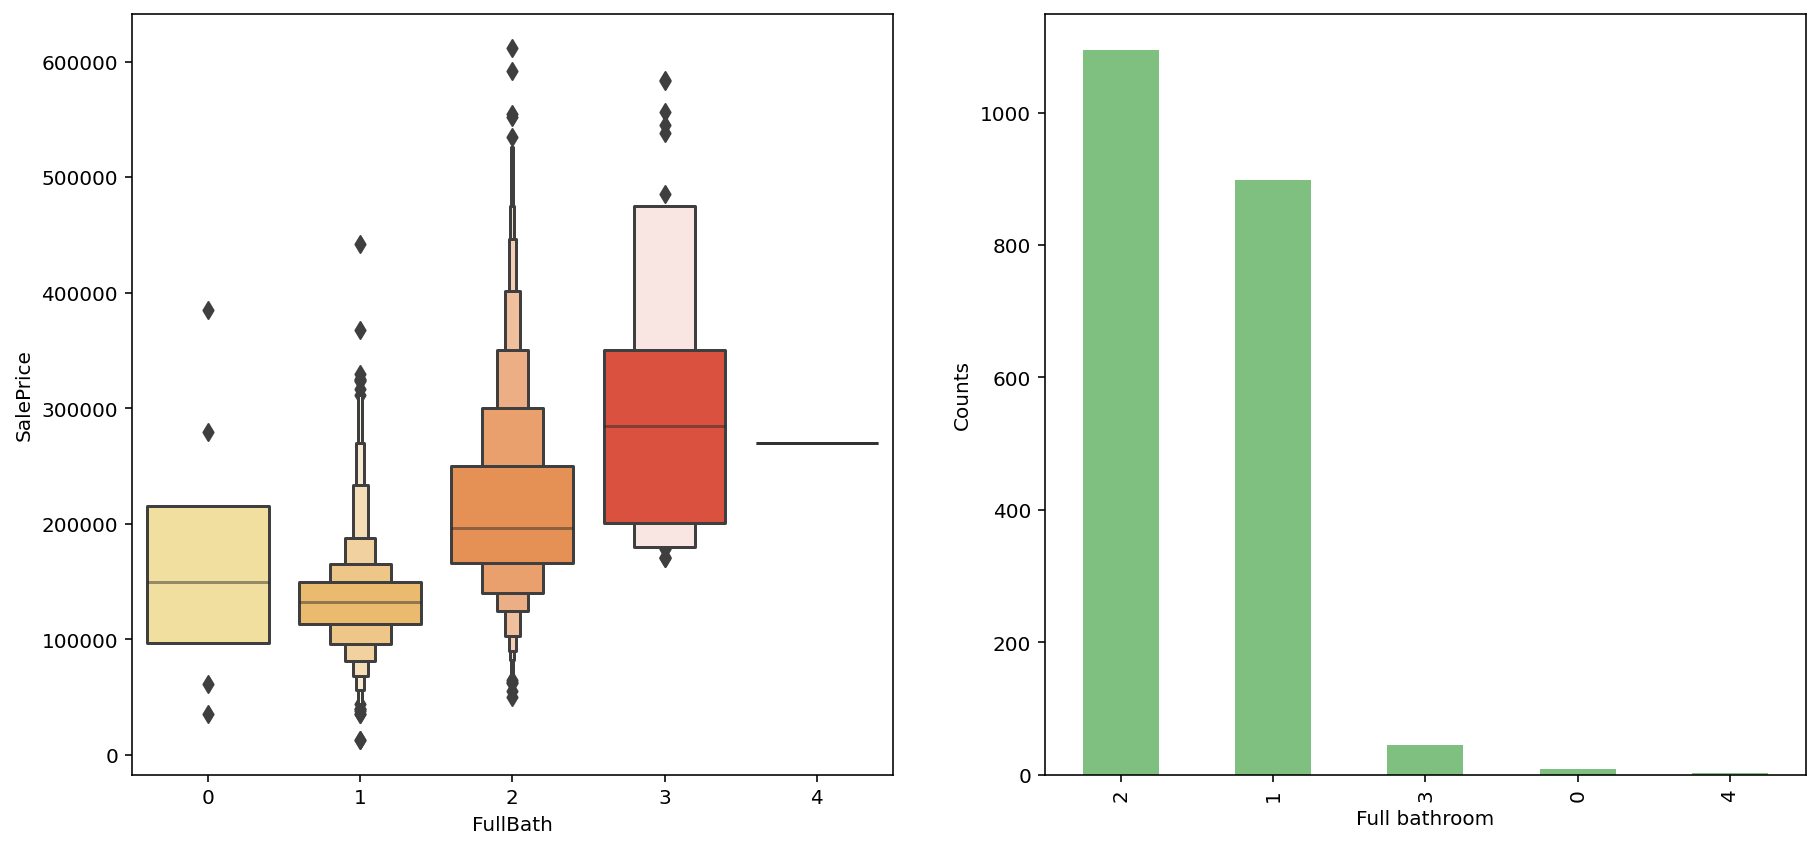

In [112]:
# Houses with 1 or 2 full bathrooms seems to be the most prevalent, 3 full bathrooms only available in more expensive homes
plt.figure(figsize= (15,7))
plt.subplot(121)
sns.boxenplot(train_data['FullBath'], train_data['SalePrice'],palette='YlOrRd')
plt.subplot(122)
train_data['FullBath'].value_counts().plot(kind="bar",color = 'green', alpha = 0.5)
plt.xlabel('Full bathroom')
plt.ylabel('Counts');

#### GrLivArea (or Above Ground Living Area)

The numeric variable with the second highest correlation with SalesPrice is the Above Ground Living Area. This make a lot of sense; big houses are generally more expensive.

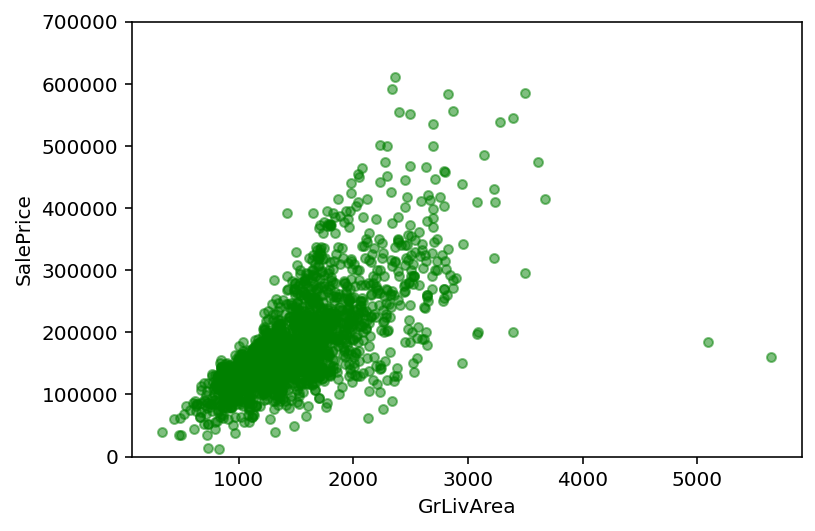

In [113]:
#Analyse SalePrice/GrLiveArea
data = pd.concat([train_data['SalePrice'], train_data['GrLivArea']], axis = 1)
data.plot.scatter(x ='GrLivArea', y= 'SalePrice', ylim = (0,700000), c= 'green', alpha = 0.5);

We generated a scatter plot to visualize the relationship between t(GrLivArea) and SalePrice. As mentioned in the documentation we find some outliers that needs to be taken care of.

In [114]:
# Remove outliers from GrLivArea
train_data = train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice']< 4000000)].index)

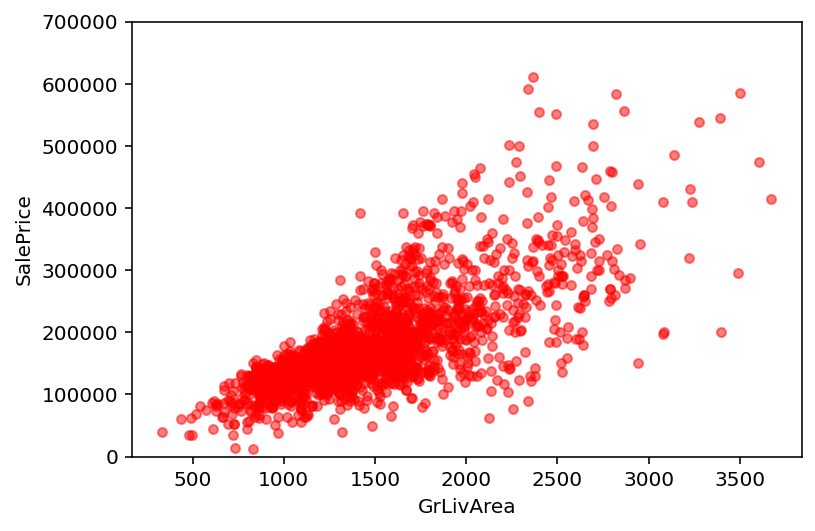

In [115]:
# After outliers have been removed
data = pd.concat([train_data['SalePrice'], train_data['GrLivArea']], axis = 1)
data.plot.scatter(x ='GrLivArea', y= 'SalePrice', ylim = (0,700000), c= 'red', alpha = 0.5);



Some other outliers below that also need to be taken care of.



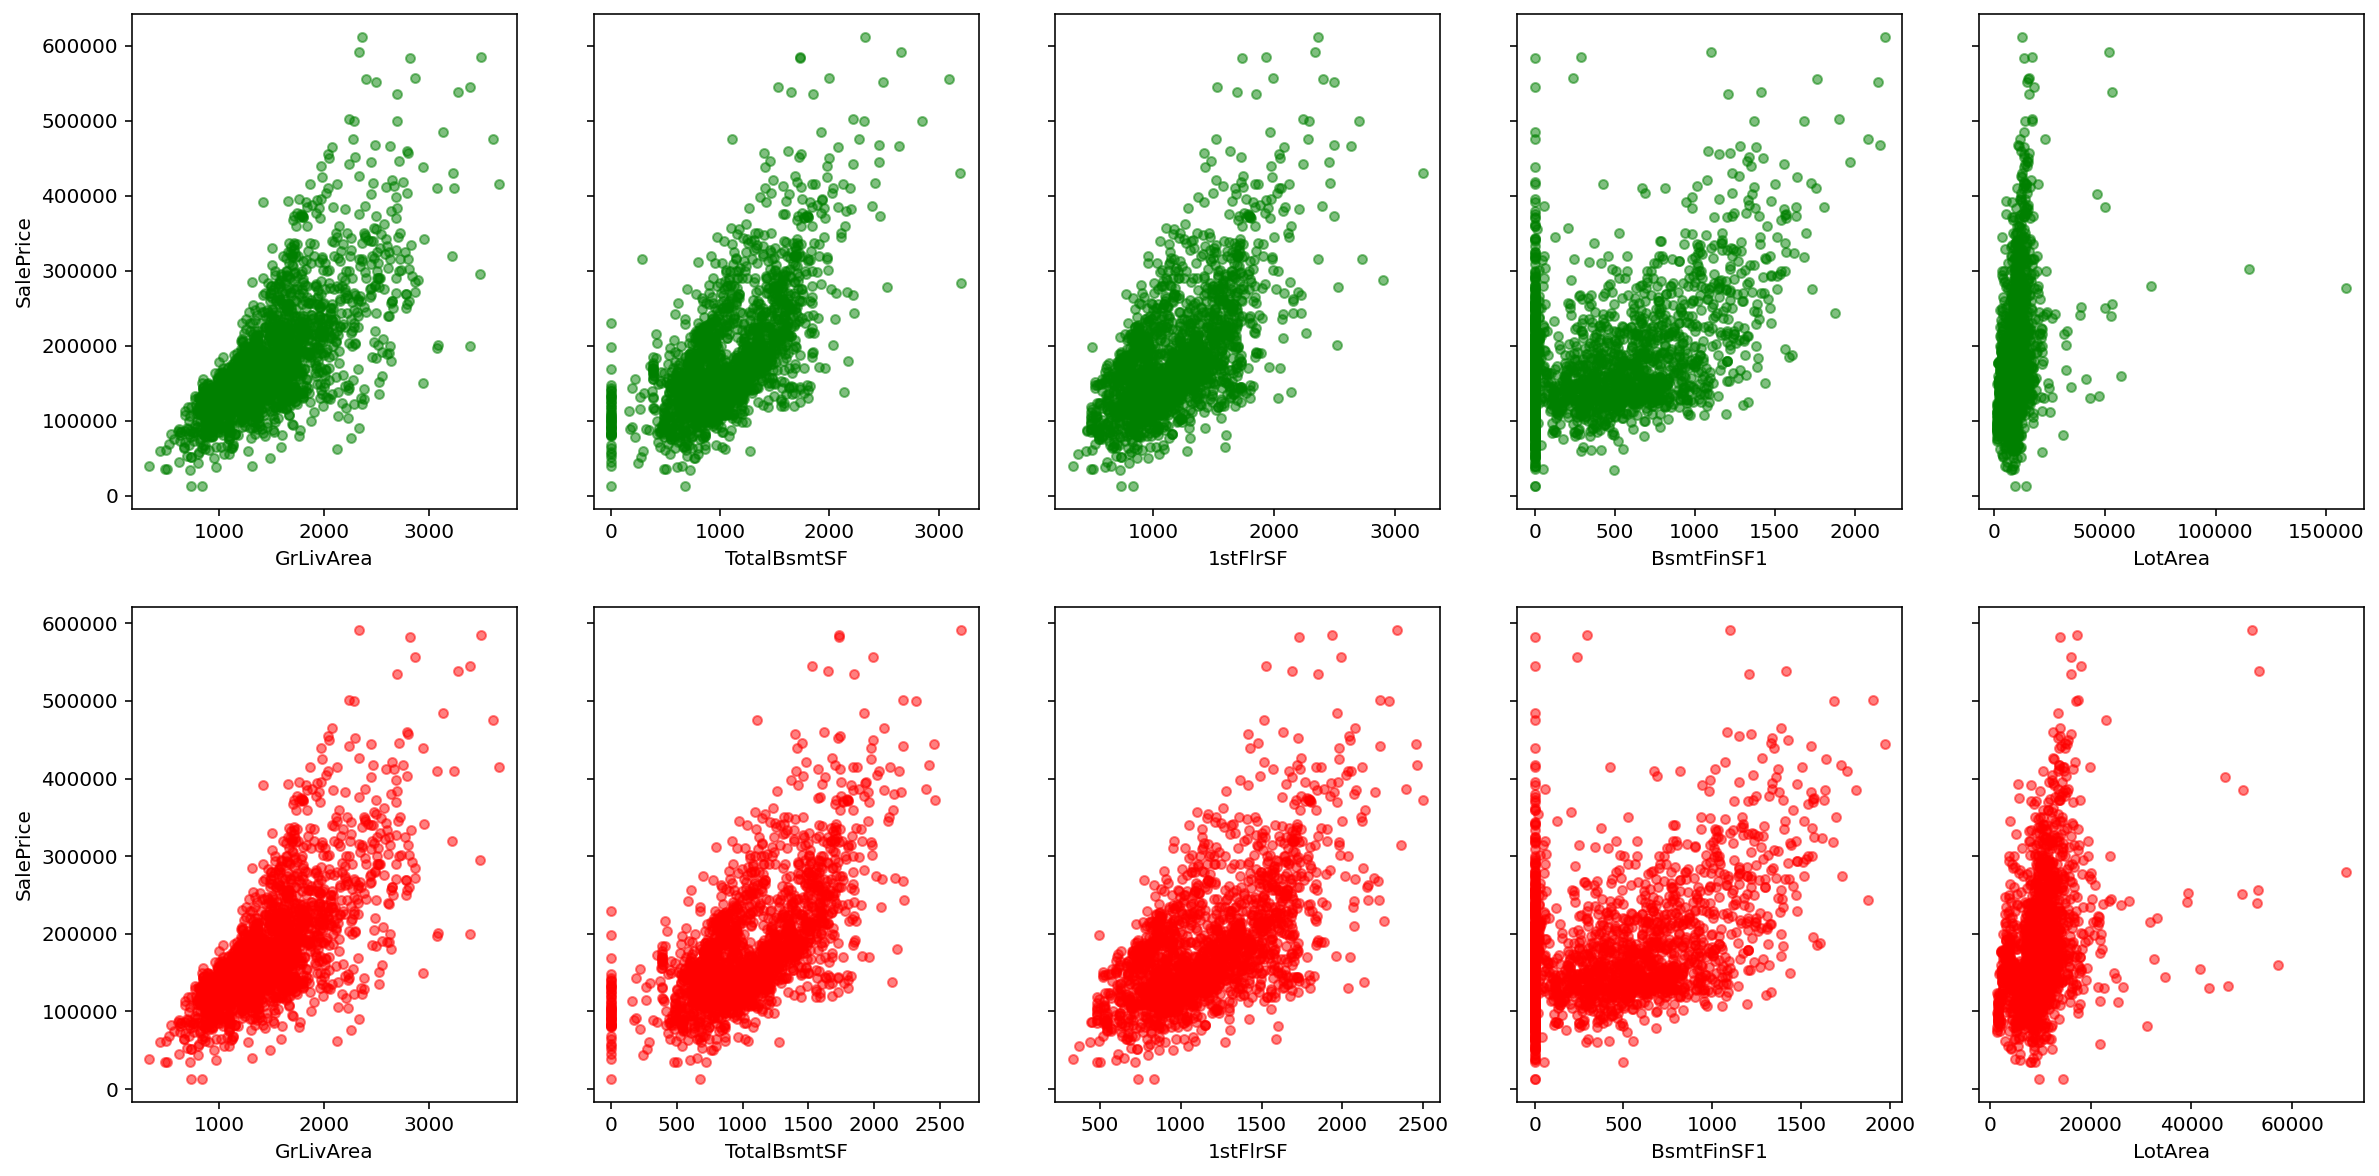

In [116]:
# Plot all figures where possible outliers remain
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
axes = np.ravel(axes)
col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']
for i, c in zip(range(5), col_name):
    train_data.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, color='green', alpha = 0.5)

# Delete outliers for affected columns
train_data = train_data[train_data['GrLivArea'] < 4000]
train_data = train_data[train_data['LotArea'] < 100000]
train_data = train_data[train_data['TotalBsmtSF'] < 3000]
train_data = train_data[train_data['1stFlrSF'] < 2500]
train_data = train_data[train_data['BsmtFinSF1'] < 2000]

# Loop to   train_data
for i, c in zip(range(5,10), col_name):
    train_data.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, color='red', alpha = 0.5);

In [117]:
# To check for dupes, let's just get the original dataset
# and make sure that no Parcel IDs appear twice, possibly 
# from resales and let's just get peace of mind for our data
print('Train set size:', train_data.shape)
print('Test set size:', test_data.shape)
print('Train set duplicate IDs: {}'.format(train_data.duplicated('Id').sum()))
print('Test set duplicate IDs: {}'.format(test_data.duplicated('Id').sum()))

Train set size: (2031, 214)
Test set size: (878, 213)
Train set duplicate IDs: 0
Test set duplicate IDs: 0


---

### Feature Engineering

Combine Train + Test Datasets to Ensure Equal Features in Train/Test Datasets

In [118]:
# https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data

train_index_marker = len(train_data)

train_and_test = pd.concat(objs=[train_data, test_data], axis = 0)
train_and_test.head(3)

# https://github.com/jlu90/Predicting-House-Prices-with-Linear-Regression/blob/master/code/Lutes_Project2.ipynb

Id        PID  LotFrontage  LotArea  Alley  LotShape  Utilities  \
0  109  533352170    72.774648    13517      0         1          0   
1  544  531379050    43.000000    11492      0         1          0   
2  153  535304180    68.000000     7922      0         0          0   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemod/Add  MasVnrArea  \
0          0            6            8       1976           2005       289.0   
1          0            7            5       1996           1997       132.0   
2          0            5            7       1953           2007         0.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          1          0       2.5       2.5             0           4.0   
1          1          0       3.0       2.5             0           4.0   
2          0          1       2.5       2.5             0           4.0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0       533.0           1.5         0.0      192.0        725.0          2   
1       637.0           1.5         0.0      276.0        913.0          2   
2       731.0           1.5         0.0      326.0       1057.0          0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         0.0       725       754             0       1479           0.0   
1         0.0       913      1209             0       2122           1.0   
2         0.0      1057         0             0       1057           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         2         1             3             1            1   
1           0.0         2         1             4             1            1   
2           0.0         1         0             3             1            1   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageYrBlt  \
0             6           0           0          0.0       1976.0   
1             8           0           1          2.5       1997.0   
2             5           0           0          0.0       1953.0   

   GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  \
0             2         2.0       475.0         2.5         2.5           2   
1             2         2.0       559.0         2.5         2.5           2   
2             1         1.0       246.0         2.5         2.5           2   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           44              0          0            0         0   
1           0           74              0          0            0         0   
2           0           52              0          0            0         0   

   PoolQC  Fence  MiscVal  YrSold  SalePrice  MSSubClass_30  MSSubClass_40  \
0       0      0        0    2010   130500.0              0              0   
1       0      0        0    2009   220000.0              0              0   
2       0      0        0    2010   109000.0              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              1              0              0   
2              0              0              0              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  \
0               0               0               0            0   
1               0               0               0            0   
2               0               0               0            0   

   MSZoning_I (all)  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0       

In [119]:
# Functions for reproducability



In [120]:
def create_total_baths(df):
    df['total_baths'] = df['FullBath'] + df['BsmtFullBath'] + 0.5 * (df['BsmtHalfBath'] + df['HalfBath'])

In [121]:
def drop_baths_columns(df):
    '''
    Drops columns used to create "Total Baths" feature
    '''
    df.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'FullBath'], inplace = True)

In [122]:
def create_liveable_sf(df):
    df['liveable_sf'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['GrLivArea']

In [123]:
def drop_liveable_sf_columns(df):
    '''
    Drops all columns directly related to "Liveable SF" feature
    '''
    df.drop(columns = ['BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', '1stFlrSF', '2ndFlrSF'], inplace = True)

### Create Features
Create a feature for total number of baths per home

In [124]:
create_total_baths(train_and_test)

In [125]:
drop_baths_columns(train_and_test)


**Create a feature for total livable sq feet in the house**


In [126]:
create_liveable_sf(train_and_test)


In [127]:
drop_liveable_sf_columns(train_and_test)


**Explore if a 'Garage' Feature Can Be Built**

In [128]:
train_and_test.columns[train_and_test.columns.str.contains('Garage')]


Index(['GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object')

In [129]:
# Correlation of Garage Area with Sale Price (Training Data Only)
train_data.corr()['GarageArea']['SalePrice']

0.6535165268222377

In [130]:
# Correlation of Garage Cars with Sale Price (Training Data Only)
train_data.corr()['GarageCars']['SalePrice']

0.6504505439132033

In [131]:
# Correlation between Garage Area and Garage Cars
train_data.corr()['GarageArea']['GarageCars']

0.8978717016986999

Because the area of the garage and the number of cars that a garage can fit are highly correlated, I will create an interaction feature to account for this relationship.



In [132]:
train_data['garage_area_car_int'] = train_data['GarageArea'] * train_data['GarageCars']


Because the interaction feature is more highly correlated than either of the other features, we will also add this feature to our full dataset.



In [133]:
train_and_test['garage_area_car_int'] = train_and_test['GarageArea'] * train_and_test['GarageCars']


**Divide Data Back into Preprocessed Train and Test Sets**

Models 1-3: Ridge and Lasso Regression

In [134]:
#Setting up x and y variables  - ready for modelling

X = train_data.drop(['SalePrice'], axis=1)
y = train_data['SalePrice']

In [135]:
X.shape

(2031, 213)

In [136]:
y.shape

(2031,)

In [137]:
X.columns

Index(['Id', 'PID', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond',
       ...
       'GarageType_None', 'AlleyGrvl', 'AlleyPave', 'MiscFeature_Gar2',
       'MiscFeature_Othr', 'MiscFeature_Shed', 'MasVnrType_BrkCmn',
       'MasVnrType_BrkFace', 'MasVnrType_Stone', 'garage_area_car_int'],
      dtype='object', length=213)

## Preprocessing and Modeling

### Setting up train and test split

In [138]:
#Firstly setting up of our train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state =42)

print('\nShapes')
print()
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)


Shapes

X_train: (1624, 213)
X_test: (407, 213)
y_train: (1624,)
y_test: (407,)


## Modelling



### Functions

In [139]:
def display_R2_scores(model, X_train, y_train, X_test, y_test):
    print(f'The mean cross validation score for this model is {round(cross_val_score(model, X_train, y_train).mean(),4)}.')
    print(f'The training score for this model is {round(model.score(X_train, y_train), 4)}.')
    print(f'The testing score for this model is {round(model.score(X_test, y_test),4)}.')
    
# code source from reference below

**Linear Regression**

In [140]:

#Create linear regression 
lr = LinearRegression()


In [141]:
# Fit the model on training data
lr.fit(X_train, y_train)

LinearRegression()

In [142]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9407268496237141, 0.9162297771852526)

In [143]:
# Or more comprehensively
display_R2_scores(lr, X_train, y_train, X_test, y_test)

The mean cross validation score for this model is 0.9042.
The training score for this model is 0.9407.
The testing score for this model is 0.9162.


Which can explicily be read as:

* cross_val_score(lr, X_train, y_train).mean() => The mean cross validation score for this model is: 0.9041863336403878

* lr.score(X_train, y_train) => The training score for this model is: 0.9407268496237141

* lr.score(X_test, y_test) => The testing score for this model is: 0.9162297771852526

In [144]:
feature_coeflst = [f'{X.columns[i]}: {lr.coef_[i]}' for i in range(0, len(X.columns))]


In [177]:
feature_coeflst[:10]

['Id: 4.689281948329337',
 'PID: 1.8299696331120418e-05',
 'LotFrontage: 35.31750841699754',
 'LotArea: 0.9706727001243962',
 'Alley: -543.2876946138437',
 'LotShape: -1051.4372256819004',
 'Utilities: -18145.43906105539',
 'LandSlope: -1795.8484025357216',
 'OverallQual: 7055.865868852388',
 'OverallCond: 5176.838139289498']

**Interpretation of the Model**

* 91.62% of the variability in sale price can be explained by the house features in our model

Since over all quality has r = 0. 8, its coef is: OverallQual: 7055.865868852388
The second positively correlated feature is the exterior quality of a house with r = 0.71. If we check its coefficient, we have: ExterQual: 10103.687662418028.

In [146]:
pd.DataFrame(list(zip(X.columns, lr.coef_)), columns=['features', 'coefficients']).sort_values(by='coefficients', ascending=False).head()

features  coefficients
139  RoofMatl_WdShngl  71240.891003
203   GarageType_None  50179.054036
207  MiscFeature_Othr  48339.020695
90    Condition2_PosA  42571.059112
179      SaleType_Oth  26683.848571

In [147]:
pd.DataFrame(list(zip(X.columns, lr.coef_)), columns=['features', 'coefficients']).sort_values(by='coefficients', ascending=False).tail()

features  coefficients
113  Neighborhood_dummies_Edwards -35308.300156
141           Exterior1st_BrkComm -38622.116798
171                  Heating_OthW -38854.642635
91                Condition2_PosN -41502.157870
136                RoofStyle_Shed -44589.583101

In [148]:
intercept = lr.intercept_

In [149]:
intercept

-5282825.849045787


From $𝑌 = 𝛽_0 + 𝛽_1𝑋_1+𝜀$

we have 

$\hat{SalePrice} = -5282825.849045787 + coef*$*[RoofMatl\_WdShake]*

According to this model the top five features with corresponding maximum coeficients, RoofMatl_WdShngl, for instance is:71240.891003. Thus, holding all else constant, for every 1 unit increase in RoofMatl_WdShngl, the price of the house increases approximately by $71,240. 

***



We predict the test dataset as well:

In [150]:
test_data.shape

(878, 213)

In [151]:
# Generating predictions on the test data 
# The predictions need to be done on the same features that we modeled on.
y_preds = lr.predict(test_data)

In [152]:
y_preds[:5]

array([153598.7541561 , 129428.35242773, 240548.51124564, 121249.30293979,
       121362.62919004])

In [153]:
# Creating a newcolumn
test_data['SalePrice'] = y_preds

In [154]:
test_data[['Id', 'SalePrice']]

Id      SalePrice
0    2658  153598.754156
1    2718  129428.352428
2    2414  240548.511246
3    1989  121249.302940
4     625  121362.629190
..    ...            ...
873  1662  187580.140490
874  1234  229646.575542
875  1373   70650.776186
876  1672   97184.245009
877  1939   62826.068085

[878 rows x 2 columns]

In [155]:
# For Kaggle submission
test_data[['Id', "SalePrice"]].to_csv('./4Kaggle/kaggle_test_data.csv', index=False)

### Ridge Regression

**Scale the Data (Can also be used with LASSO)**

In [156]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [157]:
#Instantiate and Fit the Model

ridge = Ridge(alpha = 1025) # To improve my Ridge, I manually adjusted the alpha score; the Ridge CV returned smaller alphas (even if the upper limit was increased) 
ridge = ridge.fit(Z_train, y_train)

# Code adopted from: https://github.com/jlu90/Predicting-House-Prices-with-Linear-Regression/blob/master/code/Lutes_Project2.ipynb

### Evaluate R2 Scores for Ridge Model

In [158]:
display_R2_scores(ridge, Z_train, y_train, Z_test, y_test)

The mean cross validation score for this model is 0.898.
The training score for this model is 0.9173.
The testing score for this model is 0.9005.


### Model 3: Lasso Regression

In [159]:
lasso = Lasso(alpha = 5000, max_iter = 4000)
lasso.fit(Z_train, y_train);

# Code taught by Tim Book

#### Evaluate R2 Scores

In [160]:
display_R2_scores(lasso, Z_train, y_train, Z_test, y_test)
print(f'The number of features in this model is : {np.sum(lasso.coef_ != 0)}.')

The mean cross validation score for this model is 0.8742.
The training score for this model is 0.8821.
The testing score for this model is 0.8577.
The number of features in this model is : 18.


### Look at Coefficients that Remain in Model


In [161]:
# Code from Jose Portilla's Data Science Class on Udemy
lasso_coef = pd.DataFrame(lasso.coef_, X_train.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)

In [162]:
# Only select coefficients that Lasso kept
lasso_coef[lasso_coef['Coefficient'] != 0].sort_values('Coefficient', ascending = False)

Coefficient
GrLivArea                     21078.802443
OverallQual                   17368.452379
KitchenQual                    8862.390296
ExterQual                      7938.915706
garage_area_car_int            7435.753711
BsmtFinSF1                     6132.697772
TotalBsmtSF                    5227.778065
LotArea                        4133.353993
YearBuilt                      3917.370554
MasVnrArea                     2172.805360
FireplaceQu                    1852.749787
1stFlrSF                       1468.597005
YearRemod/Add                  1438.389911
BsmtExposure                   1313.690062
BsmtQual                        841.820395
SaleType_New                    647.990842
Neighborhood_dummies_NridgHt    312.189027
GarageFinish                    255.279429

**Model Comparison**

|Model Name| Training Score| Testing Score|
|---|---|---|
|Linear Regression |94.6%|91.62%|
|Ridge|91.73%|90.05%|
|LASSO|88.21%|85.77%|

As shown in this table, of each of the models that I built, the Linear Regression that was built performed the best in terms of R2 score, and it was also not overfit. In the next section, I will further evaluate this model.

## Evaluation and Conceptual Understanding

### Root Mean Squared Error (RMSE)


In [163]:
#
y_predict = lr.predict(X_test)
resids = y_test - y_predict

In [164]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"The RMSE is: {round(rmse, 2)}.")

The RMSE is: 22613.44.


In [165]:
y_train.describe()

count      1624.000000
mean     179834.078202
std       76177.683510
min       12789.000000
25%      129500.000000
50%      163000.000000
75%      212999.250000
max      584500.000000
Name: SalePrice, dtype: float64

In [166]:
y_test.describe()

count       407.000000
mean     180057.923833
std       78226.862141
min       34900.000000
25%      129825.000000
50%      157500.000000
75%      214750.000000
max      591587.000000
Name: SalePrice, dtype: float64

According to the value of the RMSE, the predictions for Sale Price made by the Linear Regression model are likely off by about $\$22,613.44$. This is less than 1/3 of the standard deviation of the Sale Price in the training data. Although I would like to improve this number to increase the predictability of the model, this is a good starting point to improve from.

**How do the predictions of Sale Price compare to the actual values?**

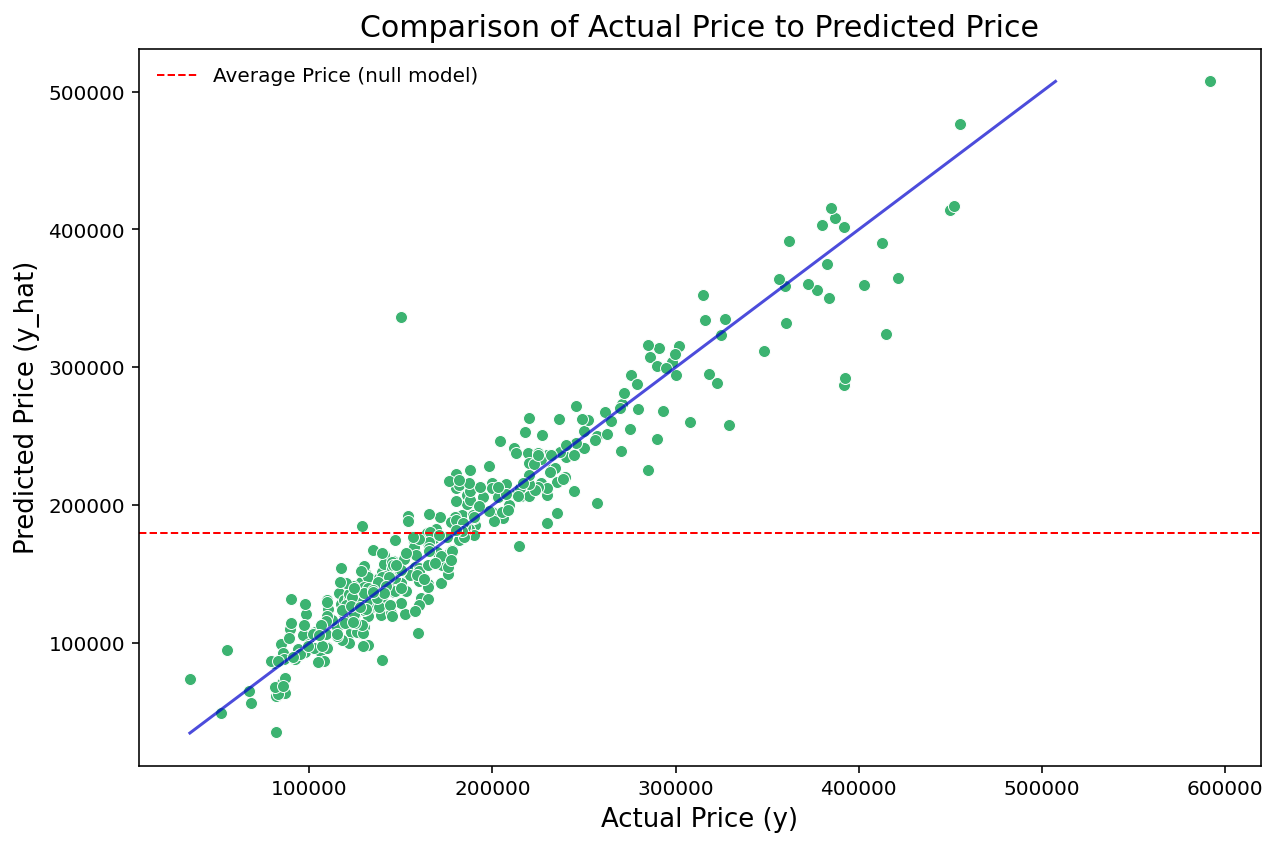

In [167]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = y_test, y = lr.predict(X_test), color = 'mediumseagreen')
plt.title('Comparison of Actual Price to Predicted Price', fontdict = {'fontsize':15})
maxDist = max(max(lr.predict(X_test)), max(lr.predict(X_test))) # Code from Mahdi's lecture
minDist = min(min(lr.predict(X_test)), min(y_test)) # Code from Mahdi's lecture
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'mediumblue', alpha = 0.7) # Similar to Mahdi's code, but done with Seaborn
plt.xlabel('Actual Price (y)', fontdict= {'fontsize':13})
plt.axhline(train_data['SalePrice'].mean(), linewidth=1, linestyle='dashed', color='r', label='Average Price (null model)')
plt.ylabel('Predicted Price (y_hat)', fontdict= {'fontsize':13})
plt.legend(frameon=False, loc='upper left')
plt.savefig('./images/model.png')
plt.tight_layout();

#from: [https://github.com/jlu90/Predicting-House-Prices-with-Linear-Regression/blob/master/code/Lutes_Project2.ipynb]

From this plot, we are able to see that this model does not perform equally well at predicing all prices. Specifically, the model seems to be good at predicing the price of properties within the range of $\$90,000$ to $\$225,000$, but it does not do a good job at either extreme. In the original testing data set, 75% of the houses were priced at or under $\$214,000$. The model might not perform well at extreme values due to insufficient training data for these cases.

### How do the residuals plot and distribution of residuals look?
* Residuals Plot

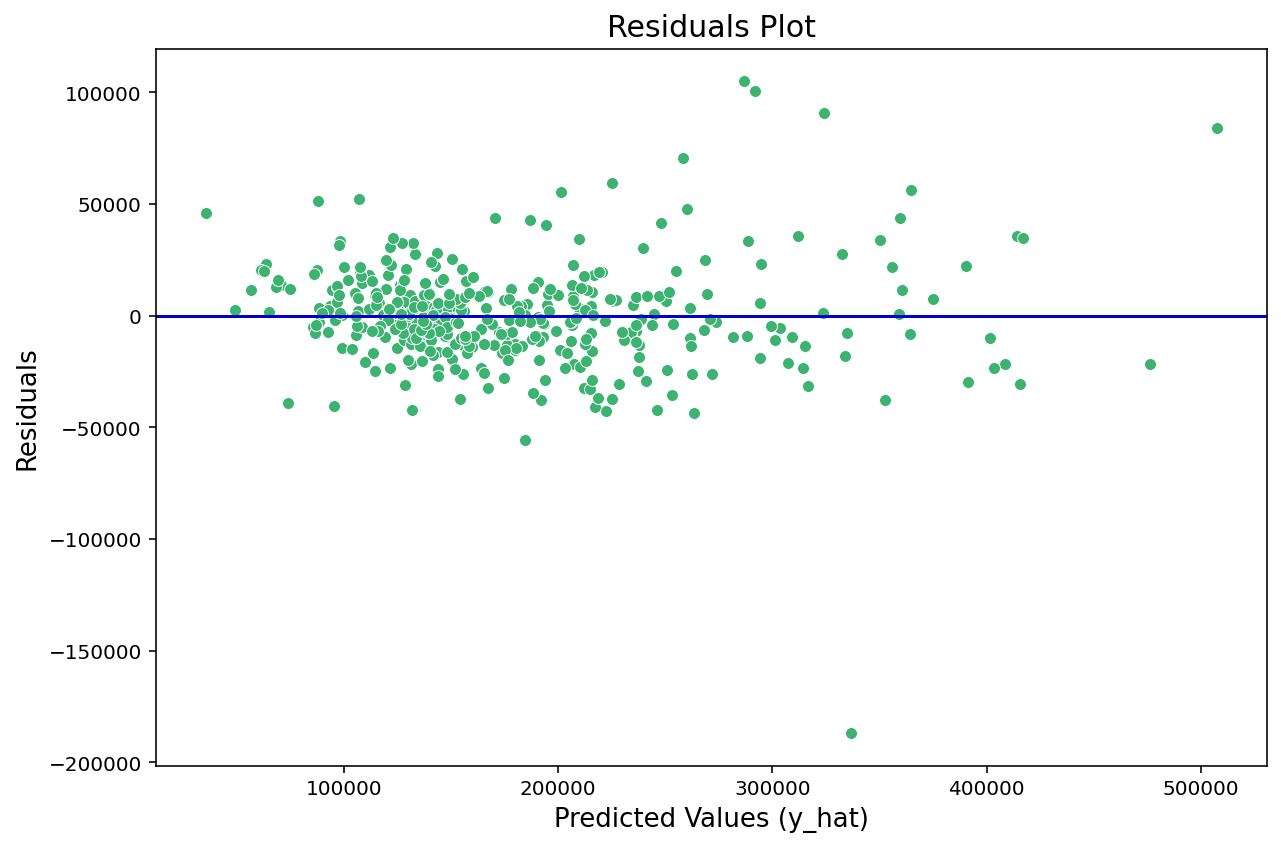

In [168]:
resids = y_test - lr.predict(X_test)

plt.figure(figsize=(9,6))
sns.scatterplot(x = lr.predict(X_test), y = resids, color = 'mediumseagreen')
plt.axhline(0, color = 'mediumblue')
plt.title('Residuals Plot', fontdict = {'fontsize':15})
plt.xlabel('Predicted Values (y_hat)', fontdict = {'fontsize':13})
plt.ylabel('Residuals', fontdict = {'fontsize':13})
plt.savefig('./images/residueScatter.png')
plt.tight_layout();


The poor performance of the model at predicting values less than $\$90,000$ and greater than $\$225,000$ is further amplified by this plot. The residuals increase at the more extreme predicted values.

Because this plot appears to have a fan shape, it is indicative that this model did not have equality of variance between features. In EDA, I discovered that both the target (Sale Price) and most features were not normally distributed. To build the model, the Sale Price was log-transformed, but none of the features were transformed. Before deploying the model, we might consider log-transforming some of the features, too.

### Distribution of Residuals

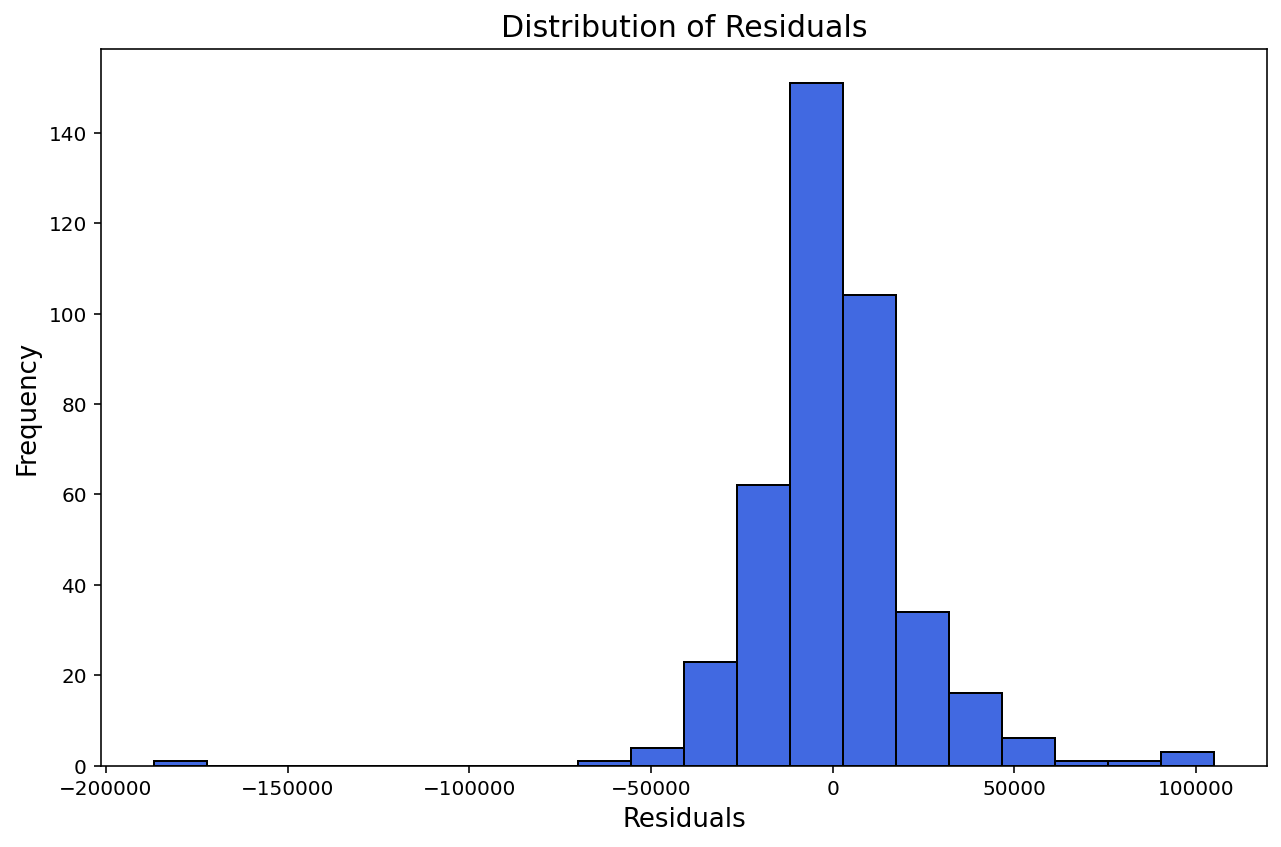

In [169]:
# Plot Graph 3
resids.hist(bins = 20, figsize = (9,6), edgecolor = 'black', grid = False, color = 'royalblue')
plt.title('Distribution of Residuals', fontdict = {'fontsize':15})
plt.xlabel('Residuals', fontdict = {'fontsize':13})
plt.ylabel('Frequency', fontdict = {'fontsize':13})
plt.savefig('./images/residueBargraph.png')
plt.tight_layout();

From the above histogram, it is evident that the residuals are not normally distributed. On both tails of the distribution, there are some residuals that indicate that the model's prediction was incorrect by quite a bit.



In [170]:
# Look at the coefficients

lr.coef_[:10]

array([ 4.68928195e+00,  1.82996963e-05,  3.53175084e+01,  9.70672700e-01,
       -5.43287695e+02, -1.05143723e+03, -1.81454391e+04, -1.79584840e+03,
        7.05586587e+03,  5.17683814e+03])

In [171]:
# y intercept
lr.intercept_


-5282825.849045787

In [172]:
# Put it into a dataframe; Zip coef_ with the features list

features = [col for col in train_data._get_numeric_data().columns if col != 'SalePrice']
pd.DataFrame(list(zip(features, lr.coef_)), columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False).head()

Feature   Coefficient
139  RoofMatl_WdShngl  71240.891003
203   GarageType_None  50179.054036
207  MiscFeature_Othr  48339.020695
90    Condition2_PosA  42571.059112
179      SaleType_Oth  26683.848571

In [179]:
features = [col for col in train_data._get_numeric_data().columns if col != 'SalePrice']
pd.DataFrame(list(zip(features, lr.coef_)), columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False).tail()

Feature   Coefficient
113  Neighborhood_dummies_Edwards -35308.300156
141           Exterior1st_BrkComm -38622.116798
171                  Heating_OthW -38854.642635
91                Condition2_PosN -41502.157870
136                RoofStyle_Shed -44589.583101

In [178]:
#lr_coefs

## Conclusion and Recommendations



* predicting the sale price of a house isn't everything. In fact, knowing what factors influence the selling price of a house may well be more valuable than the predictions themselves

* we can identify which features exert the most influence on our predictions, and we even have the relative magnitude and direction of their influence, as given by the associated coefficients.
* This project is great tool for real estate agents/individuals who’s an interest in the real estate  industry
 * The project shows how each feature can affect sale price of a house in Ames, IA
 * Linear regression model performed better among the three models
 * Individuals who wants to sell their homes can focus on improving  worst house features to bring up prices
 * While this model generalizes well to the city of Ames, it's probably not generalizable to other cities, since each city/state differ greatly in terms of external factors like geographical features, seasonal weather or the economic climate of that particular city.
 * Another point to keep in mind that this model doesn't consider the inflation of housing prices. Since the end of the financial crisis in 2008, housing prices throughout the US have been increasing steadily year over year. Our model would need significant retraining to predict the current house prices in Ames today.
